In [ ]:
!pip install boto3

In [ ]:
import pandas as pd
import time
import random
import boto3

# Initialize the S3 resource with your credentials
s3 = boto3.resource('s3',
                    aws_access_key_id="",
                    aws_secret_access_key=" ",
                    region_name=""
                   )

# Function to list all bucket names
def AllBucketName():
    print("All S3 bucket names: ")
    for bucket in s3.buckets.all():
        print(f"{bucket.name}")

# Function to upload a file to S3
def putFile():
    bucket_name = 'rsh1232'
    s3_object_key = 'syn.csv'
    local_file_path = 'BH2S (1).csv'
    s3.Bucket(bucket_name).upload_file(local_file_path, s3_object_key)

# Function to download a file from S3
def downloadFile():
    bucket_name = 'rsh1232'
    s3_object_key = 'syn.csv'
    local_file_path = 'synthetic_industrial_data.csv'
    s3.Bucket(bucket_name).download_file(s3_object_key, local_file_path)
    print(f'File {s3_object_key} downloaded from s3 bucket {bucket_name} to {local_file_path}')

# Call the functions
AllBucketName()

downloadFile()


All S3 bucket names: 
rsh1232
File syn.csv downloaded from s3 bucket rsh1232 to synthetic_industrial_data.csv


In [ ]:
import pandas as pd

# Load the dataset
file_path = 'synthetic_industrial_data.csv'
data = pd.read_csv(file_path)

# Display the first few rows to understand its structure
data.head()


senseDate    CH4   CO2     O2   Temp  Humidity  PumpPres  GaugePres  \
0  09-05-2017 09:46  65.88  5.95   0.00  14.17     17.92     -8.97      -1.24   
1  09-05-2017 10:48  66.08  6.04   0.00  14.82     18.77     -8.15      -0.99   
2  09-05-2017 11:50  65.84  6.03   0.00  15.51     18.56     -8.55      -0.99   
3  09-05-2017 12:52  13.79  2.70  16.07  17.47     19.52    -10.46      -0.99   
4  09-05-2017 13:54  12.77  2.37  16.30  18.16     19.76     -9.57      -0.99   

   BaroPres  
0   1010.18  
1   1010.65  
2   1010.18  
3   1010.18  
4   1010.18

In [ ]:

data['senseDate'] = pd.to_datetime(data['senseDate'], format='%m/%d/%Y %H:%M', errors='coerce')


print(f"Number of missing date entries: {data['senseDate'].isna().sum()}")


data = data.dropna(subset=['senseDate'])


data.set_index('senseDate', inplace=True)

# Resample data to a different frequency (e.g., hourly, daily, monthly)
data_hourly = data.resample('H').mean()
data_monthly = data.resample('M').mean()


print(data_hourly.head())
print(data_monthly.head())


Number of missing date entries: 330
                       CH4   CO2   O2   Temp  Humidity  PumpPres  GaugePres  \
senseDate                                                                     
2017-09-13 00:00:00  66.29  5.72  0.0   9.85     26.98     -6.38      -0.99   
2017-09-13 01:00:00  66.83  5.79  0.0  10.58     27.54     -6.70      -0.74   
2017-09-13 02:00:00  66.73  5.80  0.0  10.65     26.62     -7.94      -0.99   
2017-09-13 03:00:00  67.13  5.80  0.0  10.91     26.89     -6.45      -0.99   
2017-09-13 04:00:00  67.24  5.79  0.0  11.30     27.44     -5.24      -0.74   

                     BaroPres  
senseDate                      
2017-09-13 00:00:00    988.67  
2017-09-13 01:00:00    986.75  
2017-09-13 02:00:00    985.32  
2017-09-13 03:00:00    984.36  
2017-09-13 04:00:00    984.36  
                  CH4       CO2        O2       Temp   Humidity  PumpPres  \
senseDate                                                                   
2017-09-30  60.168496  5.262888 

<ipython-input-32-cdfbdb6acac6>:13: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data_hourly = data.resample('H').mean()
<ipython-input-32-cdfbdb6acac6>:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_monthly = data.resample('M').mean()


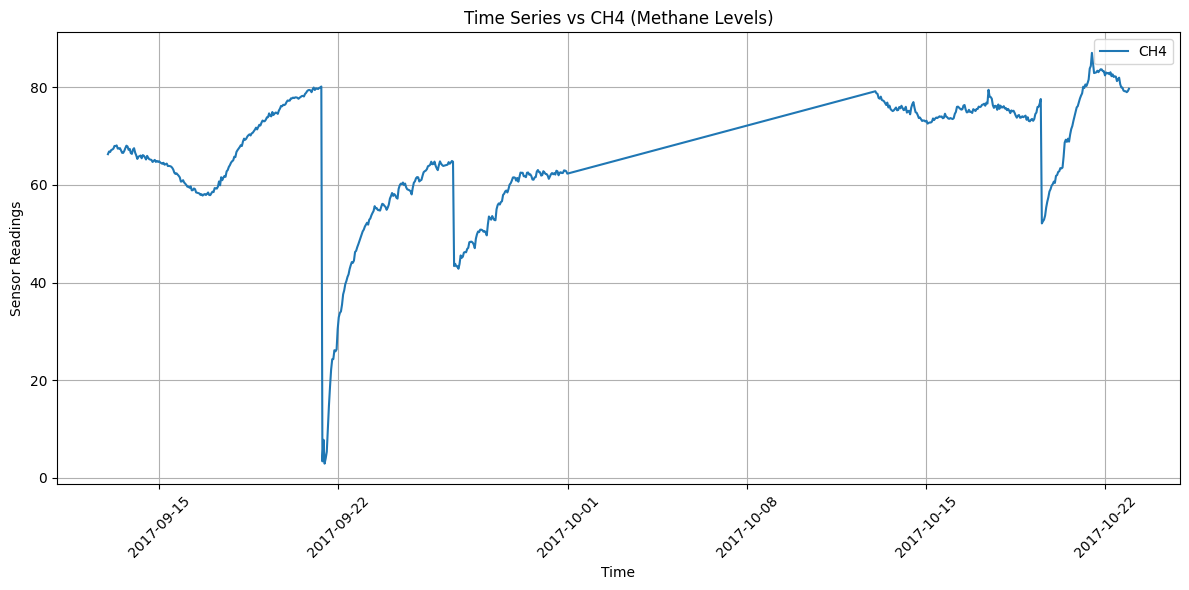

In [ ]:
import matplotlib.pyplot as plt

# Function to plot time series
def plot_time_series(sensor_cols, title):
    plt.figure(figsize=(12, 6))
    for col in sensor_cols:
        plt.plot(data.index, data[col], label=col)  # Use data.index for time series
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Sensor Readings')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Example usage for plotting CH4, CO2, etc.
plot_time_series(['CH4'], 'Time Series vs CH4 (Methane Levels)')



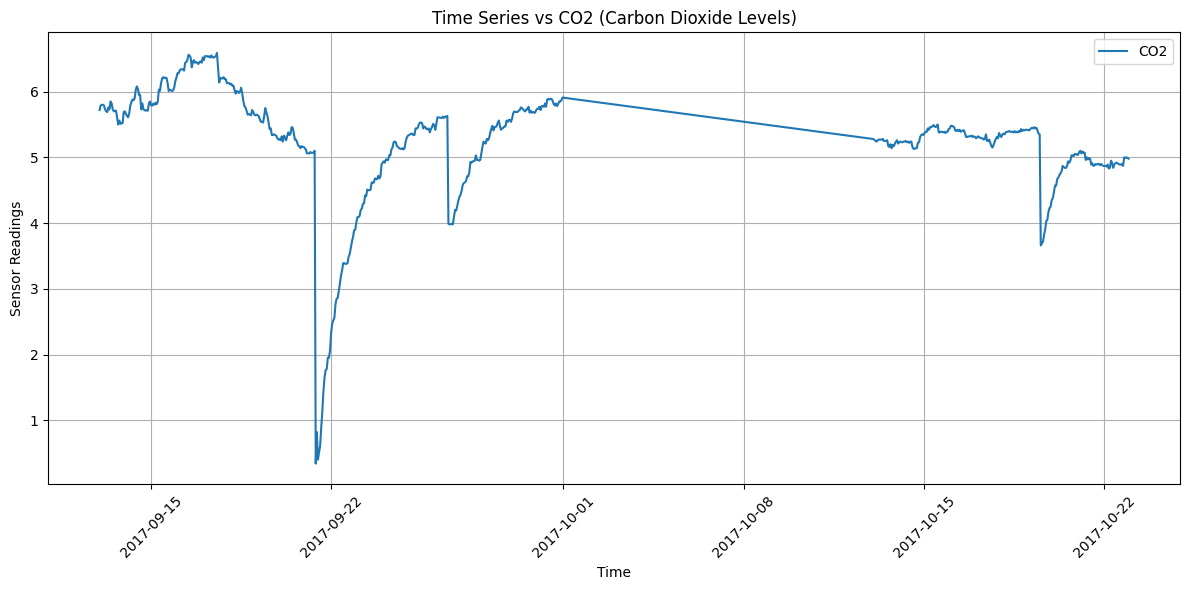

In [ ]:
plot_time_series(['CO2'], 'Time Series vs CO2 (Carbon Dioxide Levels)')

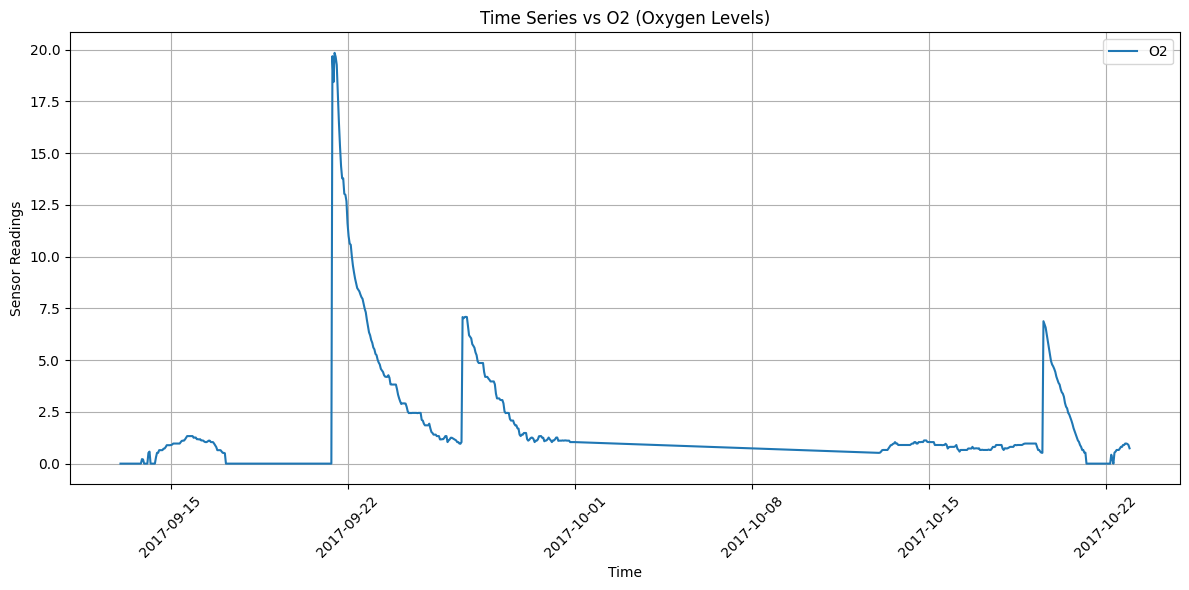

In [ ]:
plot_time_series(['O2'], 'Time Series vs O2 (Oxygen Levels)')

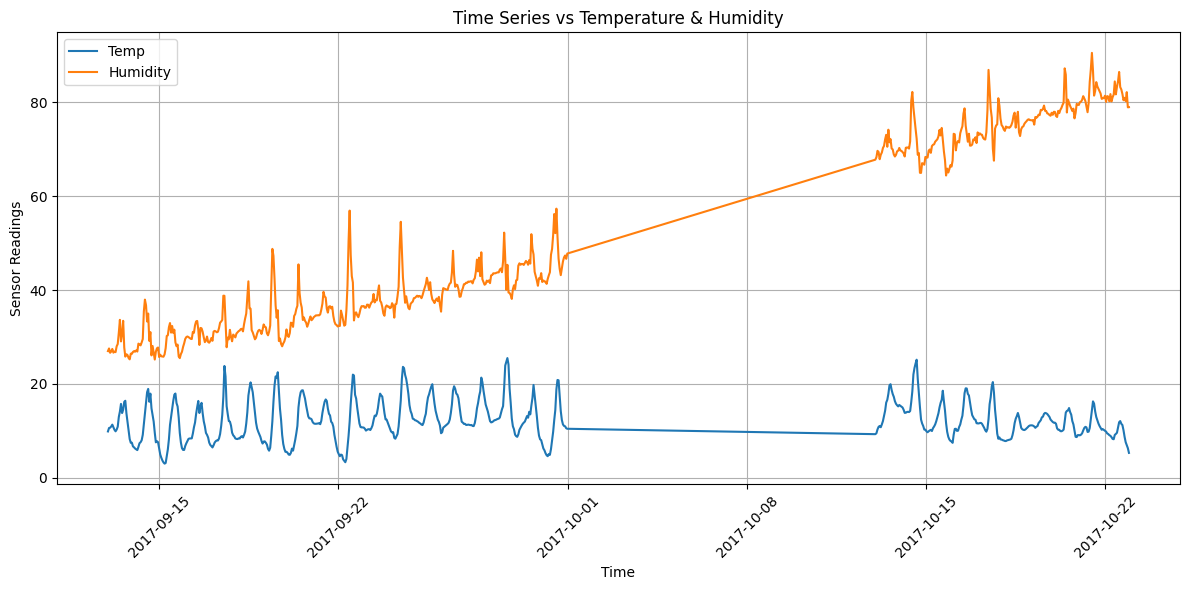

In [ ]:
plot_time_series(['Temp', 'Humidity'], 'Time Series vs Temperature & Humidity')

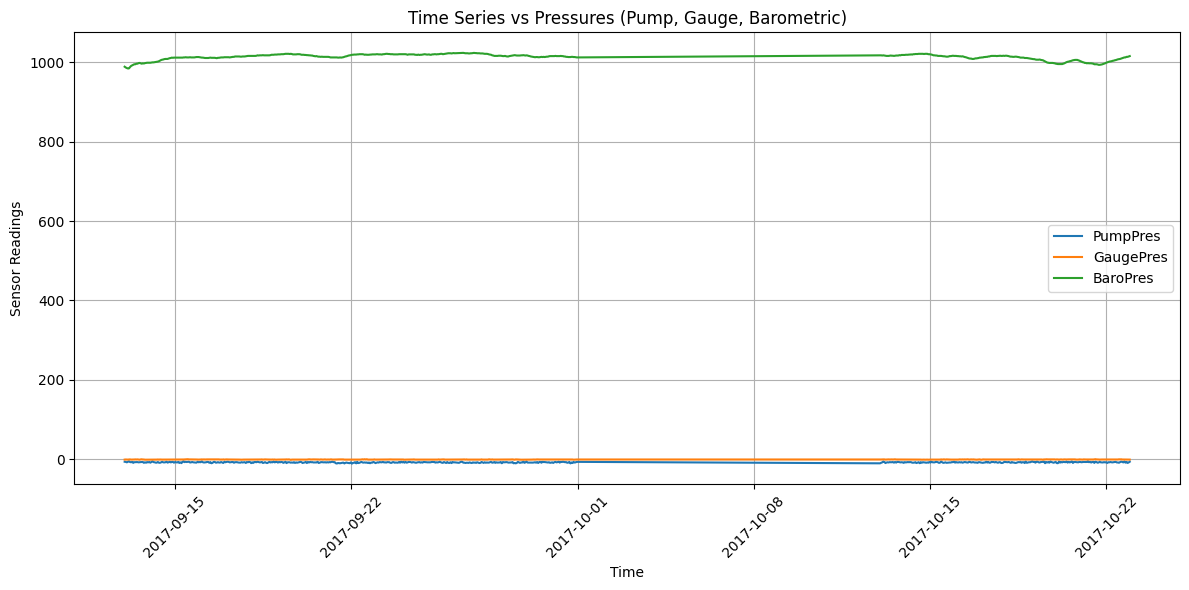

In [ ]:
plot_time_series(['PumpPres', 'GaugePres', 'BaroPres'], 'Time Series vs Pressures (Pump, Gauge, Barometric)')

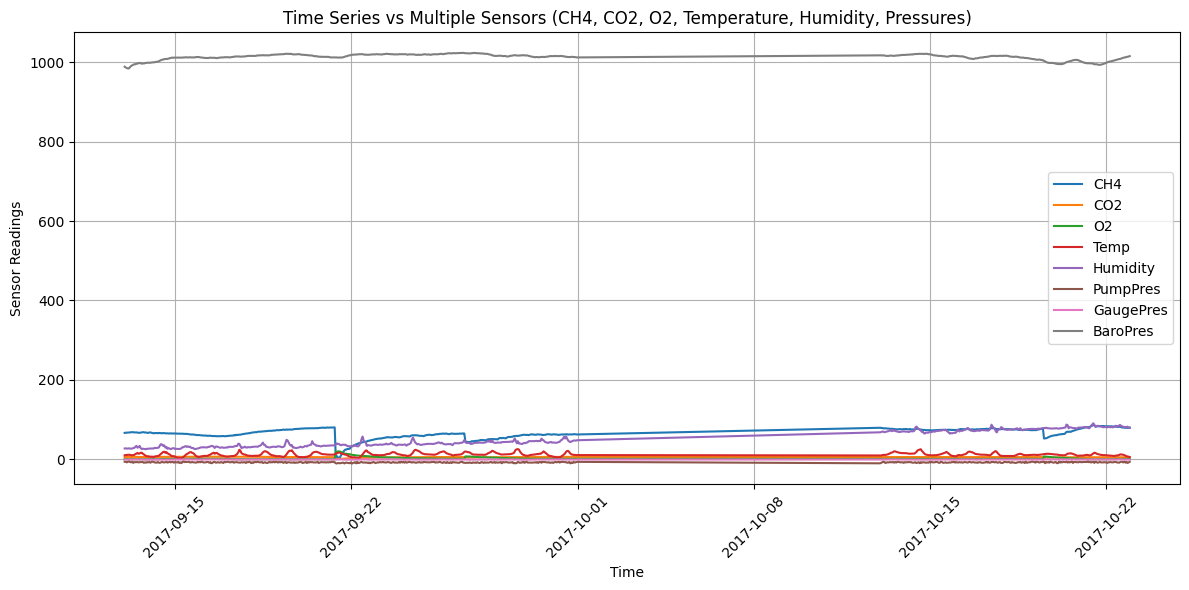

In [ ]:

# Plot all the sensors together
plot_time_series(
    ['CH4', 'CO2', 'O2', 'Temp', 'Humidity', 'PumpPres', 'GaugePres', 'BaroPres'],
    'Time Series vs Multiple Sensors (CH4, CO2, O2, Temperature, Humidity, Pressures)'
)


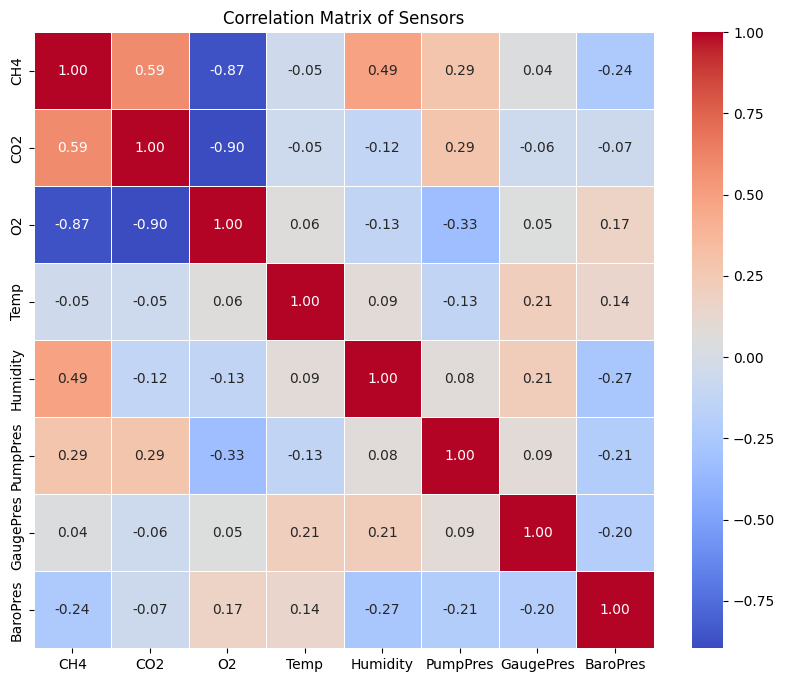

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = data[['CH4', 'CO2', 'O2', 'Temp', 'Humidity', 'PumpPres', 'GaugePres', 'BaroPres']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Sensors')
plt.show()


In [ ]:
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                CH4       CO2        O2      Temp  Humidity  PumpPres  \
CH4        1.000000  0.589152 -0.871657 -0.050782  0.485220  0.288144   
CO2        0.589152  1.000000 -0.896208 -0.052744 -0.124426  0.285382   
O2        -0.871657 -0.896208  1.000000  0.063205 -0.129724 -0.326637   
Temp      -0.050782 -0.052744  0.063205  1.000000  0.087658 -0.130058   
Humidity   0.485220 -0.124426 -0.129724  0.087658  1.000000  0.078565   
PumpPres   0.288144  0.285382 -0.326637 -0.130058  0.078565  1.000000   
GaugePres  0.041531 -0.055032  0.048825  0.211584  0.214911  0.088301   
BaroPres  -0.239468 -0.065905  0.171908  0.144982 -0.270210 -0.209555   

           GaugePres  BaroPres  
CH4         0.041531 -0.239468  
CO2        -0.055032 -0.065905  
O2          0.048825  0.171908  
Temp        0.211584  0.144982  
Humidity    0.214911 -0.270210  
PumpPres    0.088301 -0.209555  
GaugePres   1.000000 -0.202919  
BaroPres   -0.202919  1.000000  


from sklearn.preprocessing import StandardScaler

# Extract relevant features
sensor_data = data[['CH4', 'CO2', 'O2', 'Temp', 'Humidity', 'PumpPres', 'GaugePres', 'BaroPres']]

# Standardize the features
scaler = StandardScaler()
sensor_data_scaled = scaler.fit_transform(sensor_data)

# Convert back to a DataFrame for ease of use
sensor_data_scaled = pd.DataFrame(sensor_data_scaled, columns=sensor_data.columns, index=data.index)


##

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# ... (rest of your code above remains the same) ...

# Function to detect anomalies using Autoencoder
def detect_anomalies_autoencoder(sensor):
    X = sensor_data_scaled[sensor].values.reshape(-1, 1)  # Reshape for single feature

    # Split data into train and test sets
    X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

    # Define the Autoencoder model
    autoencoder = Sequential([
        Dense(16, input_dim=X_train.shape[1], activation='relu'),
        Dense(8, activation='relu'),
        Dense(4, activation='relu'),  # Bottleneck layer
        Dense(8, activation='relu'),
        Dense(16, activation='relu'),
        Dense(X_train.shape[1], activation='sigmoid')  # Output layer
    ])

    # Compile and train the model
    autoencoder.compile(optimizer='adam', loss='mse')
    autoencoder.fit(X_train, X_train, epochs=100, batch_size=32, validation_data=(X_test, X_test), verbose=0)

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import zscore

# Load and preprocess your data
# Assuming the DataFrame 'data' is already loaded and preprocessed

# Sensor columns
sensor_columns = ['CH4', 'CO2', 'O2', 'Temp', 'Humidity', 'PumpPres', 'GaugePres', 'BaroPres']

# Initialize a dictionary to store anomalies for each sensor
anomalies_dict_zscore = {}

# Iterate through each sensor
for sensor in sensor_columns:
    print(f"Processing {sensor}...")

    # Calculate Z-scores for the sensor
    z_scores = zscore(data[sensor])

    # Identify anomalies based on the Z-score threshold
    anomalies_zscore = np.where((z_scores > 2.8) | (z_scores < -2.8), 1, 0)

    # Count the number of anomalies
    num_anomalies = np.sum(anomalies_zscore)

    # Store anomalies for the current sensor
    anomalies_dict_zscore[sensor] = num_anomalies

# Print results for all sensors at once
print("\nAnomalies Detected (Z-score):")
for sensor, num_anomalies in anomalies_dict_zscore.items():
    print(f"Sensor: {sensor}, Number of anomalies detected (Z-score): {num_anomalies}")


Processing CH4...
Processing CO2...
Processing O2...
Processing Temp...
Processing Humidity...
Processing PumpPres...
Processing GaugePres...
Processing BaroPres...

Anomalies Detected (Z-score):
Sensor: CH4, Number of anomalies detected (Z-score): 14
Sensor: CO2, Number of anomalies detected (Z-score): 18
Sensor: O2, Number of anomalies detected (Z-score): 18
Sensor: Temp, Number of anomalies detected (Z-score): 7
Sensor: Humidity, Number of anomalies detected (Z-score): 0
Sensor: PumpPres, Number of anomalies detected (Z-score): 2
Sensor: GaugePres, Number of anomalies detected (Z-score): 5
Sensor: BaroPres, Number of anomalies detected (Z-score): 7


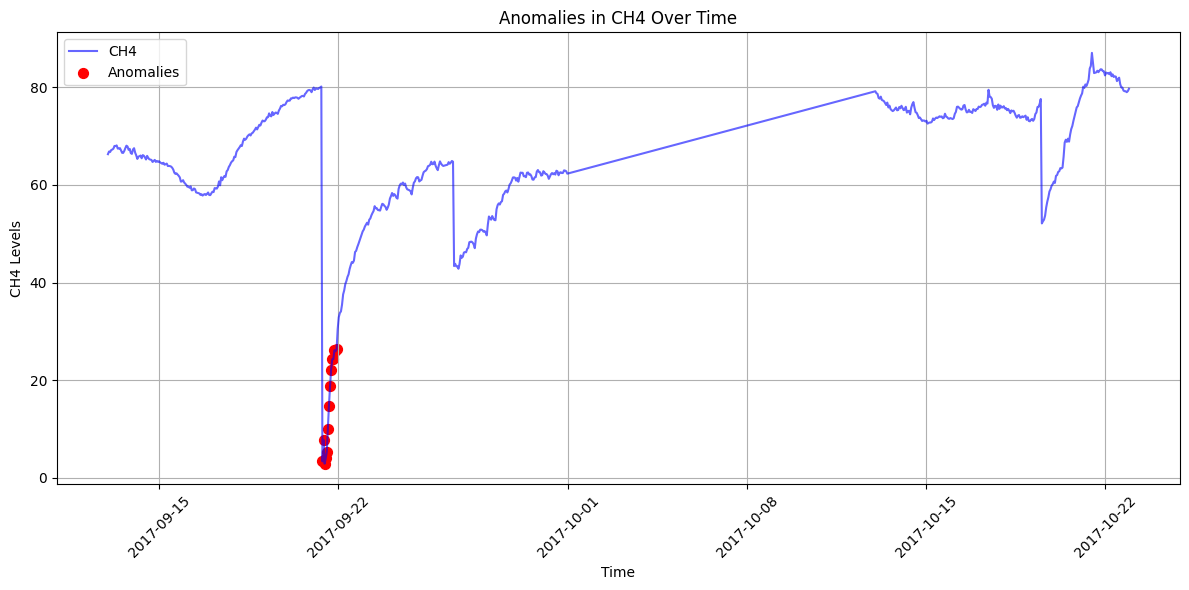

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Calculate Z-scores for CH4
z_scores_CH4 = zscore(data['CH4'])
anomalies_CH4 = np.where((z_scores_CH4 > 2.8) | (z_scores_CH4 < -2.8), data['CH4'], np.nan)

# Create a plot for CH4
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['CH4'], label='CH4', color='blue', alpha=0.6)
plt.scatter(data.index, anomalies_CH4, color='red', label='Anomalies', s=50, marker='o')
plt.title('Anomalies in CH4 Over Time')
plt.xlabel('Time')
plt.ylabel('CH4 Levels')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


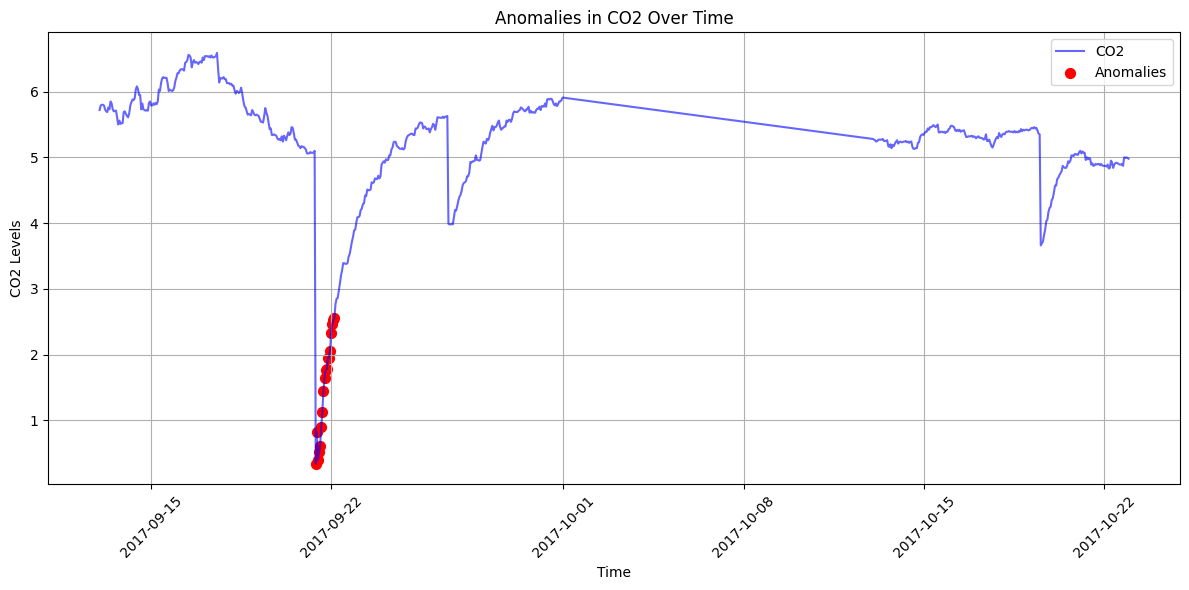

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Calculate Z-scores for CO2
z_scores_CO2 = zscore(data['CO2'])
anomalies_CO2 = np.where((z_scores_CO2 > 2.8) | (z_scores_CO2 < -2.8), data['CO2'], np.nan)

# Create a plot for CO2
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['CO2'], label='CO2', color='blue', alpha=0.6)
plt.scatter(data.index, anomalies_CO2, color='red', label='Anomalies', s=50, marker='o')
plt.title('Anomalies in CO2 Over Time')
plt.xlabel('Time')
plt.ylabel('CO2 Levels')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


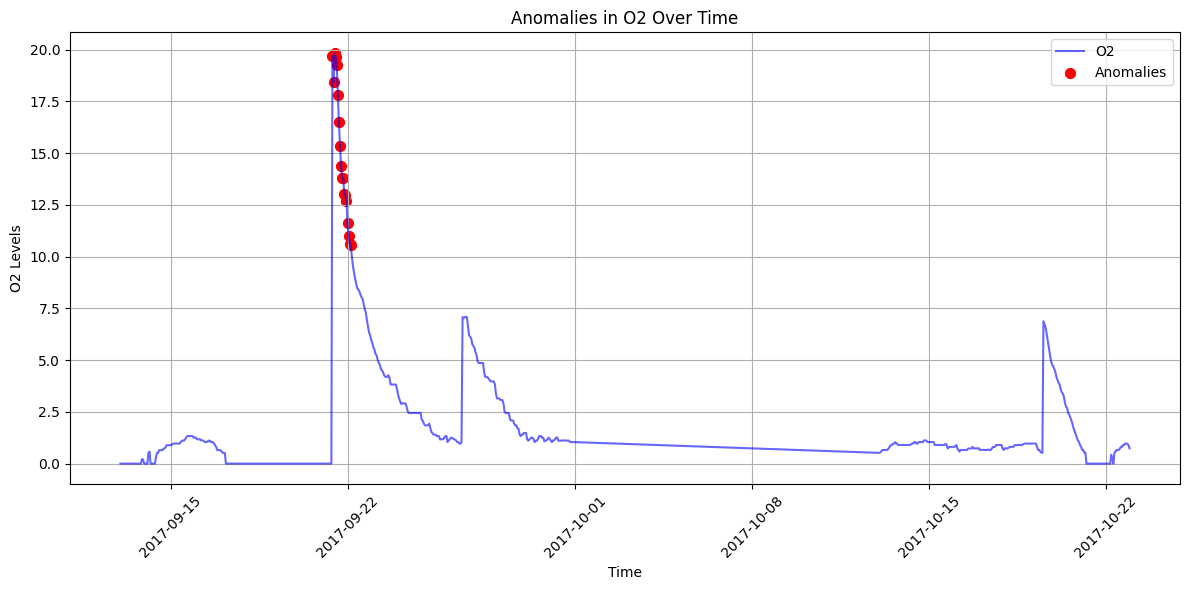

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Calculate Z-scores for O2
z_scores_O2 = zscore(data['O2'])
anomalies_O2 = np.where((z_scores_O2 > 2.8) | (z_scores_O2 < -2.8), data['O2'], np.nan)

# Create a plot for O2
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['O2'], label='O2', color='blue', alpha=0.6)
plt.scatter(data.index, anomalies_O2, color='red', label='Anomalies', s=50, marker='o')
plt.title('Anomalies in O2 Over Time')
plt.xlabel('Time')
plt.ylabel('O2 Levels')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Calculate Z-scores for Temperature
z_scores_Temp = zscore(data['Temp'])
anomalies_Temp = np.where((z_scores_Temp > 2.8) | (z_scores_Temp < -2.8), data['Temp'], np.nan)

# Create a plot for Temperature
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Temp'], label='Temperature', color='blue', alpha=0.6)
plt.scatter(data.index, anomalies_Temp, color='red', label='Anomalies', s=50, marker='o')
plt.title('Anomalies in Temperature Over Time')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Calculate Z-scores for Humidity
z_scores_Humidity = zscore(data['Humidity'])
anomalies_Humidity = np.where((z_scores_Humidity > 2.8) | (z_scores_Humidity < -2.8), data['Humidity'], np.nan)

# Create a plot for Humidity
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Humidity'], label='Humidity', color='blue', alpha=0.6)
plt.scatter(data.index, anomalies_Humidity, color='red', label='Anomalies', s=50, marker='o')
plt.title('Anomalies in Humidity Over Time')
plt.xlabel('Time')
plt.ylabel('Humidity (%)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


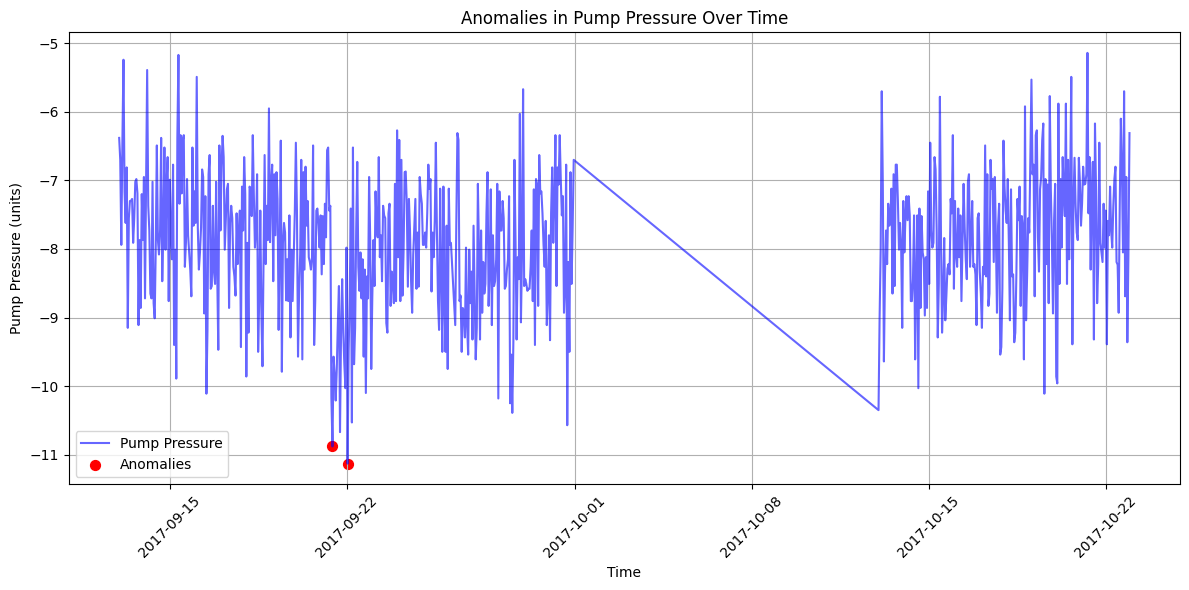

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Calculate Z-scores for Pump Pressure
z_scores_PumpPres = zscore(data['PumpPres'])
anomalies_PumpPres = np.where((z_scores_PumpPres > 2.8) | (z_scores_PumpPres < -2.8), data['PumpPres'], np.nan)

# Create a plot for Pump Pressure
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['PumpPres'], label='Pump Pressure', color='blue', alpha=0.6)
plt.scatter(data.index, anomalies_PumpPres, color='red', label='Anomalies', s=50, marker='o')
plt.title('Anomalies in Pump Pressure Over Time')
plt.xlabel('Time')
plt.ylabel('Pump Pressure (units)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


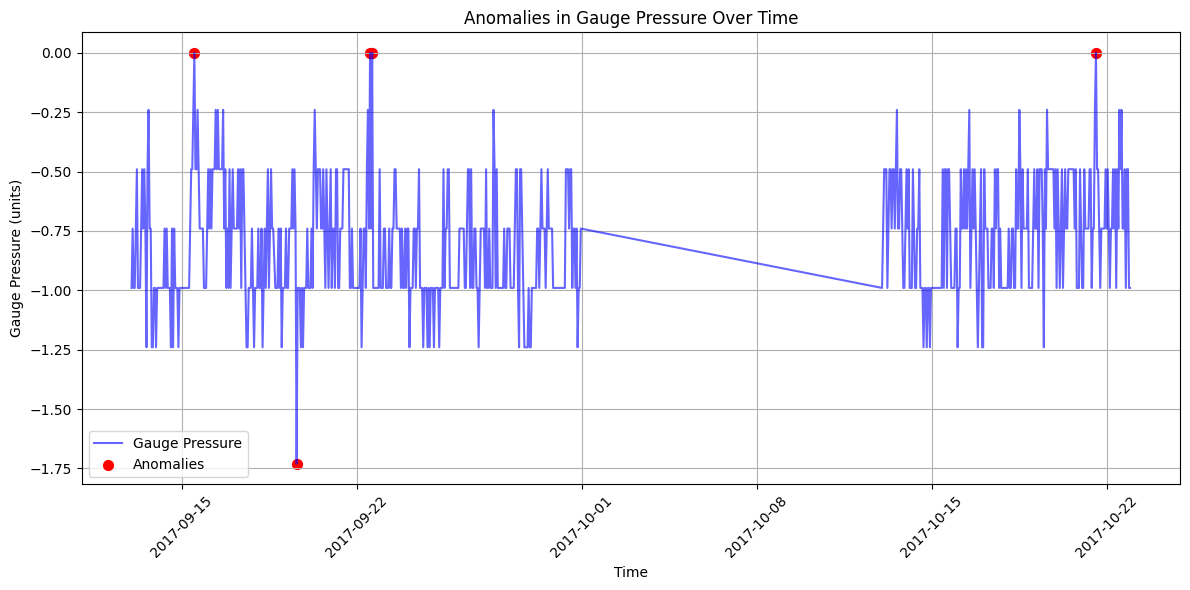

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Calculate Z-scores for Gauge Pressure
z_scores_GaugePres = zscore(data['GaugePres'])
anomalies_GaugePres = np.where((z_scores_GaugePres > 2.8) | (z_scores_GaugePres < -2.8), data['GaugePres'], np.nan)

# Create a plot for Gauge Pressure
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['GaugePres'], label='Gauge Pressure', color='blue', alpha=0.6)
plt.scatter(data.index, anomalies_GaugePres, color='red', label='Anomalies', s=50, marker='o')
plt.title('Anomalies in Gauge Pressure Over Time')
plt.xlabel('Time')
plt.ylabel('Gauge Pressure (units)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Calculate Z-scores for Barometric Pressure
z_scores_BaroPres = zscore(data['BaroPres'])
anomalies_BaroPres = np.where((z_scores_BaroPres > 2.8) | (z_scores_BaroPres < -2.8), data['BaroPres'], np.nan)

# Create a plot for Barometric Pressure
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['BaroPres'], label='Barometric Pressure', color='blue', alpha=0.6)
plt.scatter(data.index, anomalies_BaroPres, color='red', label='Anomalies', s=50, marker='o')
plt.title('Anomalies in Barometric Pressure Over Time')
plt.xlabel('Time')
plt.ylabel('Barometric Pressure (units)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
def isolation_forest_anomaly_detection(sensor_data, sensor_name):
    # Reshape data for Isolation Forest
    sensor_data_reshaped = sensor_data.values.reshape(-1, 1)

    # Fit the Isolation Forest model
    model = IsolationForest(contamination=0.1)  # Adjust contamination as needed
    model.fit(sensor_data_reshaped)

    # Predict anomalies
    predictions = model.predict(sensor_data_reshaped)

    # Anomalies are marked as -1
    anomalies = np.where(predictions == -1, sensor_data, np.nan)

    # Count the number of anomalies
    num_anomalies = np.sum(predictions == -1)

    return anomalies, num_anomalies



Sensor: CH4, Number of anomalies detected (Isolation Forest): 66


Sensor: CO2, Number of anomalies detected (Isolation Forest): 66


Sensor: O2, Number of anomalies detected (Isolation Forest): 65


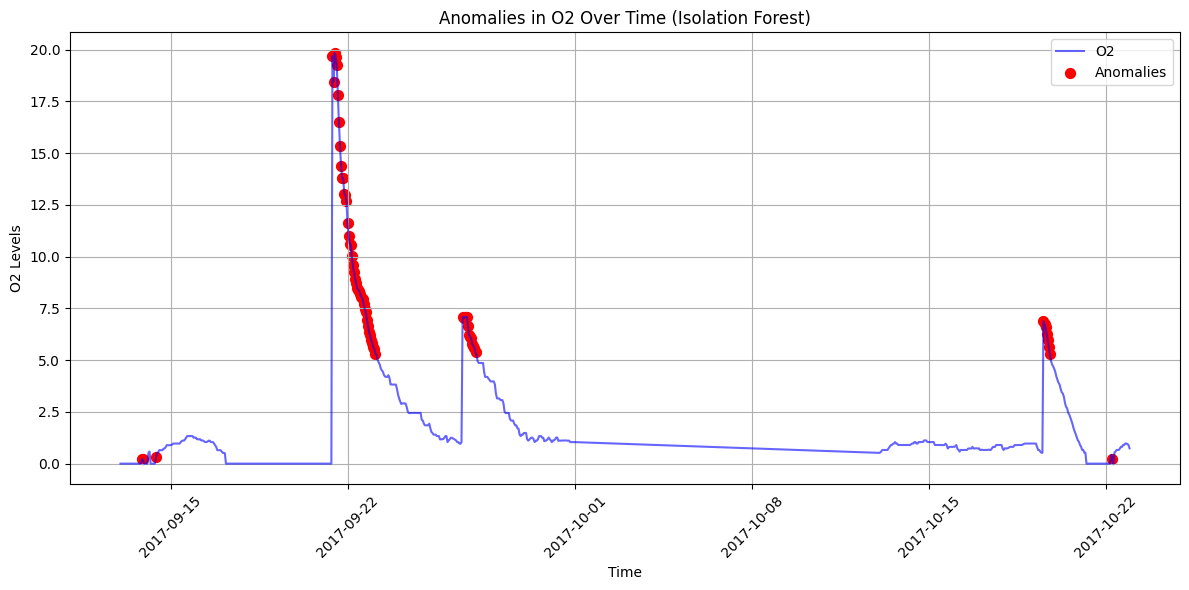

Sensor: Temp, Number of anomalies detected (Isolation Forest): 65


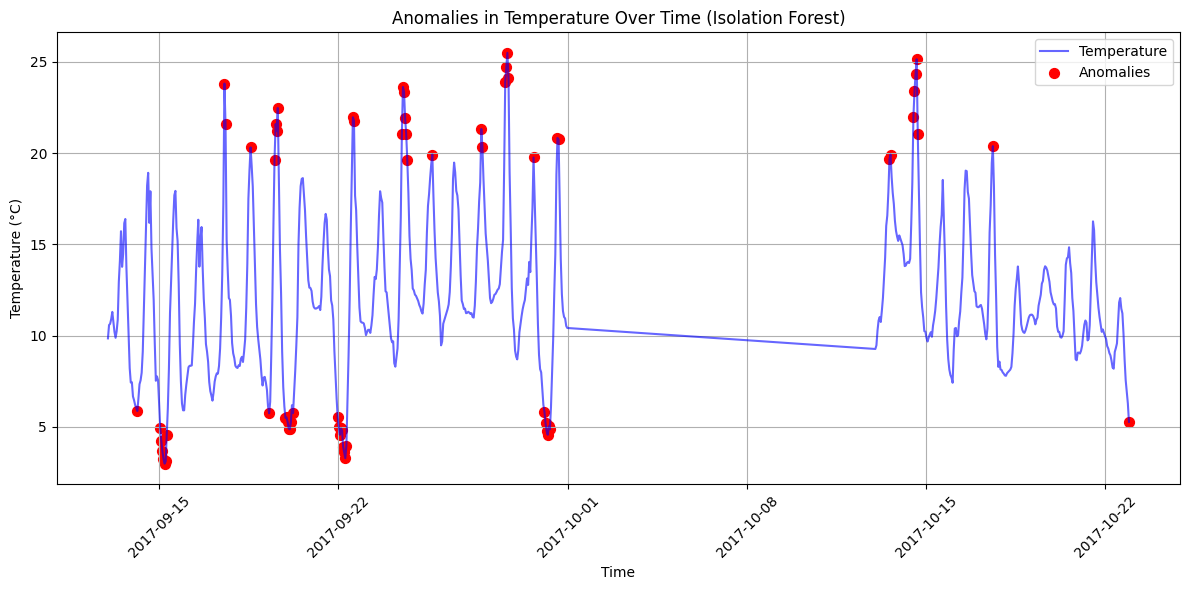

Sensor: Humidity, Number of anomalies detected (Isolation Forest): 66


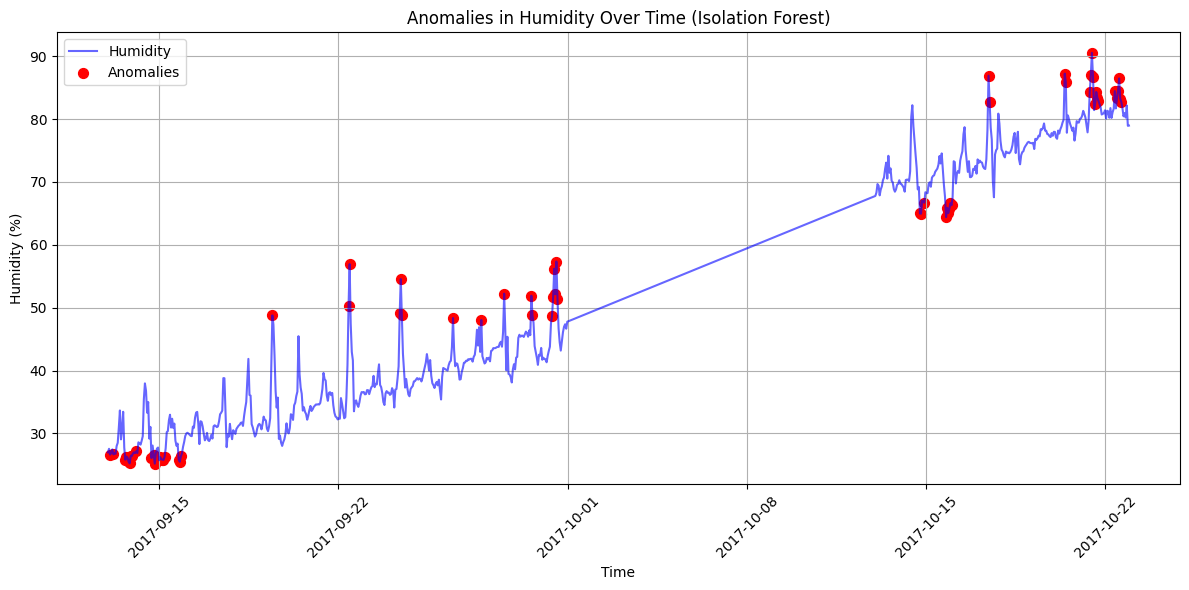

Sensor: Pump Pressure, Number of anomalies detected (Isolation Forest): 65


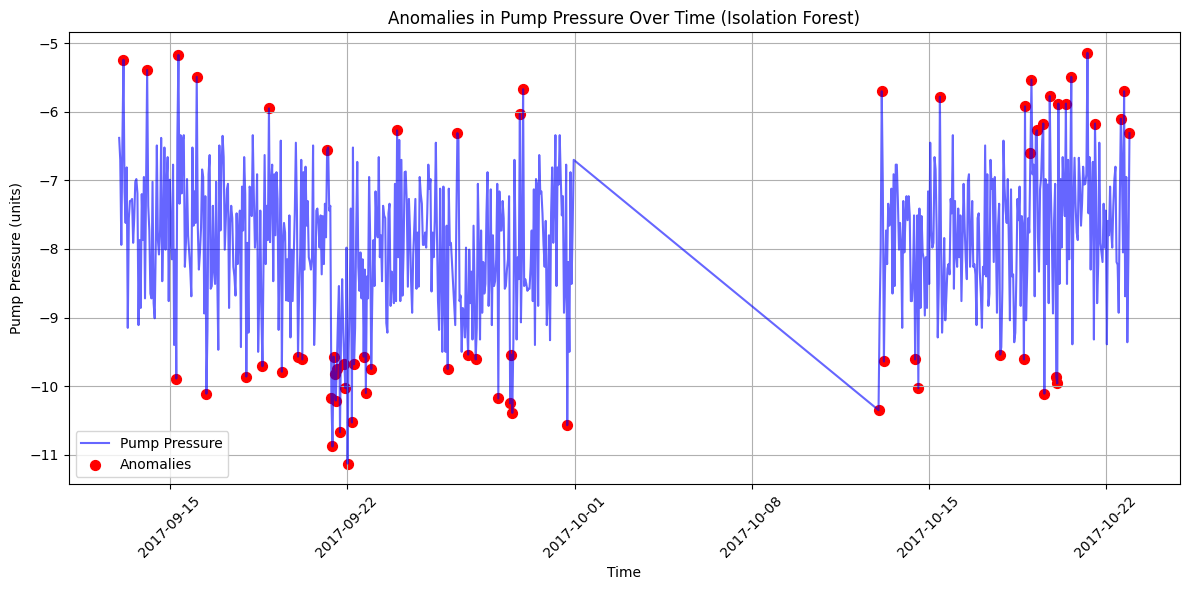

Sensor: Gauge Pressure, Number of anomalies detected (Isolation Forest): 59


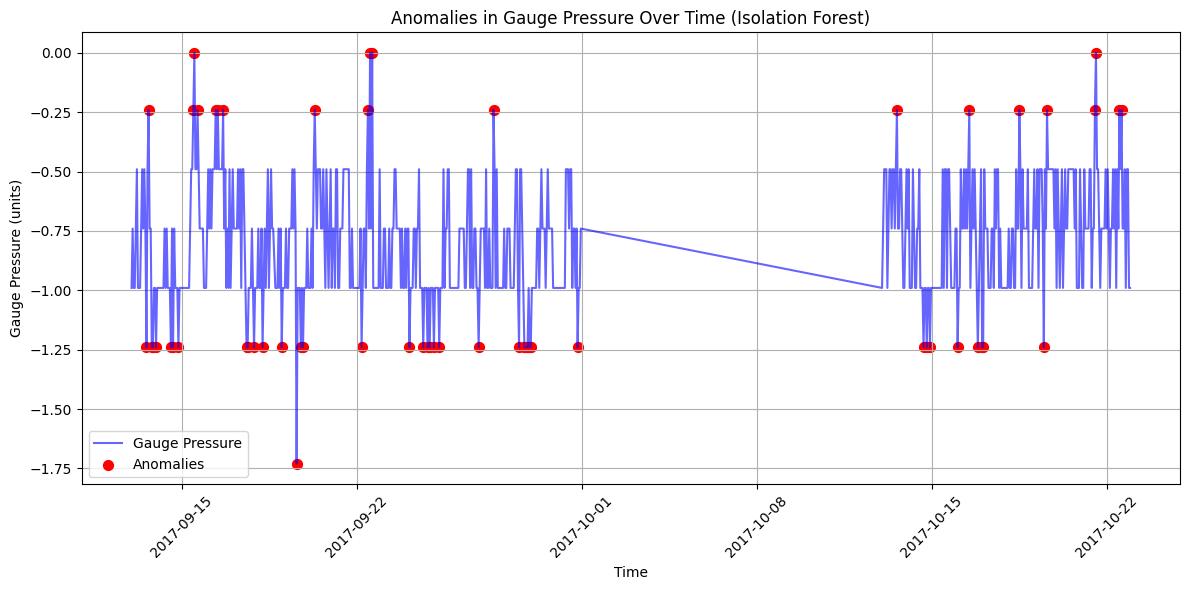

Sensor: Barometric Pressure, Number of anomalies detected (Isolation Forest): 66


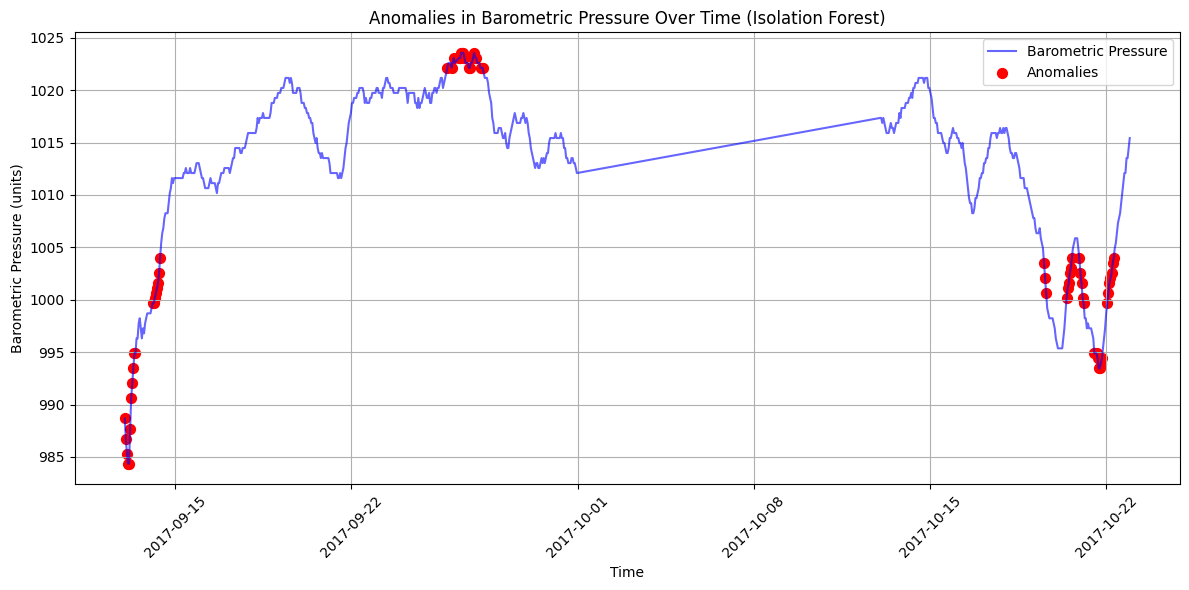

Sensor: CH4, Number of anomalies detected (Isolation Forest): 66
Sensor: Temp, Number of anomalies detected (Isolation Forest): 65
Sensor: CO2, Number of anomalies detected (Isolation Forest): 66
Sensor: O2, Number of anomalies detected (Isolation Forest): 65
Sensor: Humidity, Number of anomalies detected (Isolation Forest): 66
Sensor: Pump Pressure, Number of anomalies detected (Isolation Forest): 65
Sensor: Gauge Pressure, Number of anomalies detected (Isolation Forest): 59
Sensor: Barometric Pressure, Number of anomalies detected (Isolation Forest): 66


In [ ]:
# Isolation Forest for CH4
# Isolation Forest for CH4
anomalies_CH4_if, num_anomalies_CH4 = isolation_forest_anomaly_detection(data['CH4'], 'CH4')
print(f"Sensor: CH4, Number of anomalies detected (Isolation Forest): {num_anomalies_CH4}")

# Plot for CH4
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['CH4'], label='CH4', color='blue', alpha=0.6)
plt.scatter(data.index, anomalies_CH4_if, color='red', label='Anomalies', s=50, marker='o')
plt.title('Anomalies in CH4 Over Time (Isolation Forest)')
plt.xlabel('Time')
plt.ylabel('CH4 Levels')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



# Isolation Forest for CO2
anomalies_CO2_if, num_anomalies_CO2 = isolation_forest_anomaly_detection(data['CO2'], 'CO2')
print(f"Sensor: CO2, Number of anomalies detected (Isolation Forest): {num_anomalies_CO2}")

# Plot for CO2
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['CO2'], label='CO2', color='blue', alpha=0.6)
plt.scatter(data.index, anomalies_CO2_if, color='red', label='Anomalies', s=50, marker='o')
plt.title('Anomalies in CO2 Over Time (Isolation Forest)')
plt.xlabel('Time')
plt.ylabel('CO2 Levels')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Isolation Forest for O2
anomalies_O2_if, num_anomalies_O2 = isolation_forest_anomaly_detection(data['O2'], 'O2')
print(f"Sensor: O2, Number of anomalies detected (Isolation Forest): {num_anomalies_O2}")

# Plot for O2
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['O2'], label='O2', color='blue', alpha=0.6)
plt.scatter(data.index, anomalies_O2_if, color='red', label='Anomalies', s=50, marker='o')
plt.title('Anomalies in O2 Over Time (Isolation Forest)')
plt.xlabel('Time')
plt.ylabel('O2 Levels')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



# Isolation Forest for Temperature
anomalies_Temp_if, num_anomalies_Temp = isolation_forest_anomaly_detection(data['Temp'], 'Temp')
print(f"Sensor: Temp, Number of anomalies detected (Isolation Forest): {num_anomalies_Temp}")

# Plot for Temperature
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Temp'], label='Temperature', color='blue', alpha=0.6)
plt.scatter(data.index, anomalies_Temp_if, color='red', label='Anomalies', s=50, marker='o')
plt.title('Anomalies in Temperature Over Time (Isolation Forest)')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



# Isolation Forest for Humidity

anomalies_Humidity_if, num_anomalies_Humidity = isolation_forest_anomaly_detection(data['Humidity'], 'Humidity')
print(f"Sensor: Humidity, Number of anomalies detected (Isolation Forest): {num_anomalies_Humidity}")

# Plot for Humidity
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Humidity'], label='Humidity', color='blue', alpha=0.6)
plt.scatter(data.index, anomalies_Humidity_if, color='red', label='Anomalies', s=50, marker='o')
plt.title('Anomalies in Humidity Over Time (Isolation Forest)')
plt.xlabel('Time')
plt.ylabel('Humidity (%)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




# Isolation Forest for Pump Pressure

anomalies_PumpPres_if, num_anomalies_PumpPres = isolation_forest_anomaly_detection(data['PumpPres'], 'PumpPres')
print(f"Sensor: Pump Pressure, Number of anomalies detected (Isolation Forest): {num_anomalies_PumpPres}")

# Plot for Pump Pressure
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['PumpPres'], label='Pump Pressure', color='blue', alpha=0.6)
plt.scatter(data.index, anomalies_PumpPres_if, color='red', label='Anomalies', s=50, marker='o')
plt.title('Anomalies in Pump Pressure Over Time (Isolation Forest)')
plt.xlabel('Time')
plt.ylabel('Pump Pressure (units)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Isolation Forest for Gauge Pressure
anomalies_GaugePres_if, num_anomalies_GaugePres = isolation_forest_anomaly_detection(data['GaugePres'], 'GaugePres')
print(f"Sensor: Gauge Pressure, Number of anomalies detected (Isolation Forest): {num_anomalies_GaugePres}")

# Plot for Gauge Pressure
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['GaugePres'], label='Gauge Pressure', color='blue', alpha=0.6)
plt.scatter(data.index, anomalies_GaugePres_if, color='red', label='Anomalies', s=50, marker='o')
plt.title('Anomalies in Gauge Pressure Over Time (Isolation Forest)')
plt.xlabel('Time')
plt.ylabel('Gauge Pressure (units)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Isolation Forest for Barometric Pressure
anomalies_BaroPres_if, num_anomalies_BaroPres = isolation_forest_anomaly_detection(data['BaroPres'], 'BaroPres')
print(f"Sensor: Barometric Pressure, Number of anomalies detected (Isolation Forest): {num_anomalies_BaroPres}")

# Plot for Barometric Pressure
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['BaroPres'], label='Barometric Pressure', color='blue', alpha=0.6)
plt.scatter(data.index, anomalies_BaroPres_if, color='red', label='Anomalies', s=50, marker='o')
plt.title('Anomalies in Barometric Pressure Over Time (Isolation Forest)')
plt.xlabel('Time')
plt.ylabel('Barometric Pressure (units)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(f"Sensor: CH4, Number of anomalies detected (Isolation Forest): {num_anomalies_CH4}")
print(f"Sensor: Temp, Number of anomalies detected (Isolation Forest): {num_anomalies_Temp}")
print(f"Sensor: CO2, Number of anomalies detected (Isolation Forest): {num_anomalies_CO2}")
print(f"Sensor: O2, Number of anomalies detected (Isolation Forest): {num_anomalies_O2}")
print(f"Sensor: Humidity, Number of anomalies detected (Isolation Forest): {num_anomalies_Humidity}")
print(f"Sensor: Pump Pressure, Number of anomalies detected (Isolation Forest): {num_anomalies_PumpPres}")
print(f"Sensor: Gauge Pressure, Number of anomalies detected (Isolation Forest): {num_anomalies_GaugePres}")
print(f"Sensor: Barometric Pressure, Number of anomalies detected (Isolation Forest): {num_anomalies_BaroPres}")



Processing CH4...


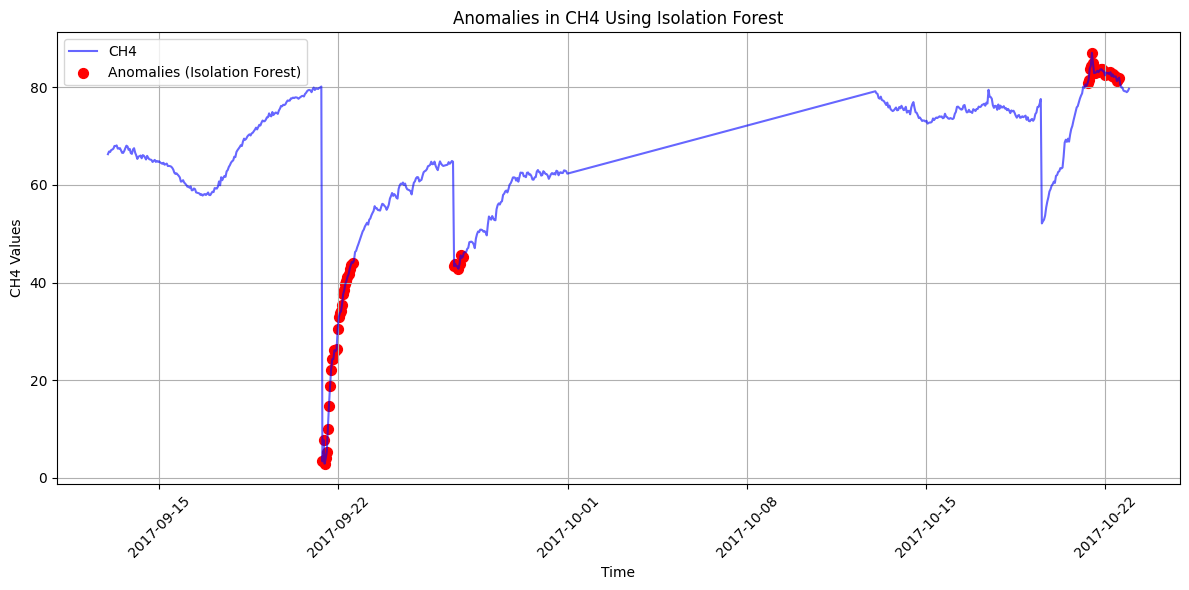

Isolation Forest: 66 anomalies detected


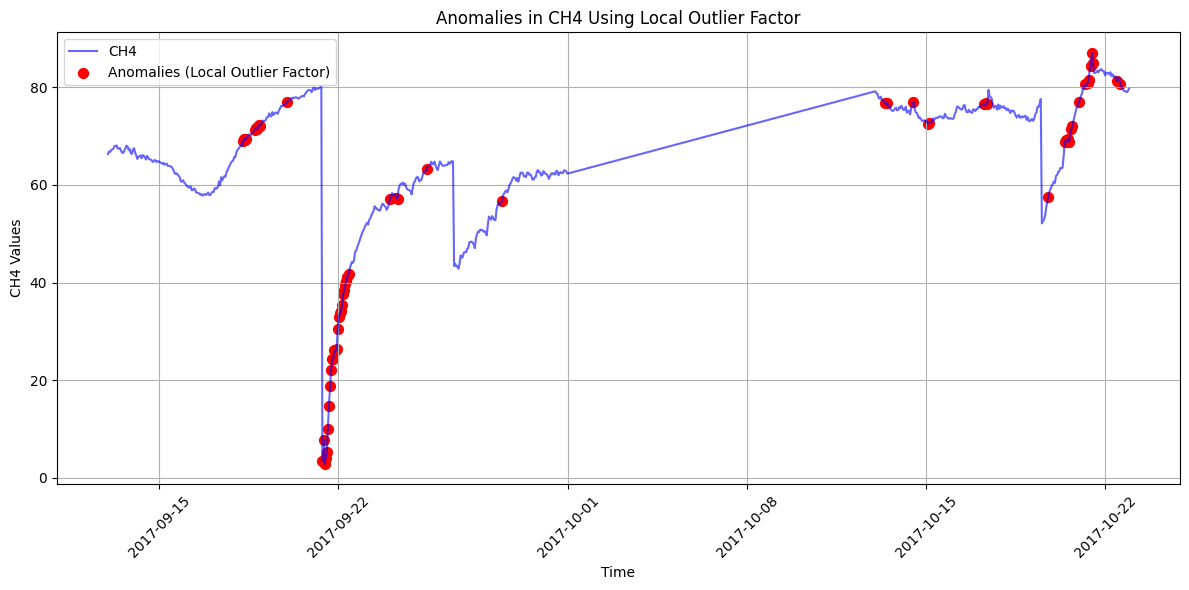

Local Outlier Factor: 66 anomalies detected


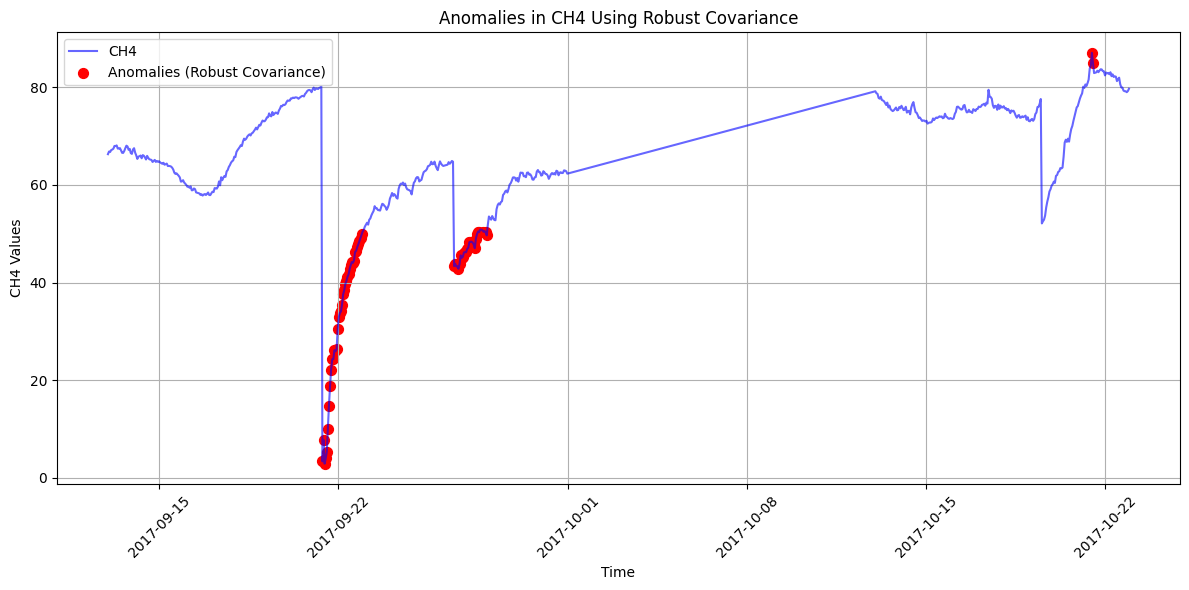

Robust Covariance: 66 anomalies detected


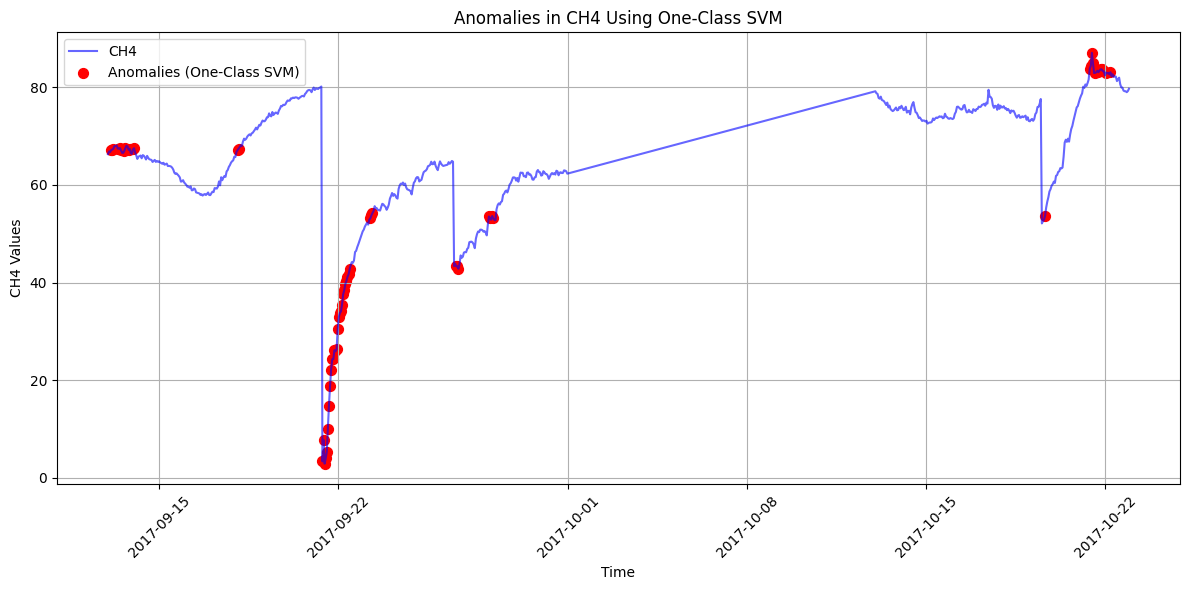

One-Class SVM: 67 anomalies detected


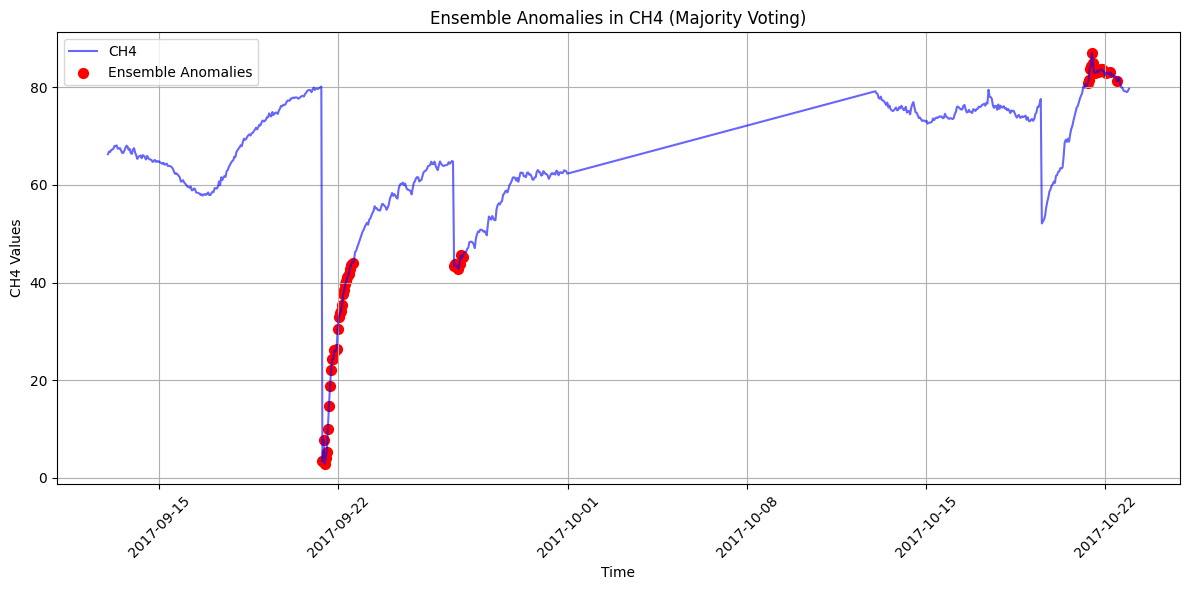

Ensemble detected 54 anomalies

Processing CO2...


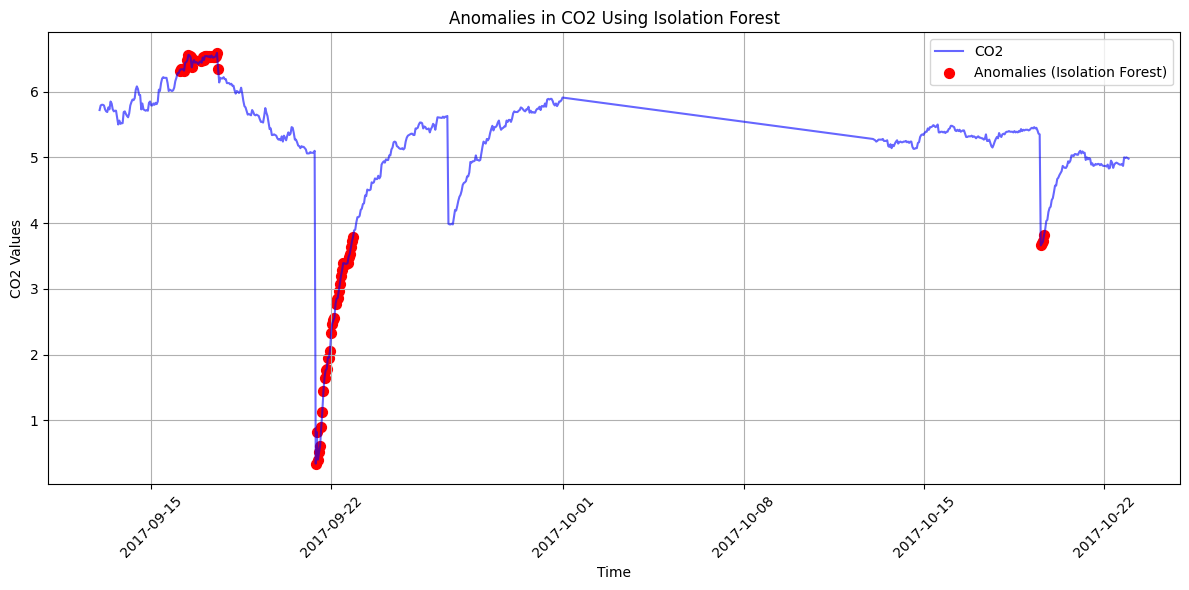

Isolation Forest: 66 anomalies detected


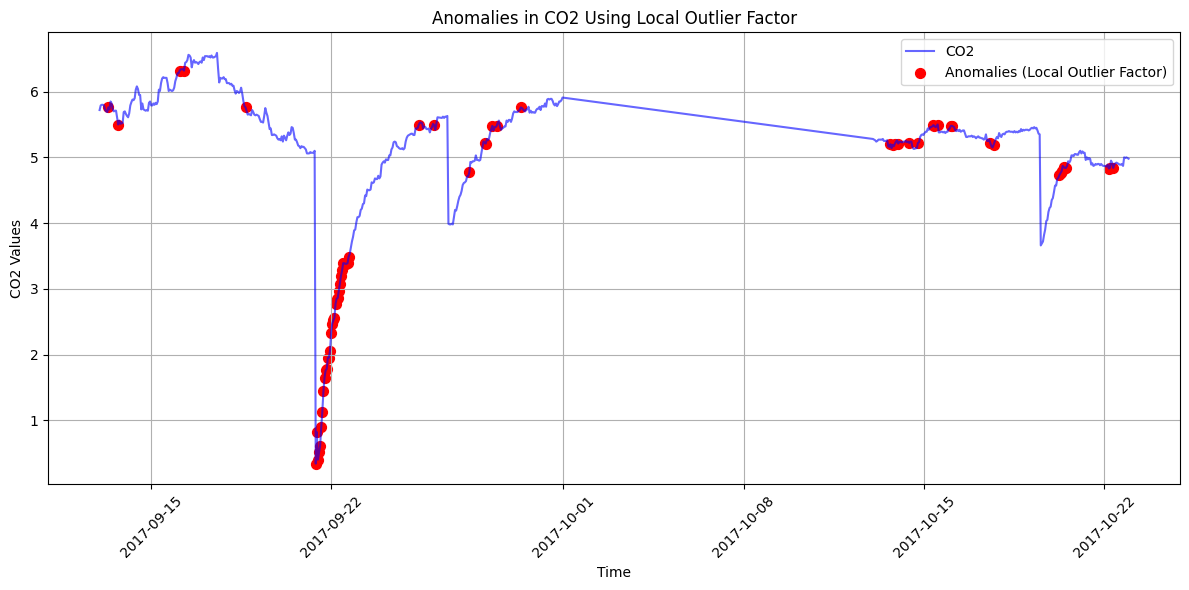

Local Outlier Factor: 66 anomalies detected


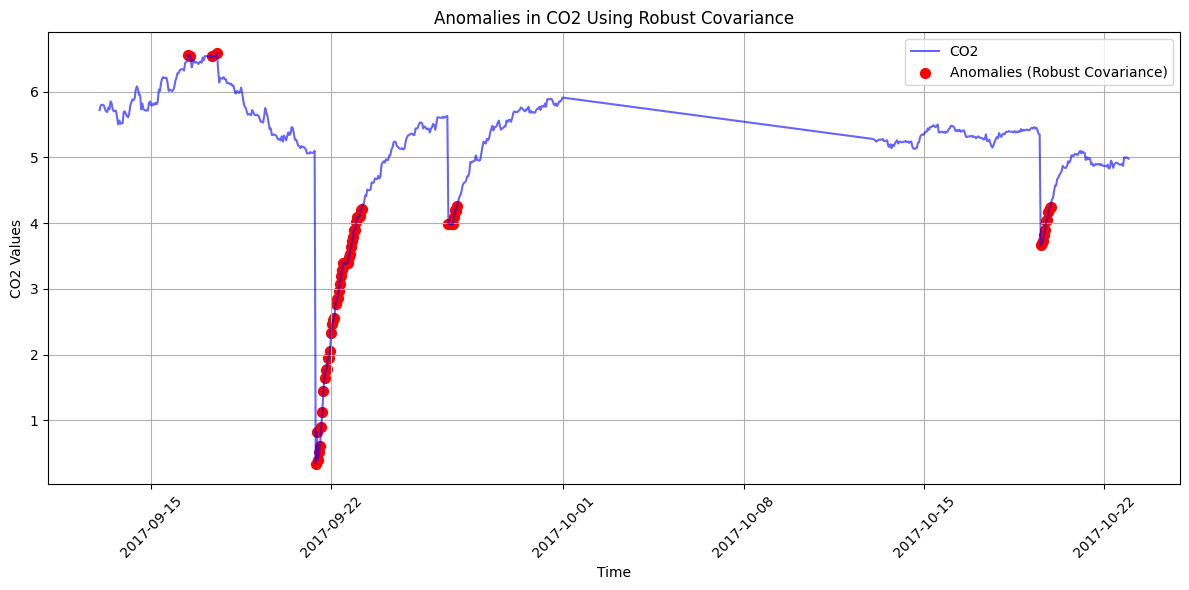

Robust Covariance: 66 anomalies detected


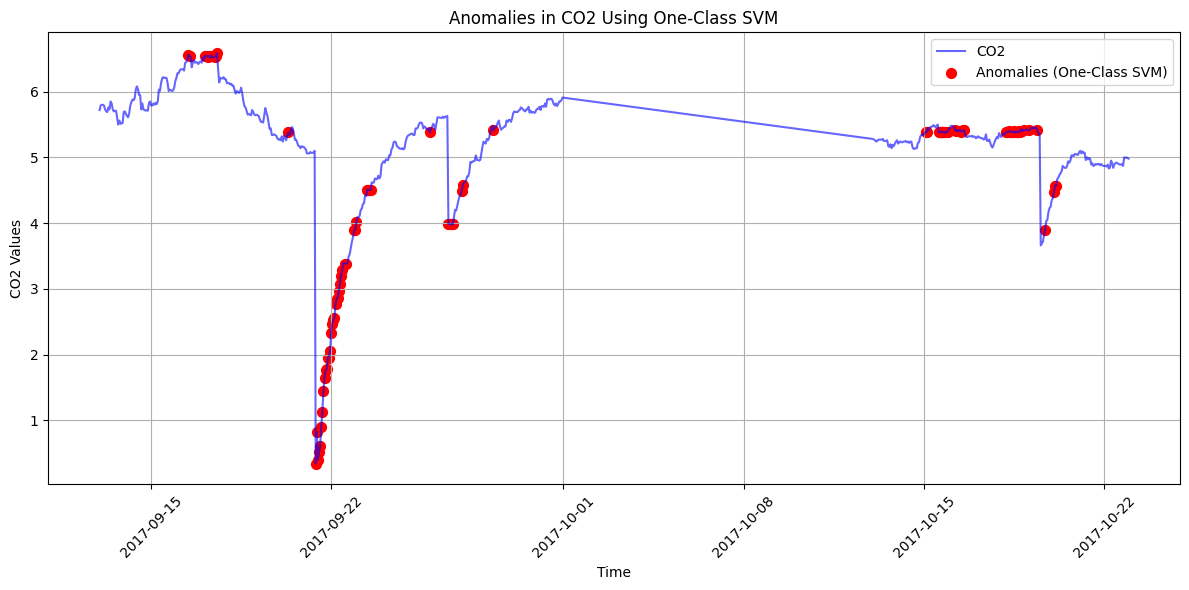

One-Class SVM: 94 anomalies detected


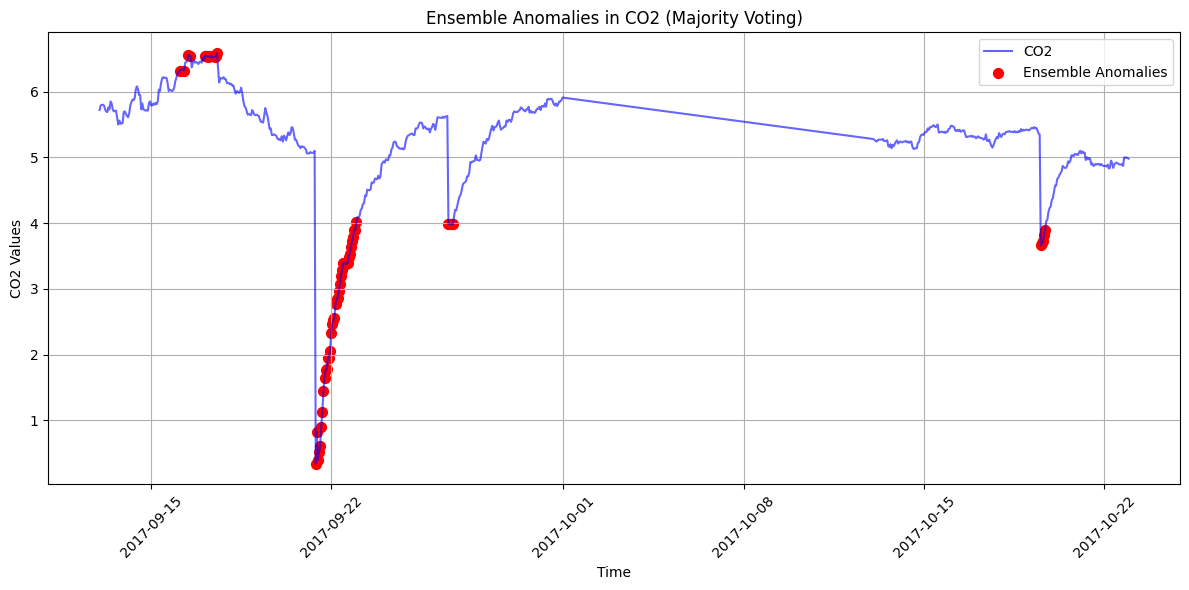

Ensemble detected 61 anomalies

Processing O2...


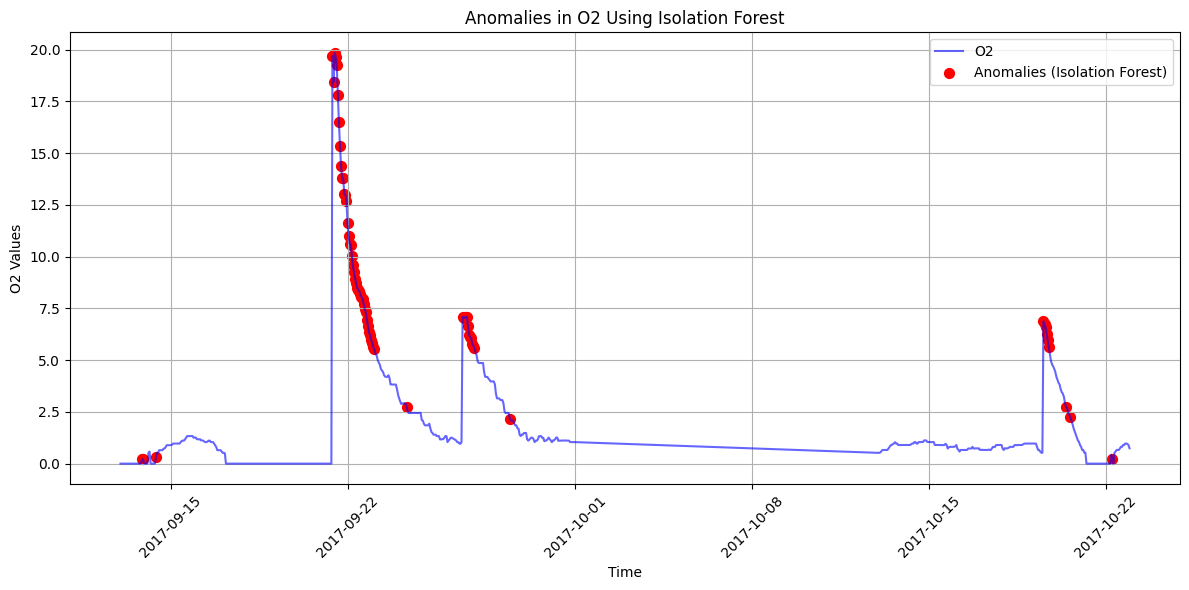

Isolation Forest: 66 anomalies detected


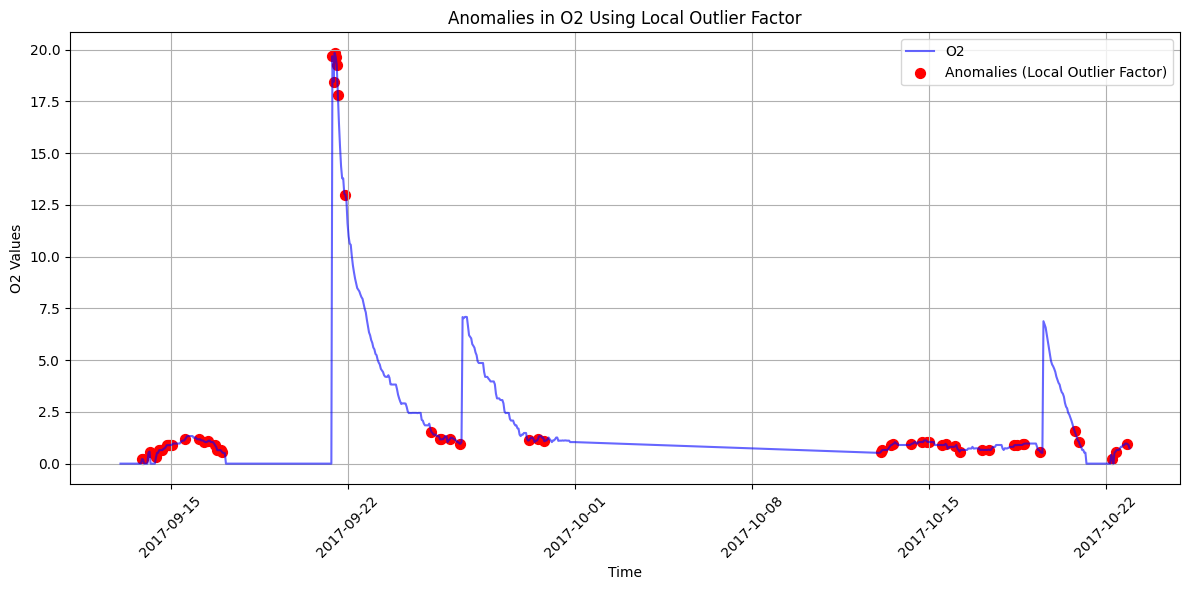

Local Outlier Factor: 62 anomalies detected


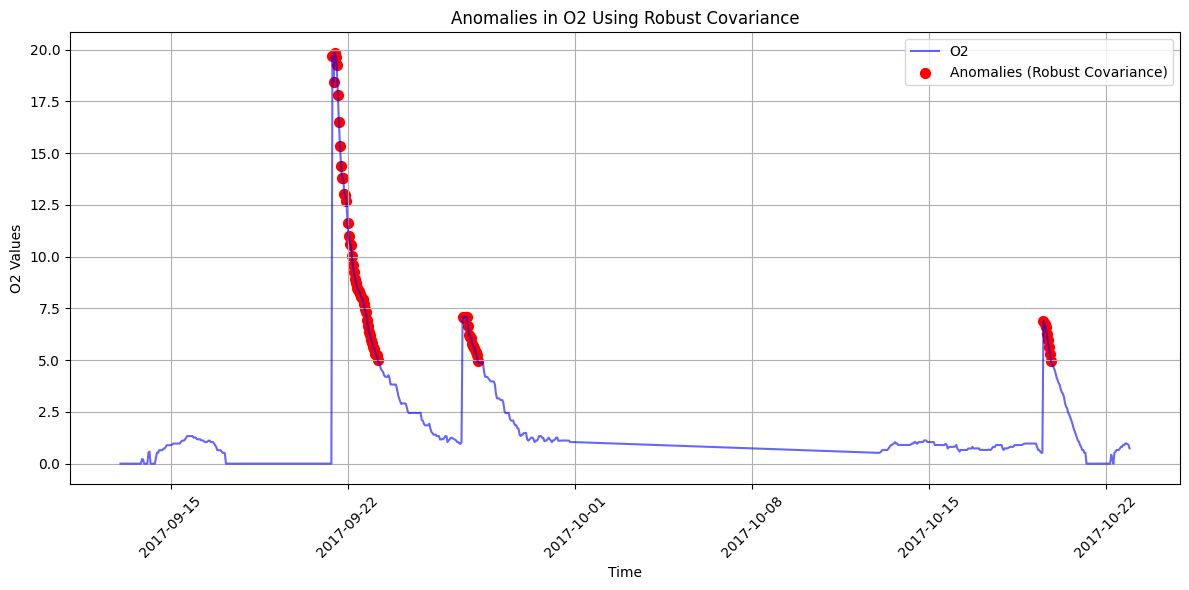

Robust Covariance: 66 anomalies detected


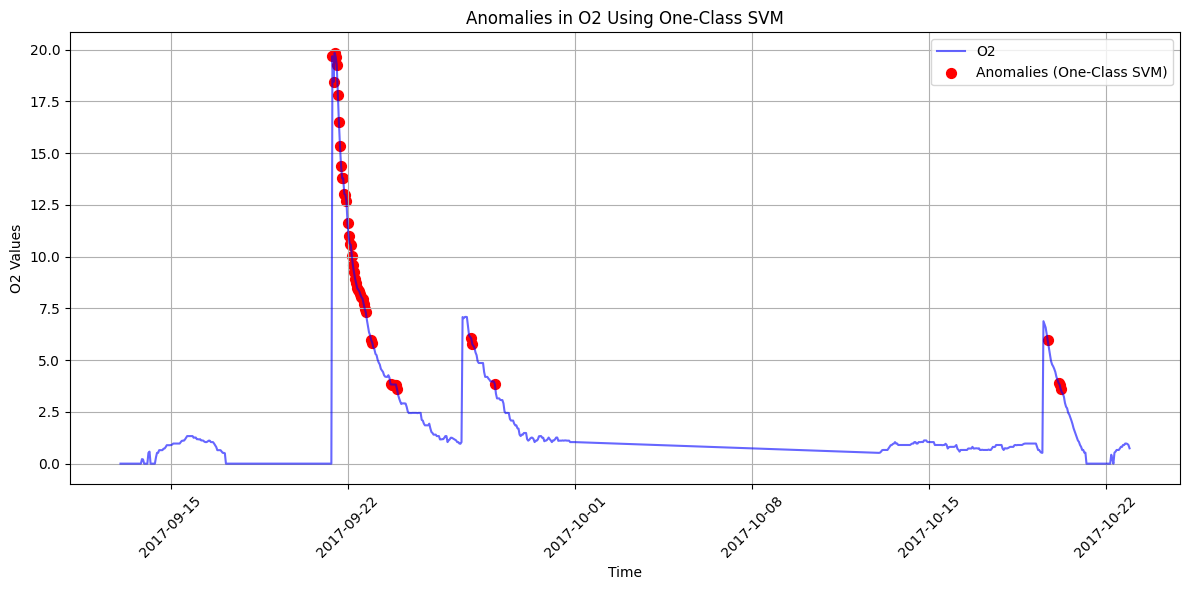

One-Class SVM: 48 anomalies detected


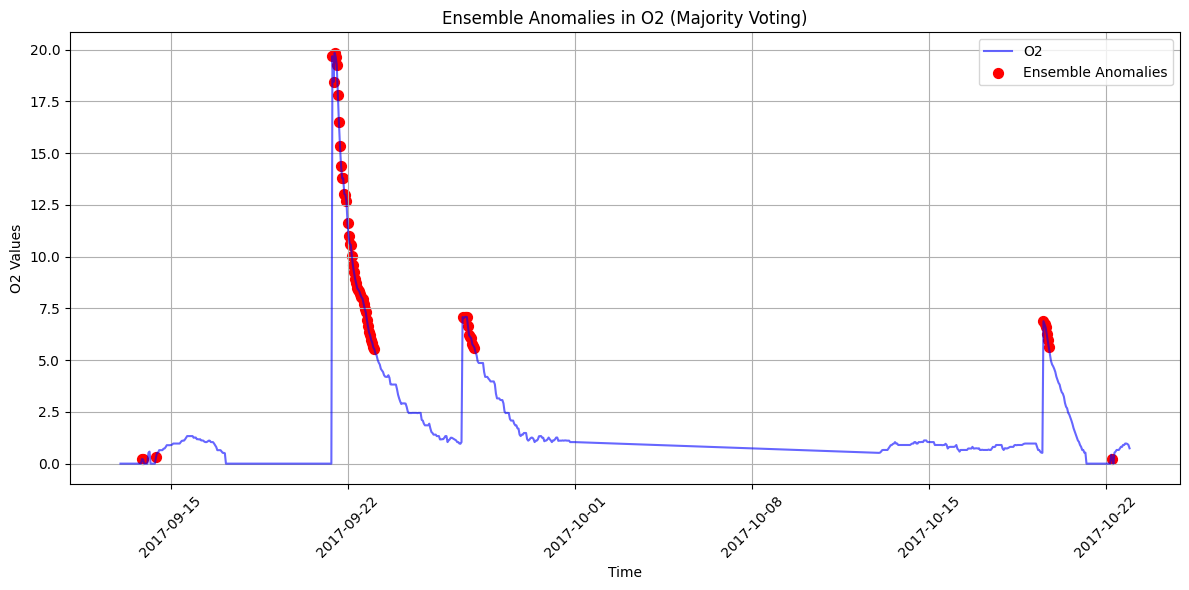

Ensemble detected 62 anomalies

Processing Temp...


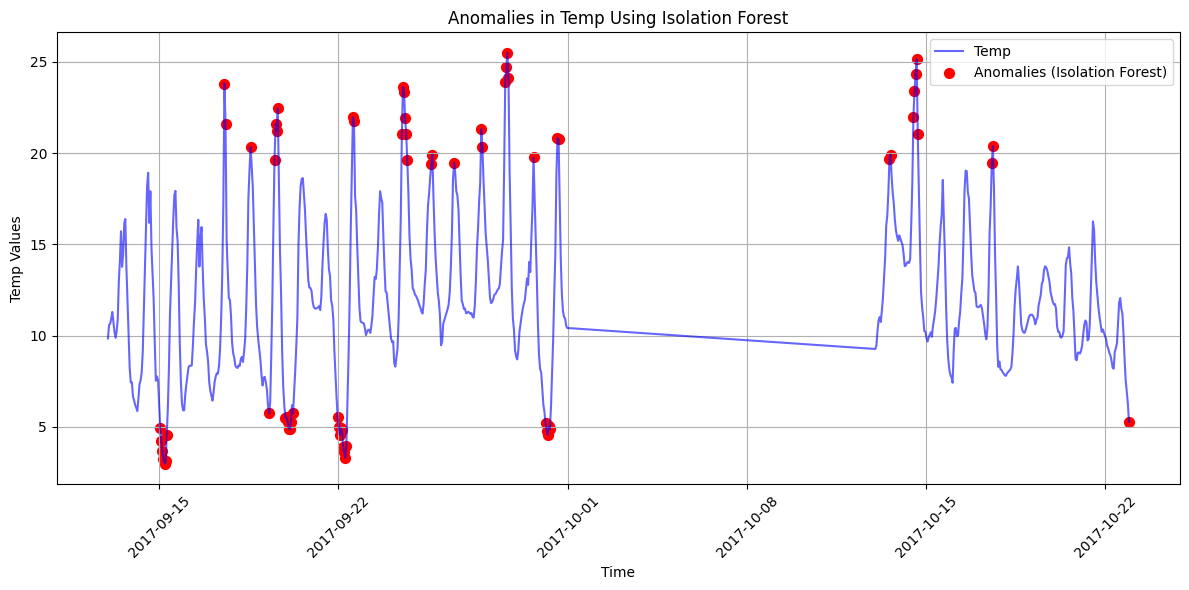

Isolation Forest: 66 anomalies detected


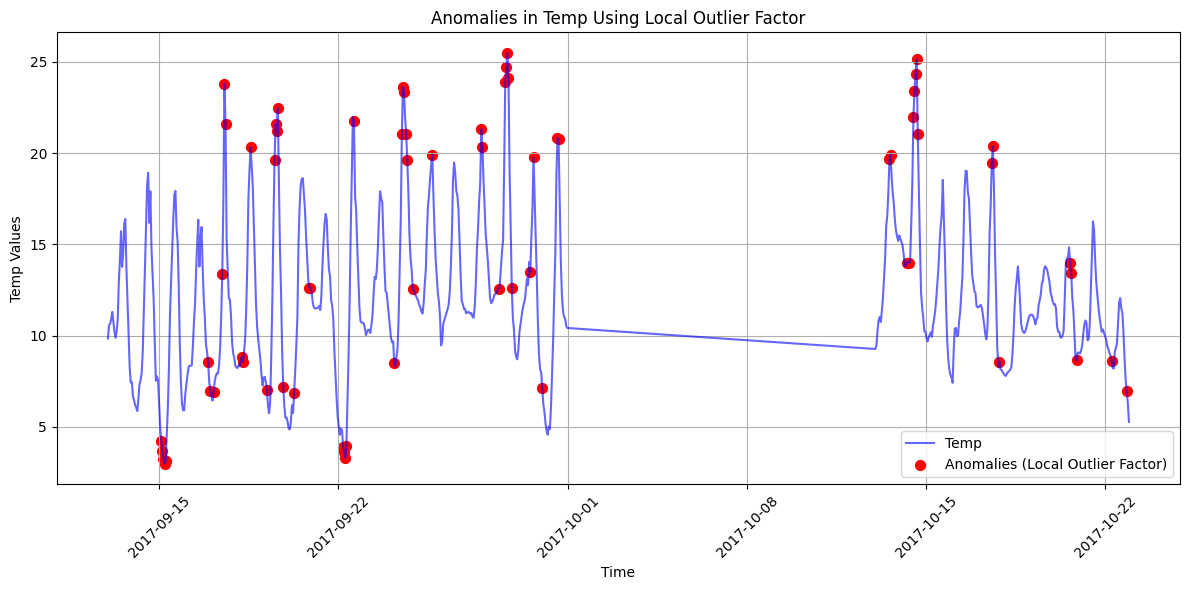

Local Outlier Factor: 66 anomalies detected


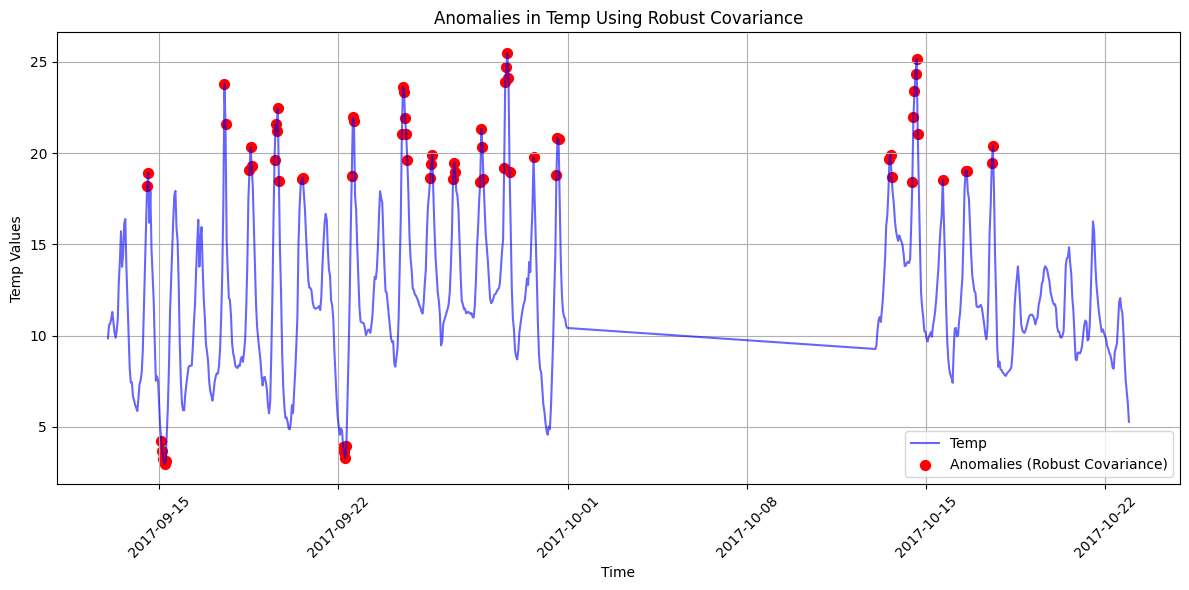

Robust Covariance: 66 anomalies detected


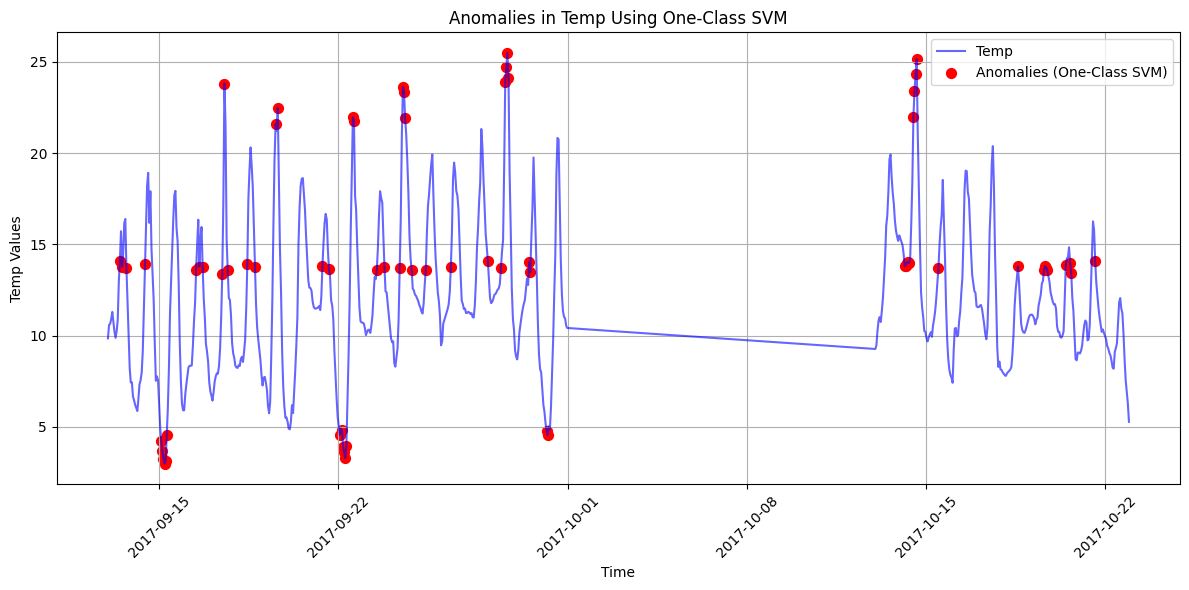

One-Class SVM: 68 anomalies detected


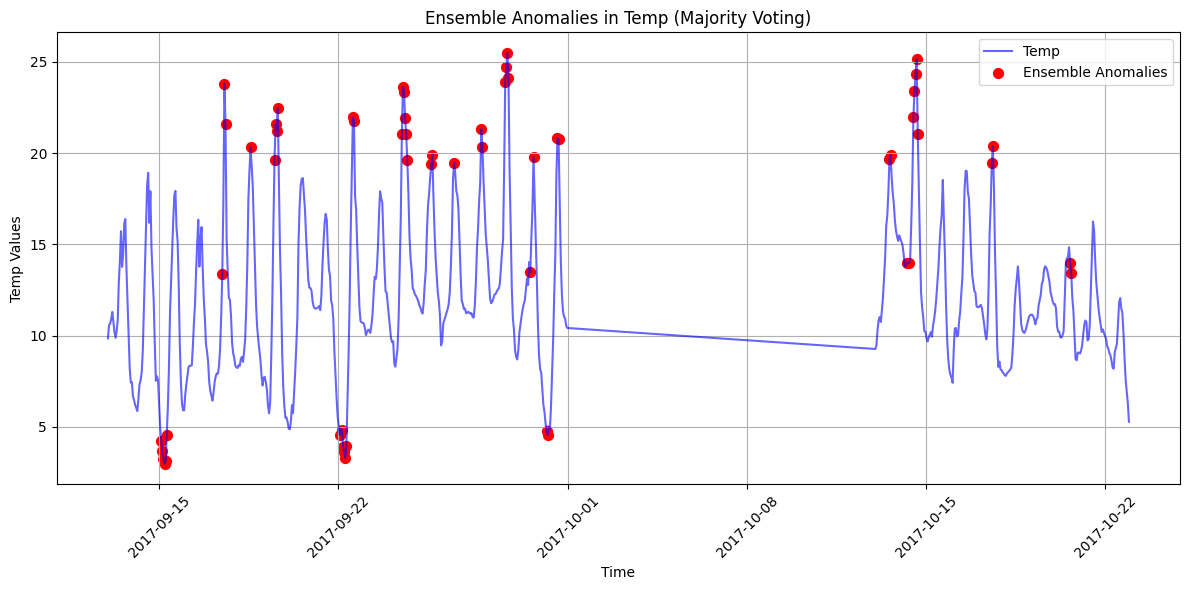

Ensemble detected 56 anomalies

Processing Humidity...


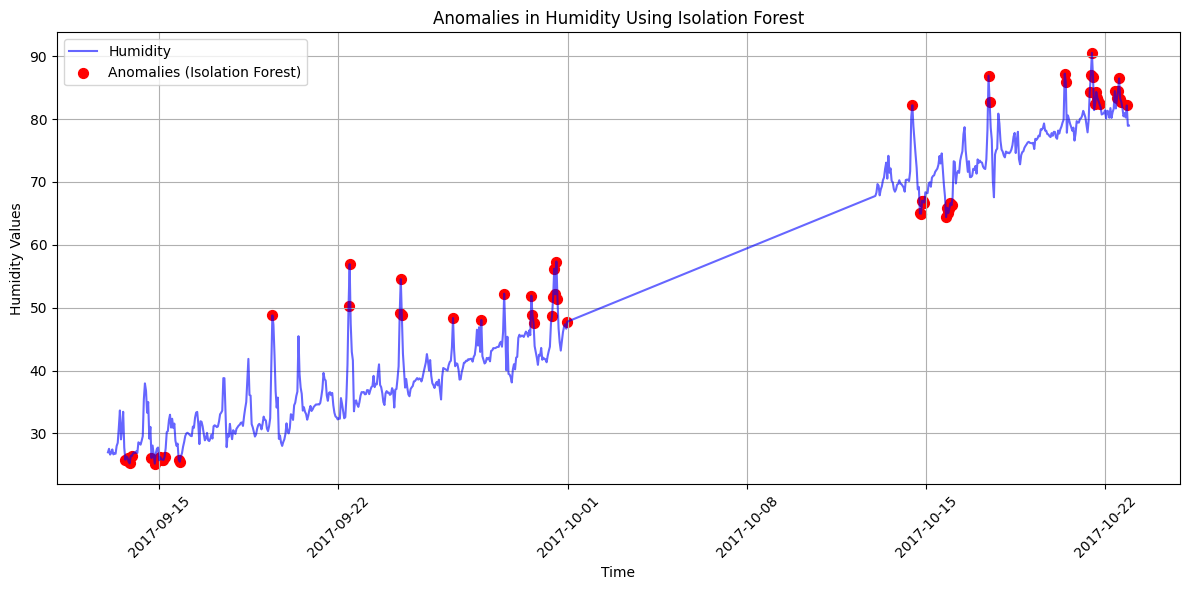

Isolation Forest: 66 anomalies detected


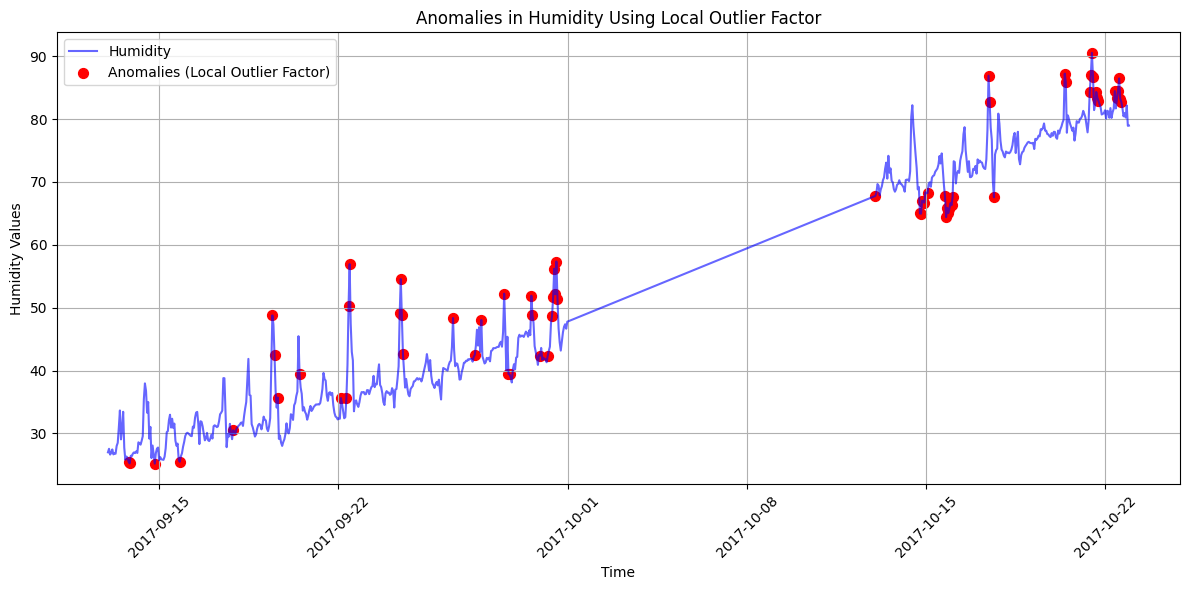

Local Outlier Factor: 66 anomalies detected


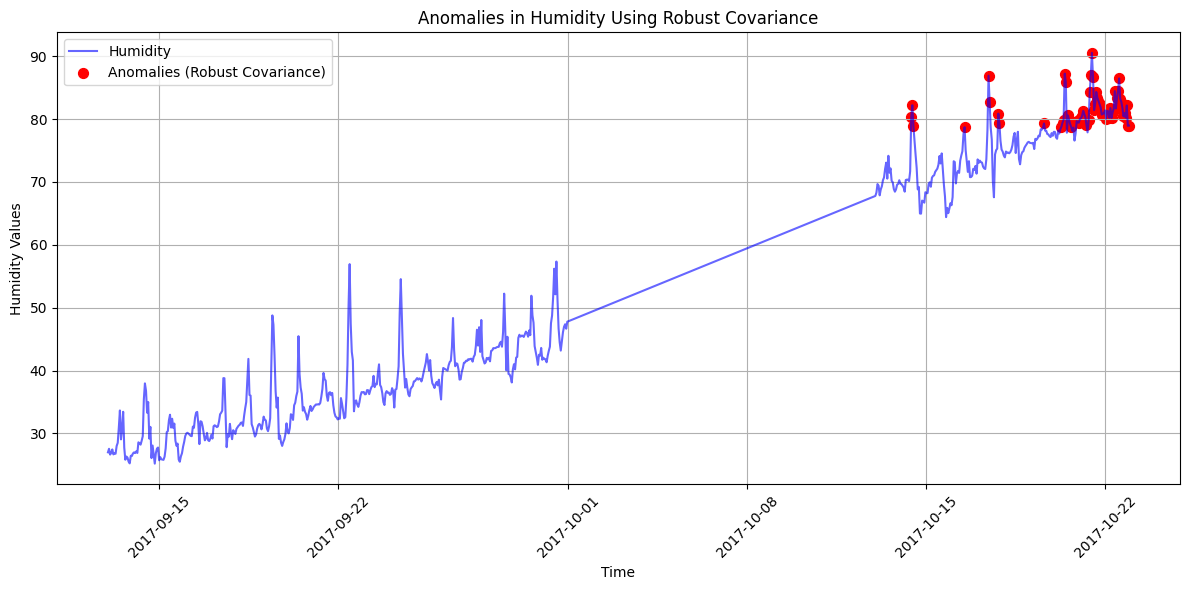

Robust Covariance: 66 anomalies detected


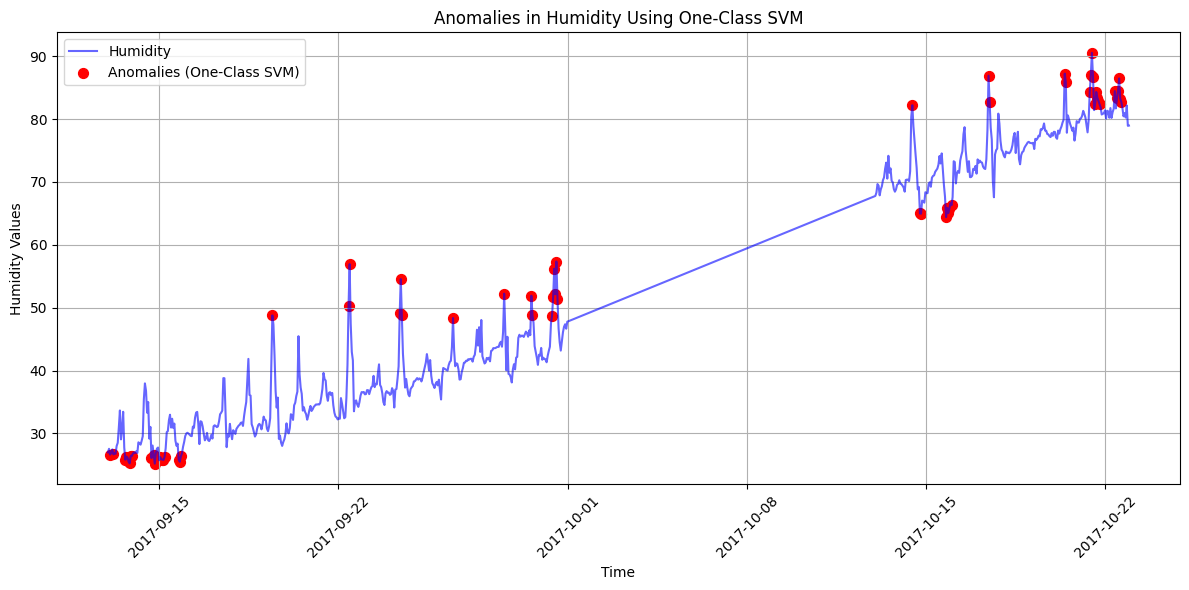

One-Class SVM: 64 anomalies detected


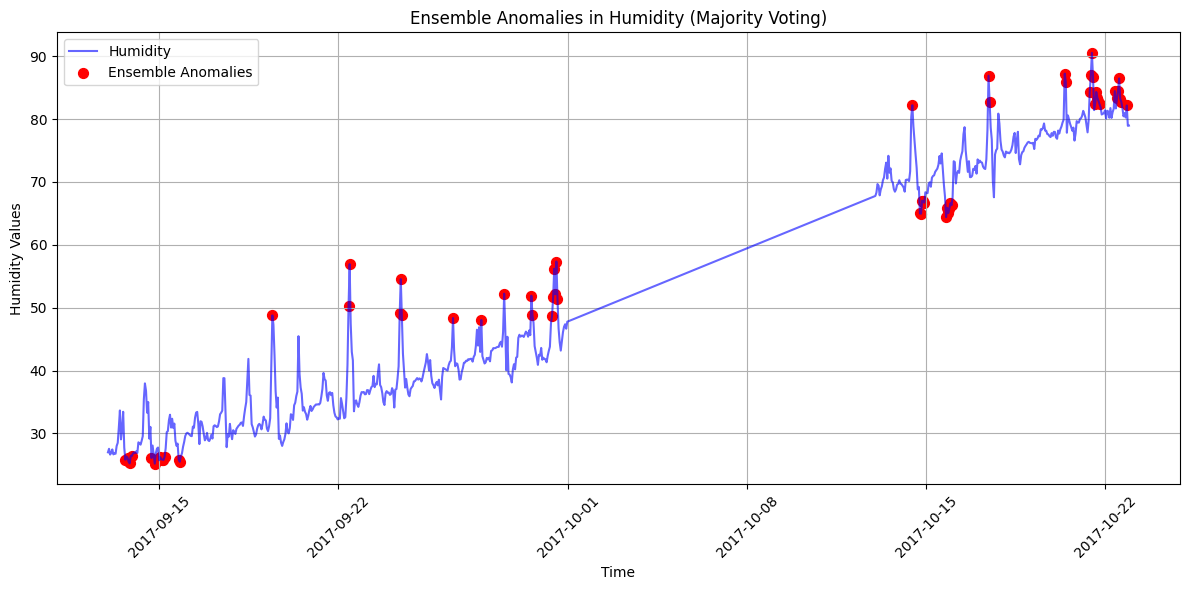

Ensemble detected 64 anomalies

Processing PumpPres...


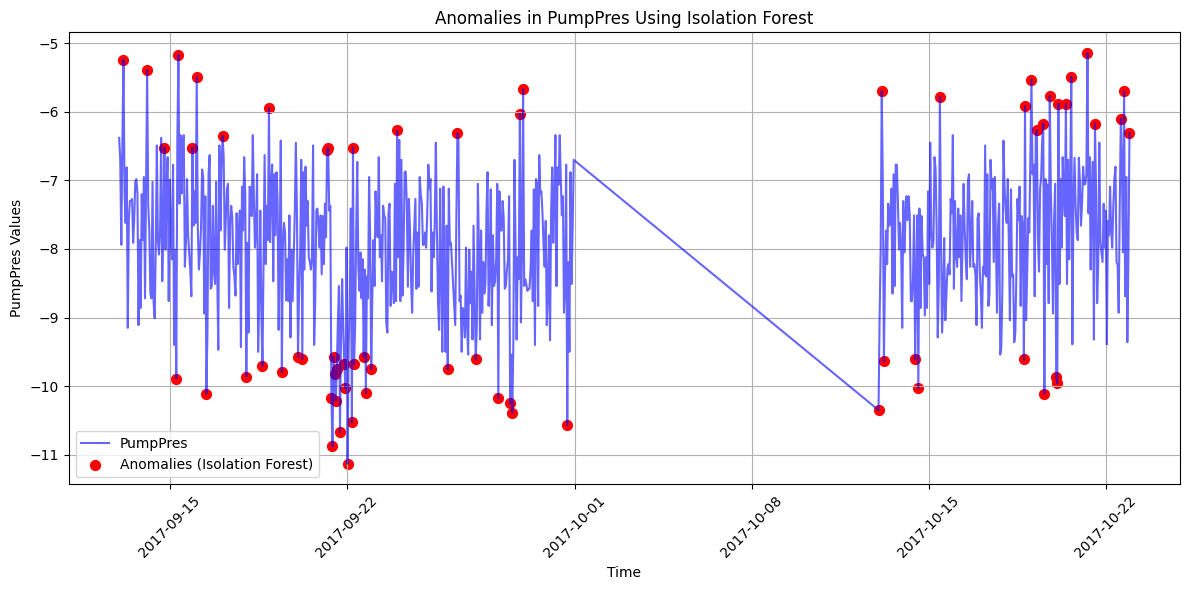

Isolation Forest: 66 anomalies detected


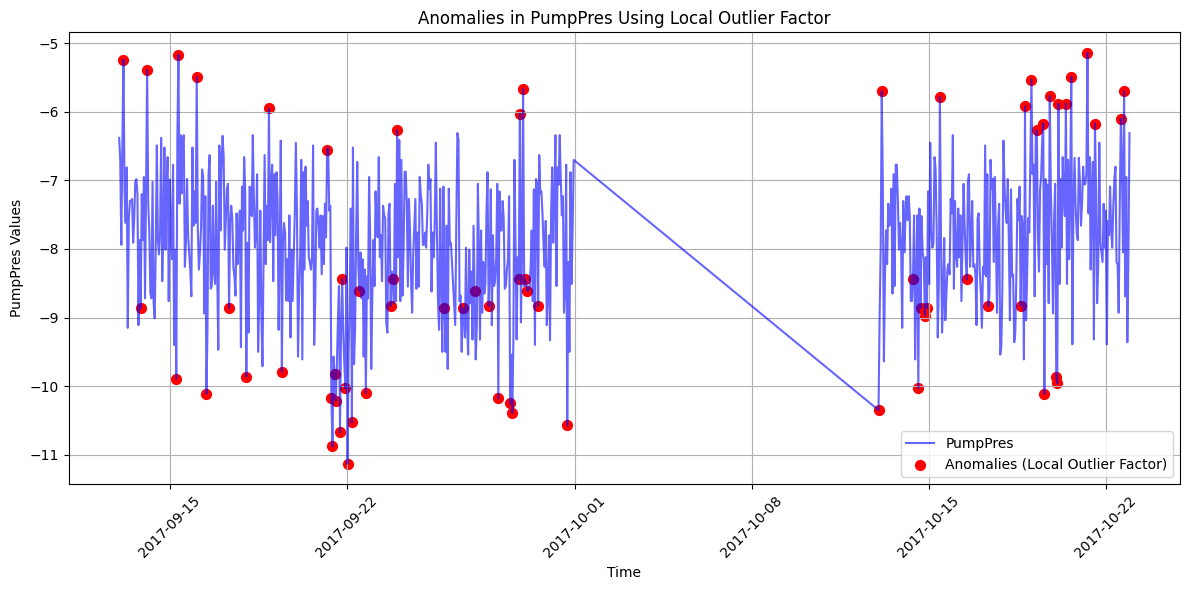

Local Outlier Factor: 66 anomalies detected


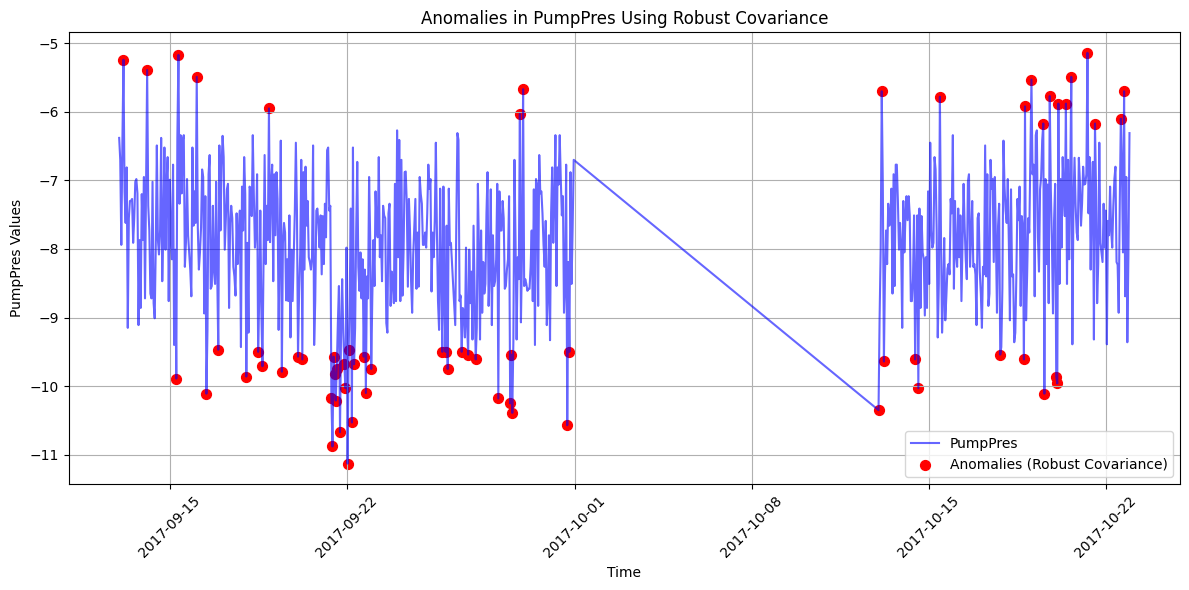

Robust Covariance: 66 anomalies detected


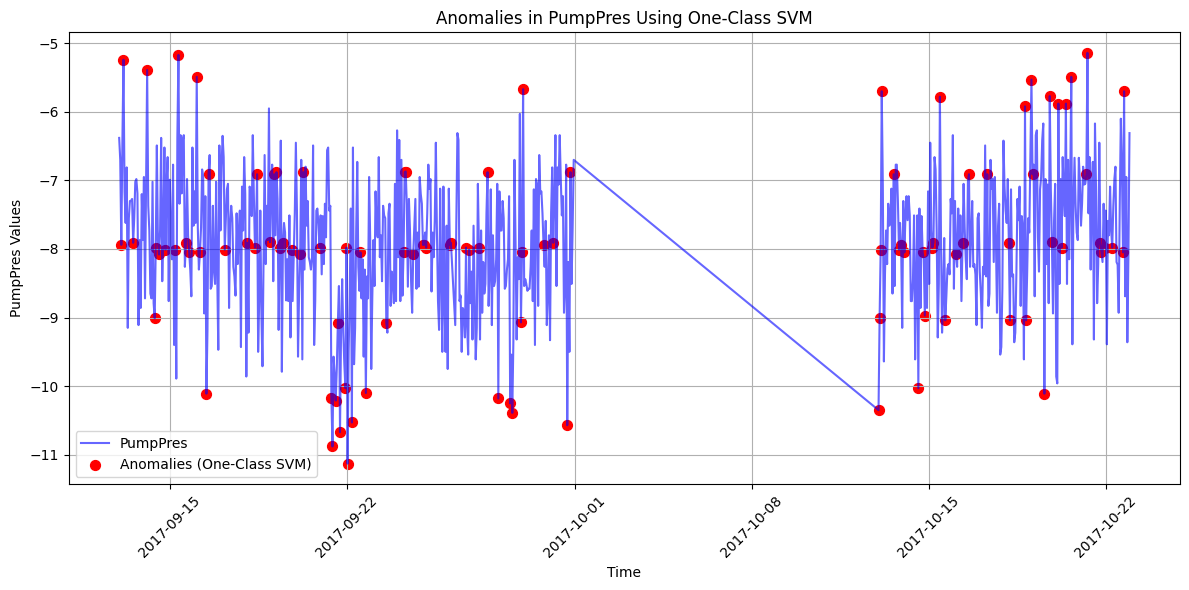

One-Class SVM: 104 anomalies detected


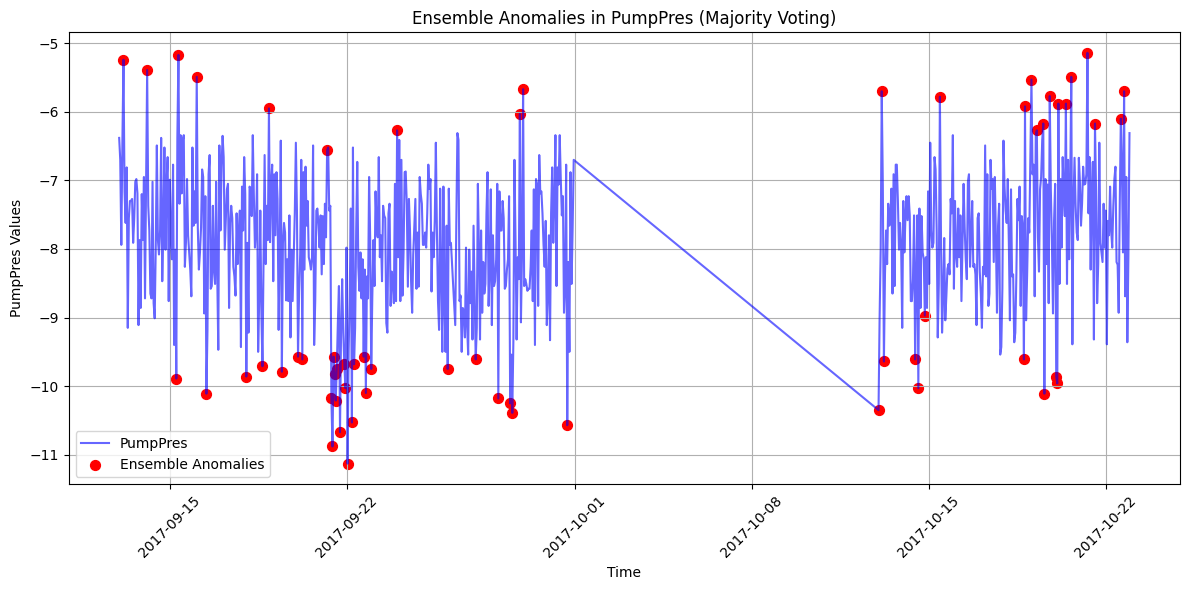

Ensemble detected 60 anomalies

Processing GaugePres...


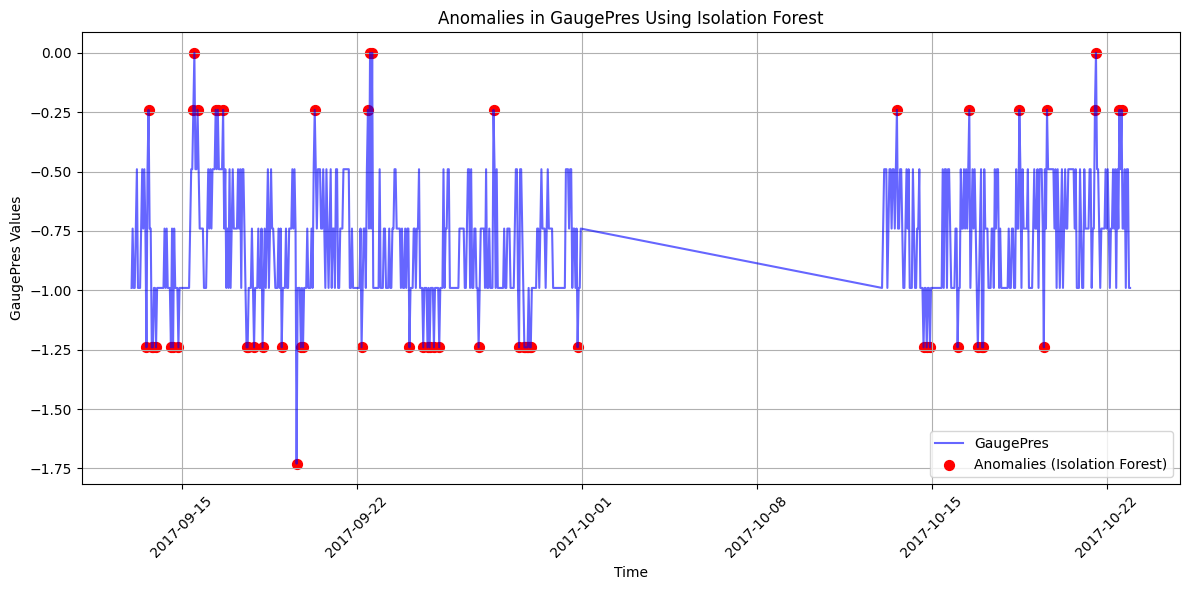

Isolation Forest: 59 anomalies detected


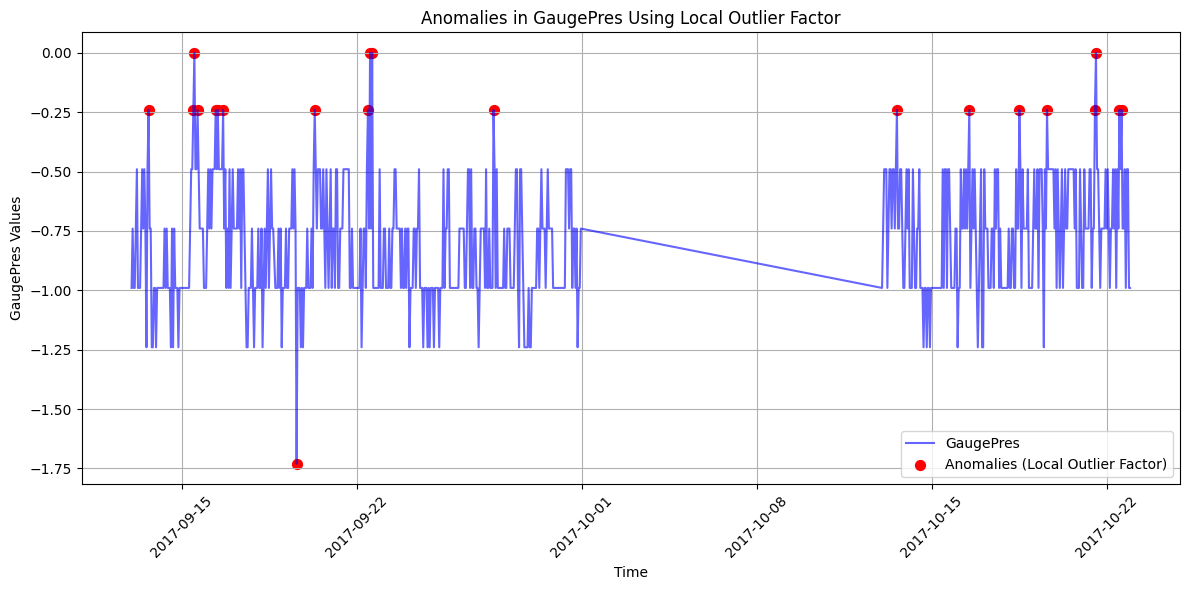

Local Outlier Factor: 21 anomalies detected


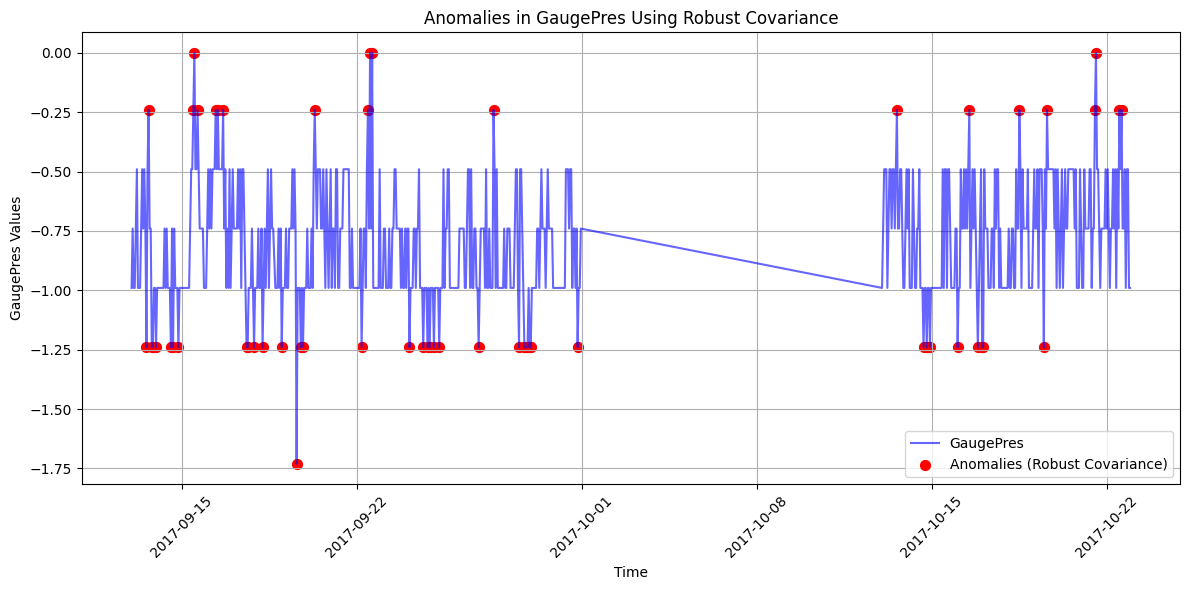

Robust Covariance: 59 anomalies detected


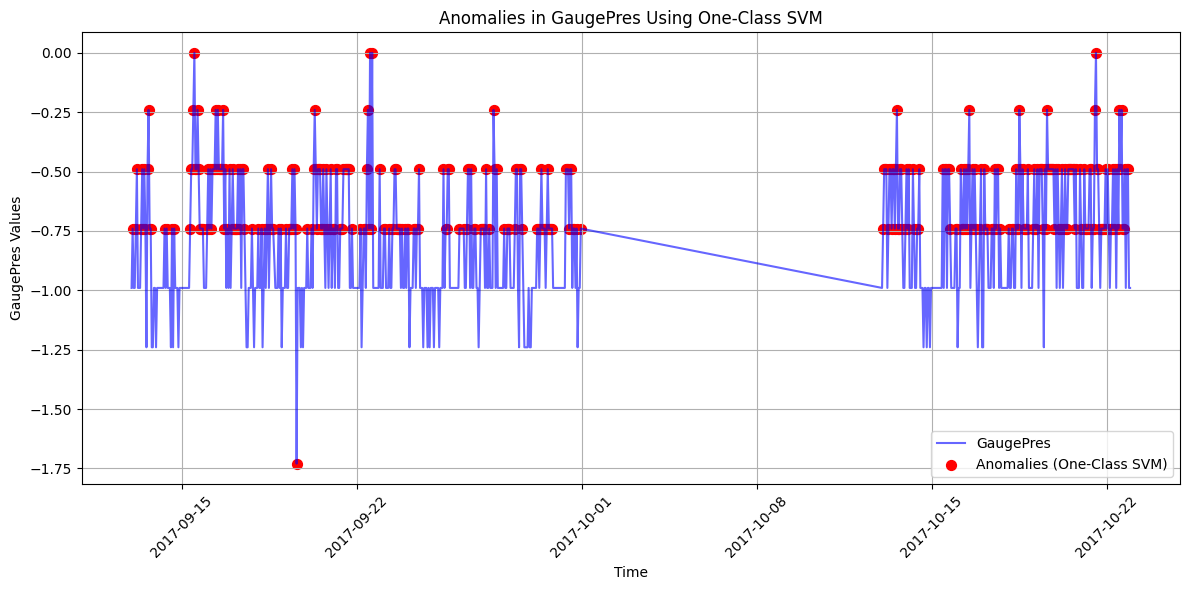

One-Class SVM: 349 anomalies detected


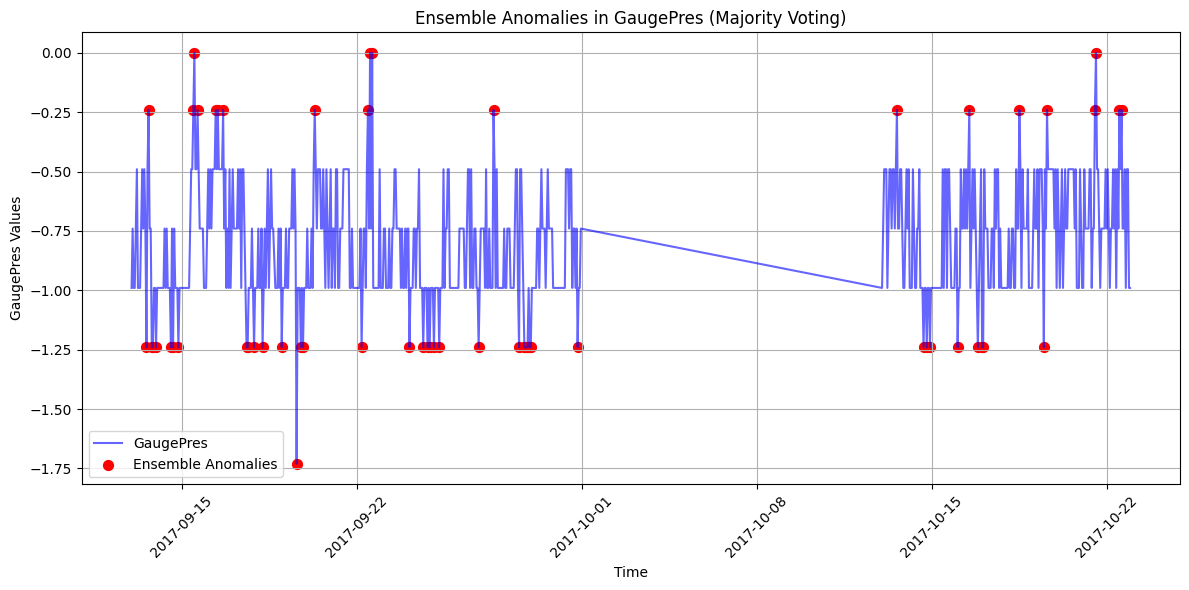

Ensemble detected 59 anomalies

Processing BaroPres...


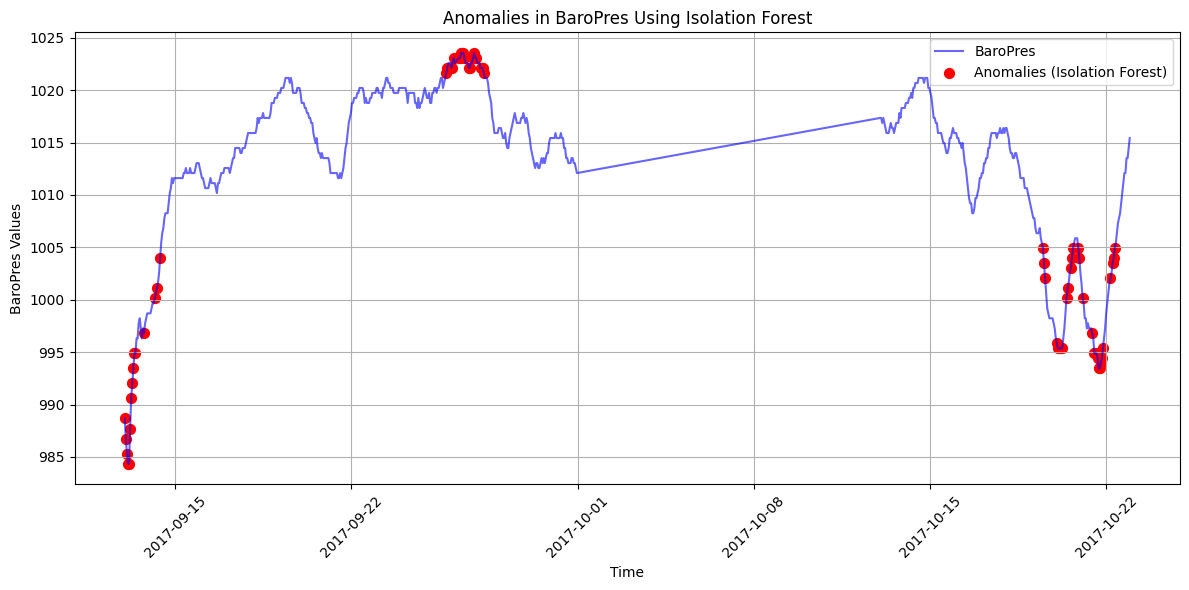

Isolation Forest: 66 anomalies detected


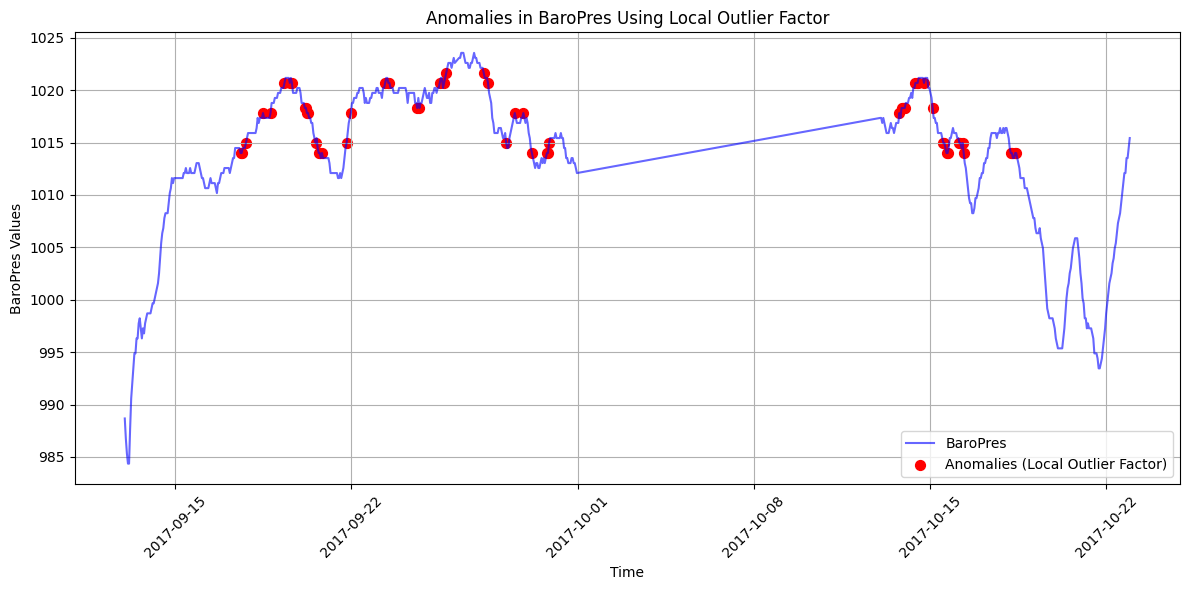

Local Outlier Factor: 57 anomalies detected


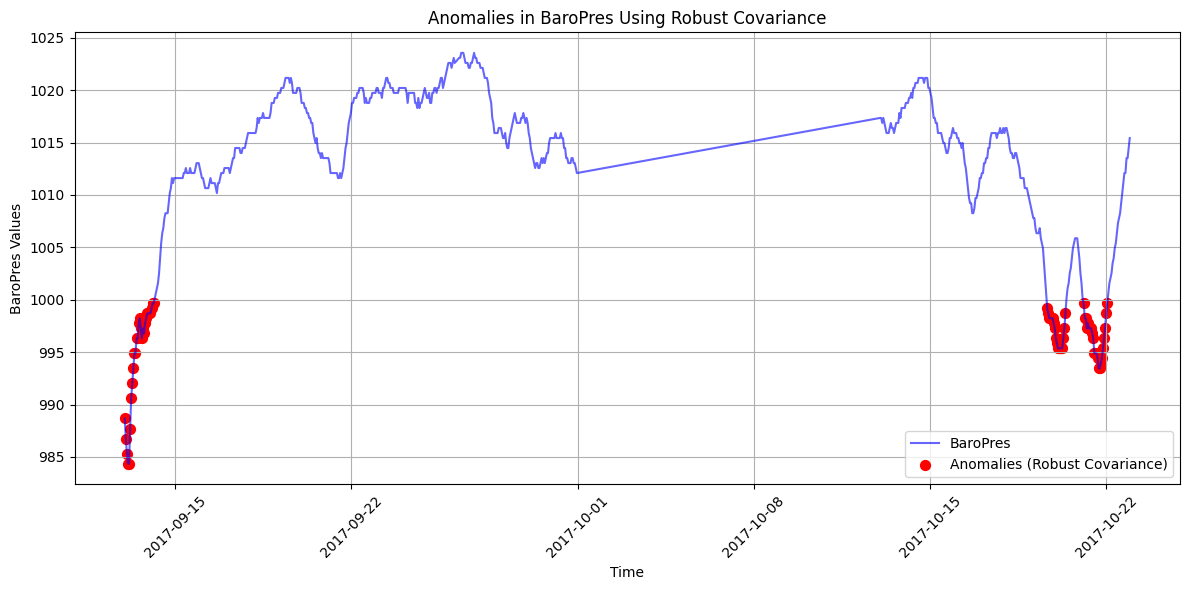

Robust Covariance: 69 anomalies detected


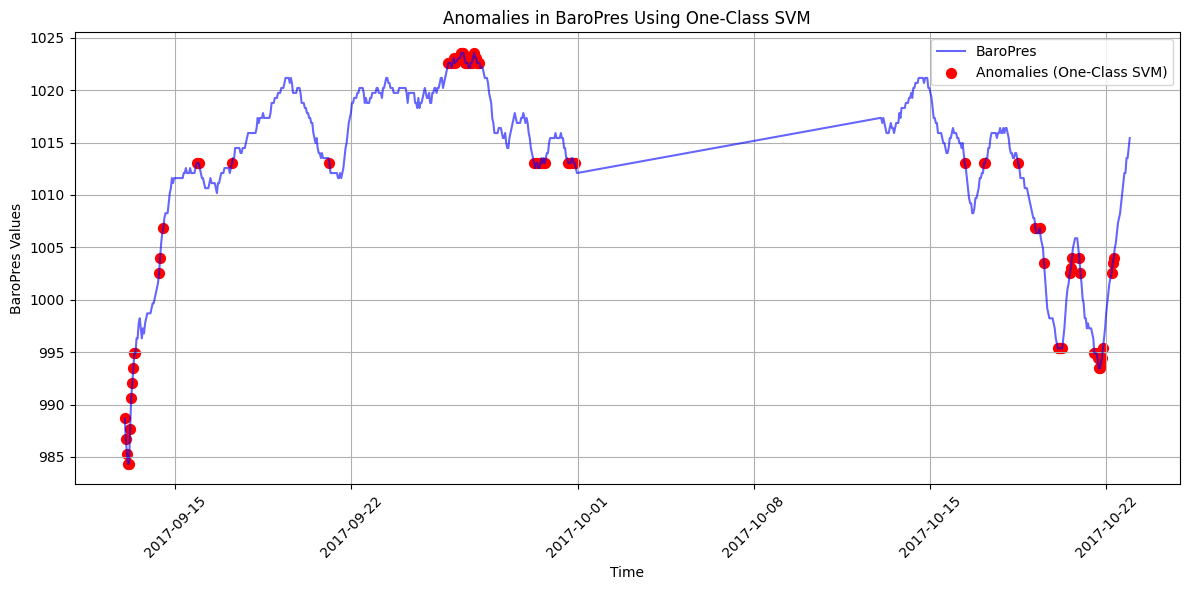

One-Class SVM: 83 anomalies detected


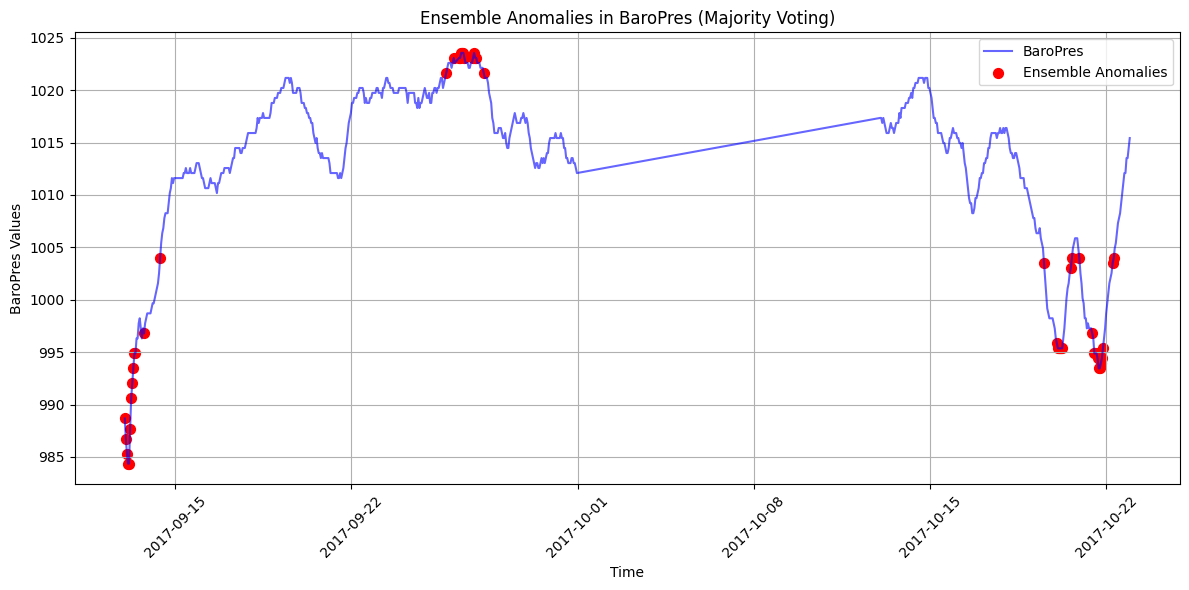

Ensemble detected 48 anomalies


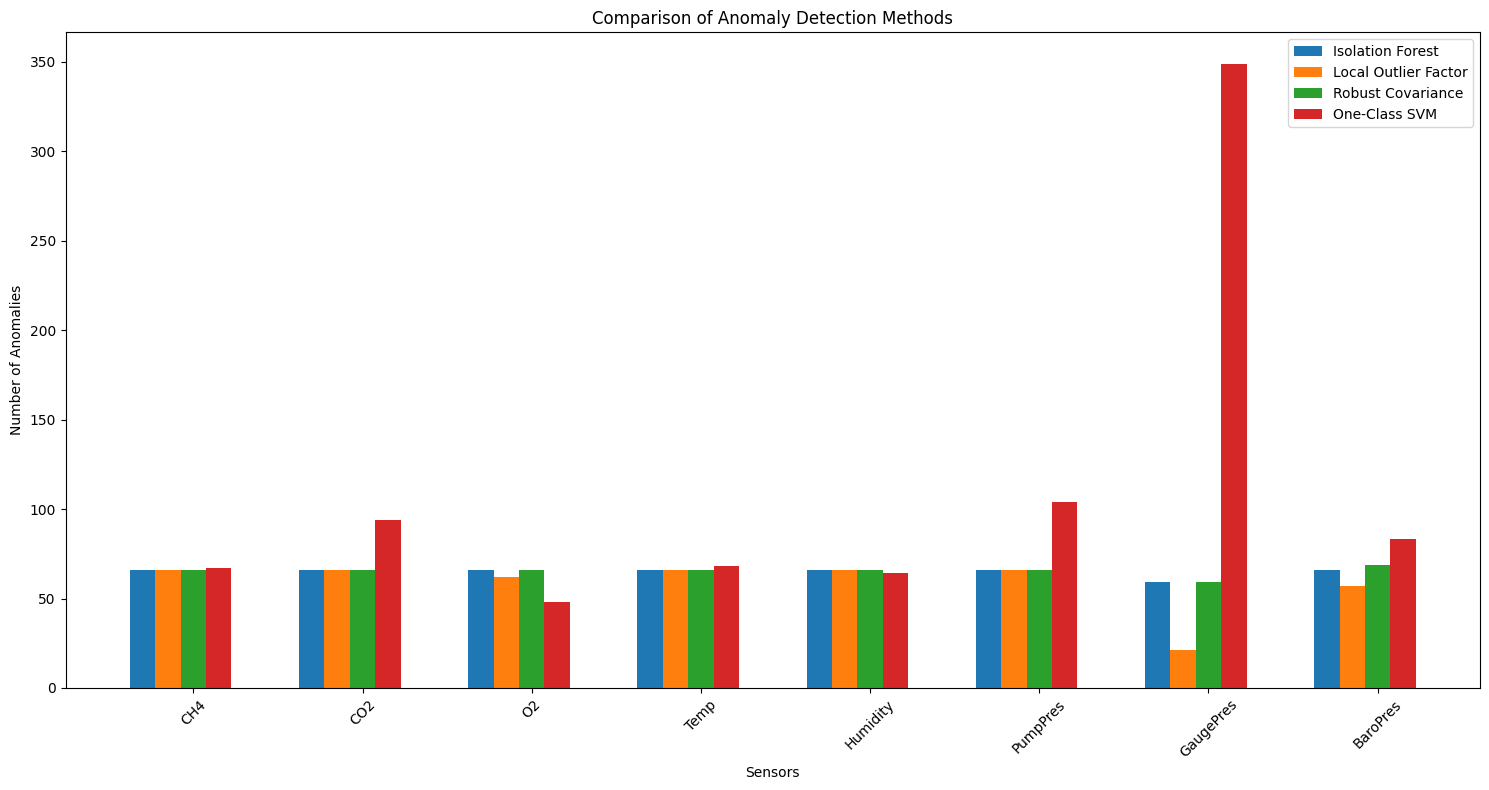


Overall Summary:

CH4:
Individual model detections:
  Isolation Forest: 66 anomalies
  Local Outlier Factor: 66 anomalies
  Robust Covariance: 66 anomalies
  One-Class SVM: 67 anomalies
Ensemble consensus: 54 anomalies

CO2:
Individual model detections:
  Isolation Forest: 66 anomalies
  Local Outlier Factor: 66 anomalies
  Robust Covariance: 66 anomalies
  One-Class SVM: 94 anomalies
Ensemble consensus: 61 anomalies

O2:
Individual model detections:
  Isolation Forest: 66 anomalies
  Local Outlier Factor: 62 anomalies
  Robust Covariance: 66 anomalies
  One-Class SVM: 48 anomalies
Ensemble consensus: 62 anomalies

Temp:
Individual model detections:
  Isolation Forest: 66 anomalies
  Local Outlier Factor: 66 anomalies
  Robust Covariance: 66 anomalies
  One-Class SVM: 68 anomalies
Ensemble consensus: 56 anomalies

Humidity:
Individual model detections:
  Isolation Forest: 66 anomalies
  Local Outlier Factor: 66 anomalies
  Robust Covariance: 66 anomalies
  One-Class SVM: 64 anomalies


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.covariance import EllipticEnvelope
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler

def ensemble_anomaly_detection(data, sensor_columns, contamination=0.1):
    # Initialize models
    models = {
        'Isolation Forest': IsolationForest(contamination=contamination, random_state=42),
        'Local Outlier Factor': LocalOutlierFactor(contamination=contamination, n_neighbors=20),
        'Robust Covariance': EllipticEnvelope(contamination=contamination, random_state=42),
        'One-Class SVM': OneClassSVM(nu=contamination, kernel='rbf')
    }

    scaler = StandardScaler()
    results = {}

    for sensor in sensor_columns:
        print(f"\nProcessing {sensor}...")

        # Prepare data
        X = data[sensor].values.reshape(-1, 1)
        X_scaled = scaler.fit_transform(X)

        # Store predictions from each model
        predictions = {}
        anomaly_counts = {}

        # Run each model
        for model_name, model in models.items():
            try:
                # Fit and predict
                if isinstance(model, LocalOutlierFactor):
                    pred = model.fit_predict(X_scaled)
                else:
                    pred = model.fit(X_scaled).predict(X_scaled)

                # Convert predictions to anomaly indicators (-1 for anomalies)
                predictions[model_name] = pred
                anomaly_counts[model_name] = np.sum(pred == -1)

                # Create individual model plot
                anomalies = np.where(pred == -1, data[sensor], np.nan)

                plt.figure(figsize=(12, 6))
                plt.plot(data.index, data[sensor], label=sensor, color='blue', alpha=0.6)
                plt.scatter(data.index, anomalies, color='red', label=f'Anomalies ({model_name})', s=50, marker='o')
                plt.title(f'Anomalies in {sensor} Using {model_name}')
                plt.xlabel('Time')
                plt.ylabel(f'{sensor} Values')
                plt.legend()
                plt.grid(True)
                plt.xticks(rotation=45)
                plt.tight_layout()
                plt.show()

                print(f"{model_name}: {anomaly_counts[model_name]} anomalies detected")

            except Exception as e:
                print(f"Error with {model_name} for {sensor}: {str(e)}")
                continue

        # Ensemble voting
        ensemble_predictions = np.zeros(len(X))
        for pred in predictions.values():
            ensemble_predictions += (pred == -1)

        # Consider a point anomalous if majority
        threshold = len(models) / 2
        ensemble_anomalies = np.where(ensemble_predictions >= threshold, data[sensor], np.nan)

        # Plot ensemble results
        plt.figure(figsize=(12, 6))
        plt.plot(data.index, data[sensor], label=sensor, color='blue', alpha=0.6)
        plt.scatter(data.index, ensemble_anomalies, color='red', label='Ensemble Anomalies', s=50, marker='o')
        plt.title(f'Ensemble Anomalies in {sensor} (Majority Voting)')
        plt.xlabel('Time')
        plt.ylabel(f'{sensor} Values')
        plt.legend()
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        # Store results
        results[sensor] = {
            'individual_predictions': predictions,
            'ensemble_anomalies': ensemble_anomalies,
            'anomaly_counts': anomaly_counts,
            'ensemble_anomaly_count': np.sum(ensemble_predictions >= threshold)
        }

        print(f"Ensemble detected {results[sensor]['ensemble_anomaly_count']} anomalies")

    # Create summary visualization
    plt.figure(figsize=(15, 8))
    sensor_names = list(results.keys())
    model_names = list(models.keys())
    x = np.arange(len(sensor_names))
    width = 0.15

    for i, model_name in enumerate(model_names):
        counts = [results[sensor]['anomaly_counts'].get(model_name, 0) for sensor in sensor_names]
        plt.bar(x + i * width, counts, width, label=model_name)

    plt.xlabel('Sensors')
    plt.ylabel('Number of Anomalies')
    plt.title('Comparison of Anomaly Detection Methods')
    plt.xticks(x + width * 2, sensor_names, rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

    return results

# Run the ensemble analysis
sensor_columns = ['CH4', 'CO2', 'O2', 'Temp', 'Humidity', 'PumpPres', 'GaugePres', 'BaroPres']
ensemble_results = ensemble_anomaly_detection(data, sensor_columns, contamination=0.1)

# Print overall summary
print("\nOverall Summary:")
for sensor in sensor_columns:
    print(f"\n{sensor}:")
    print("Individual model detections:")
    for model, count in ensemble_results[sensor]['anomaly_counts'].items():
        print(f"  {model}: {count} anomalies")
    print(f"Ensemble consensus: {ensemble_results[sensor]['ensemble_anomaly_count']} anomalies")


Processing CH4...


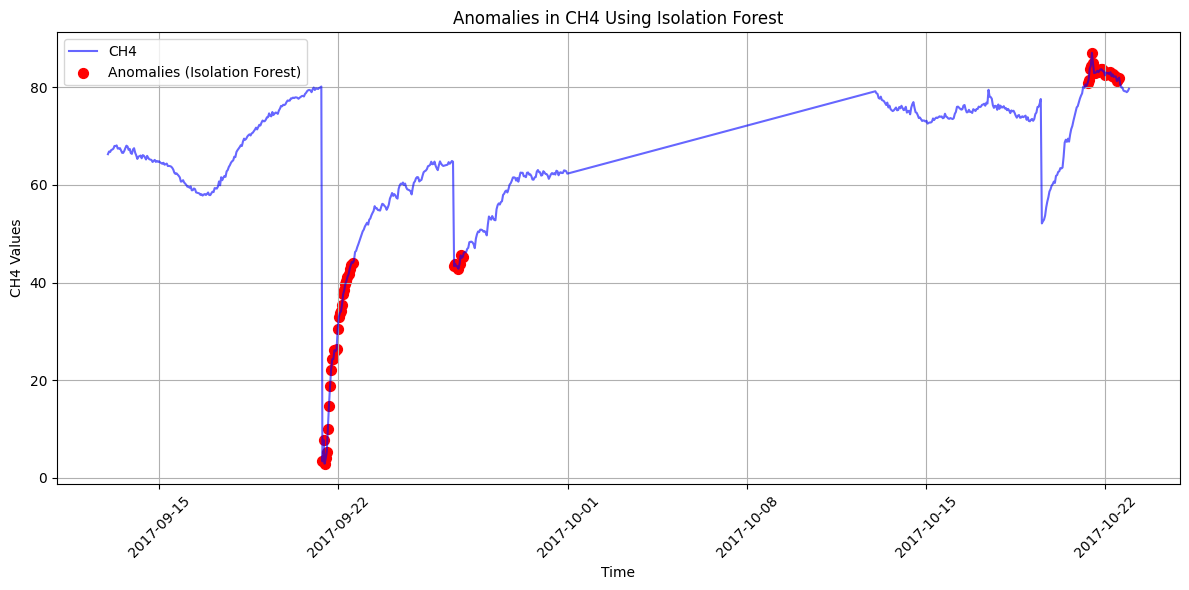

Isolation Forest: 66 anomalies detected


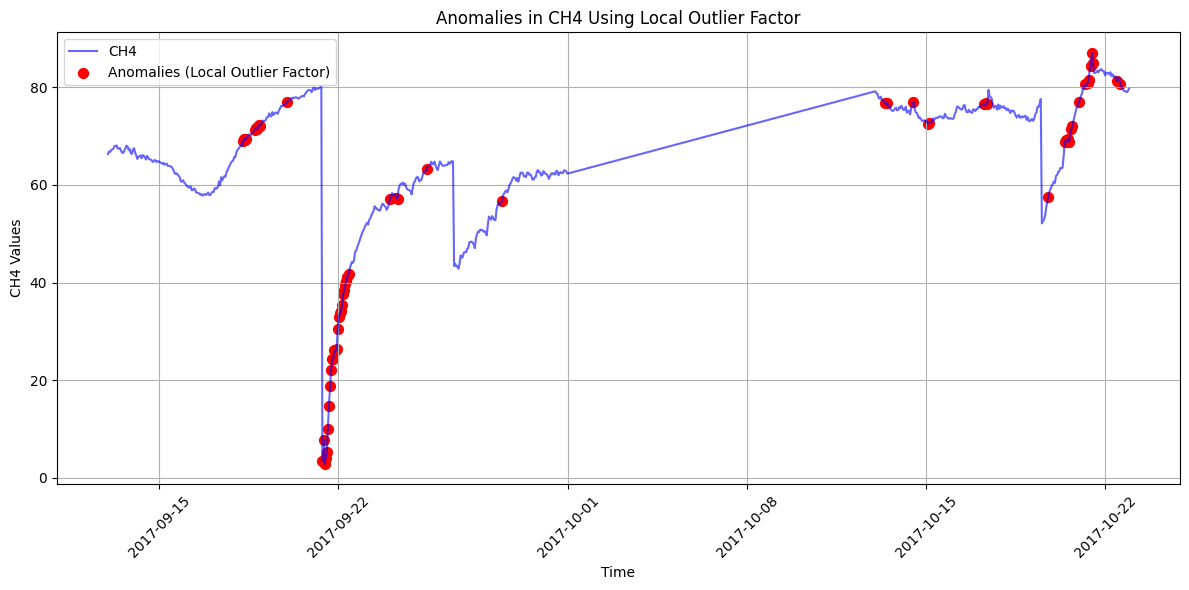

Local Outlier Factor: 66 anomalies detected


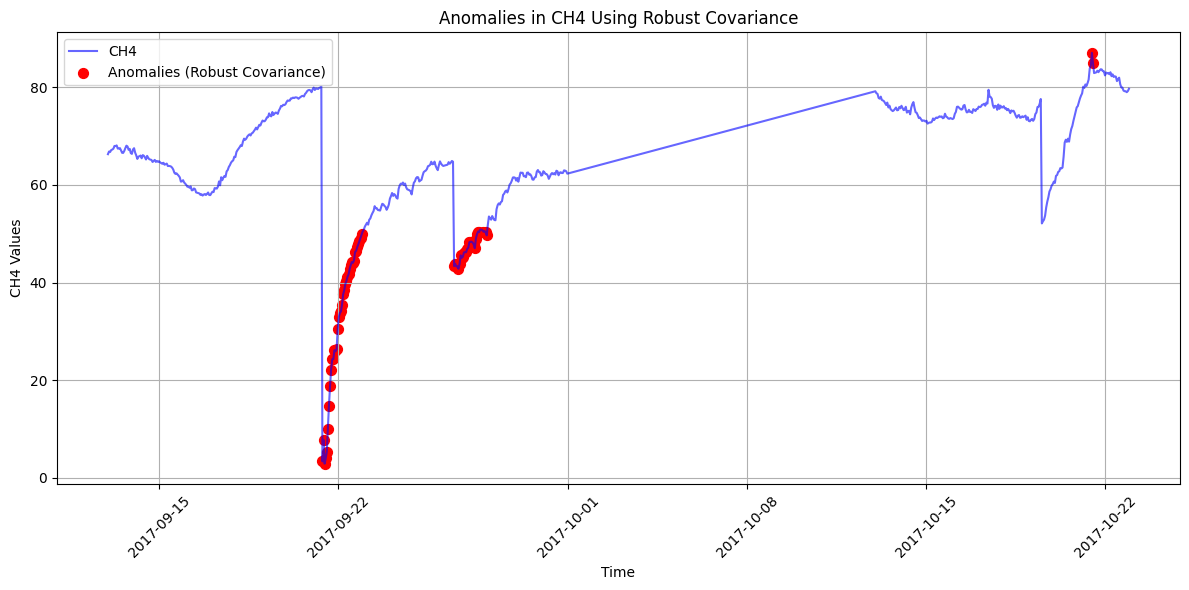

Robust Covariance: 66 anomalies detected


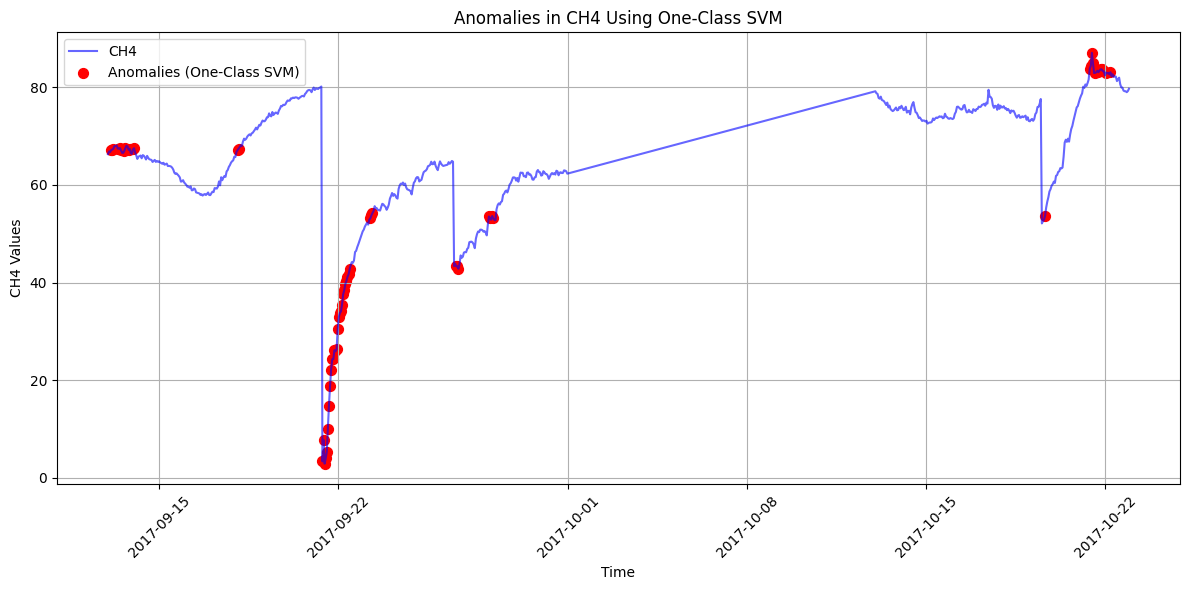

One-Class SVM: 67 anomalies detected


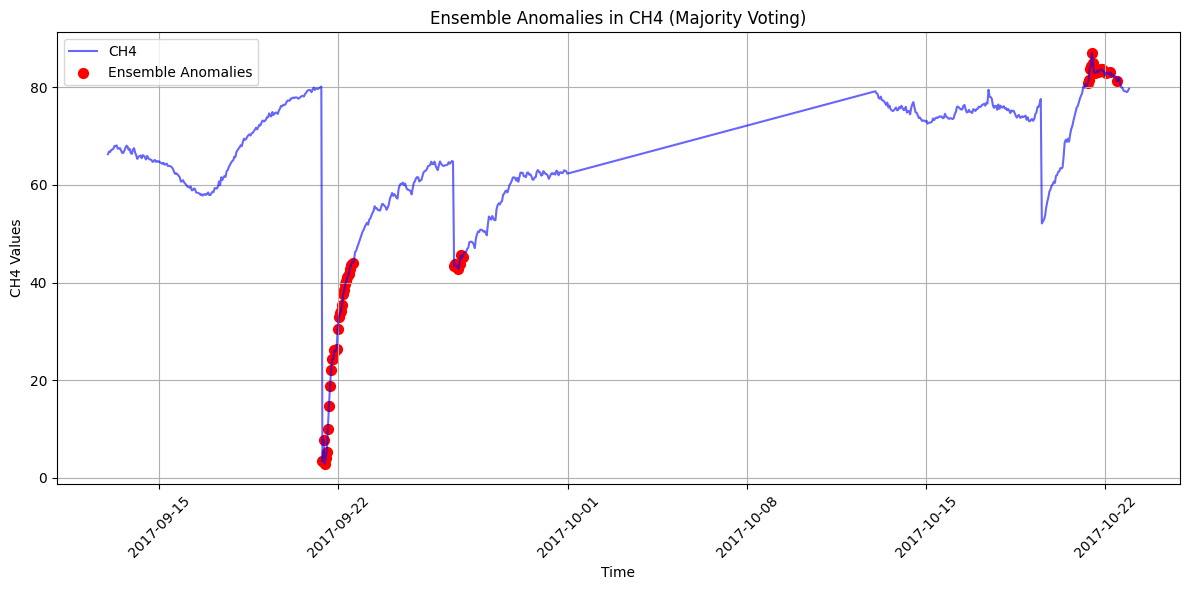

Ensemble detected 54 anomalies

Processing CO2...


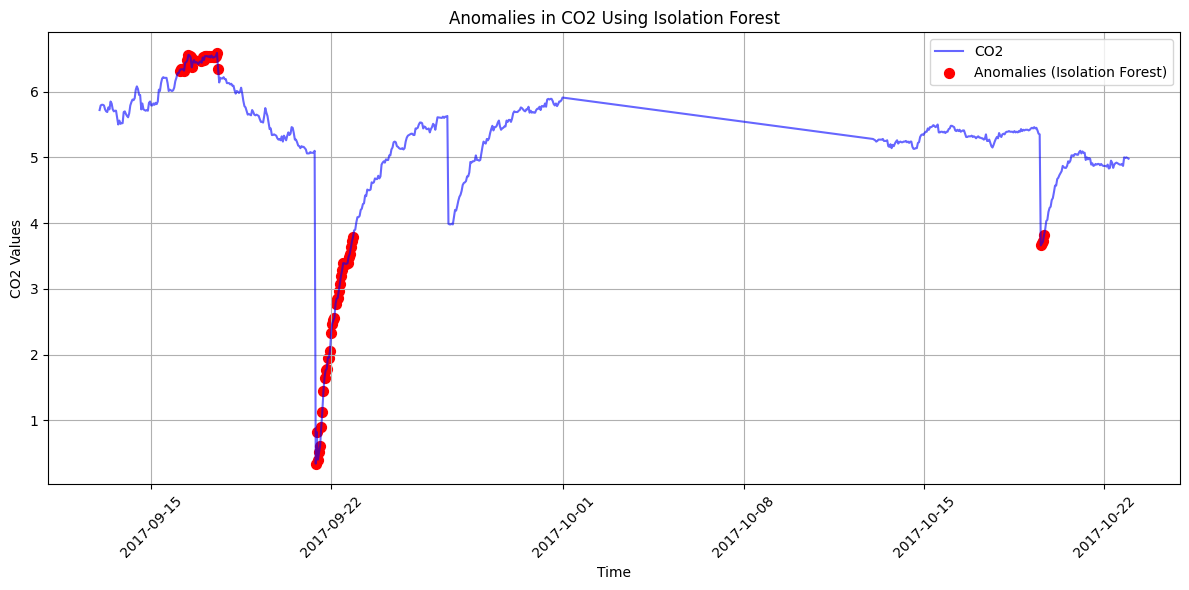

Isolation Forest: 66 anomalies detected


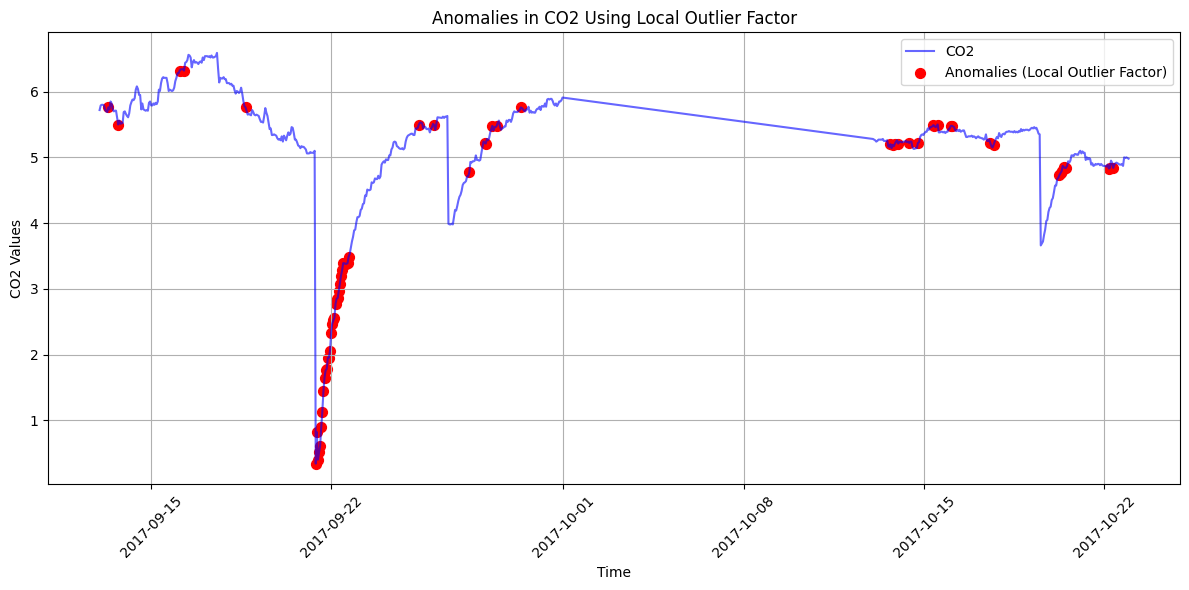

Local Outlier Factor: 66 anomalies detected


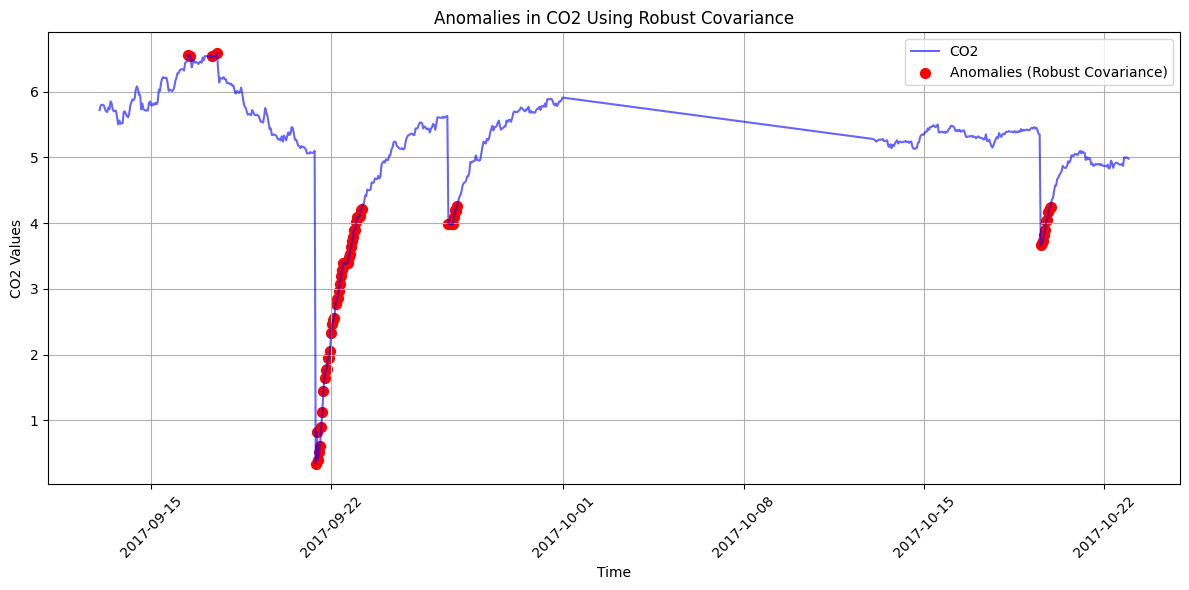

Robust Covariance: 66 anomalies detected


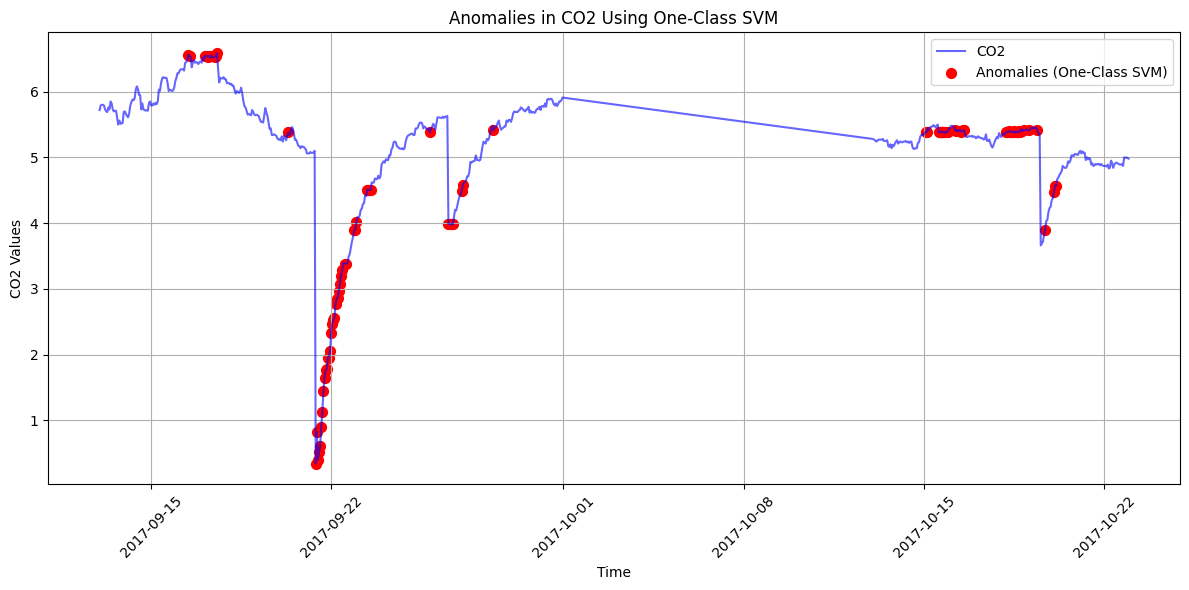

One-Class SVM: 94 anomalies detected


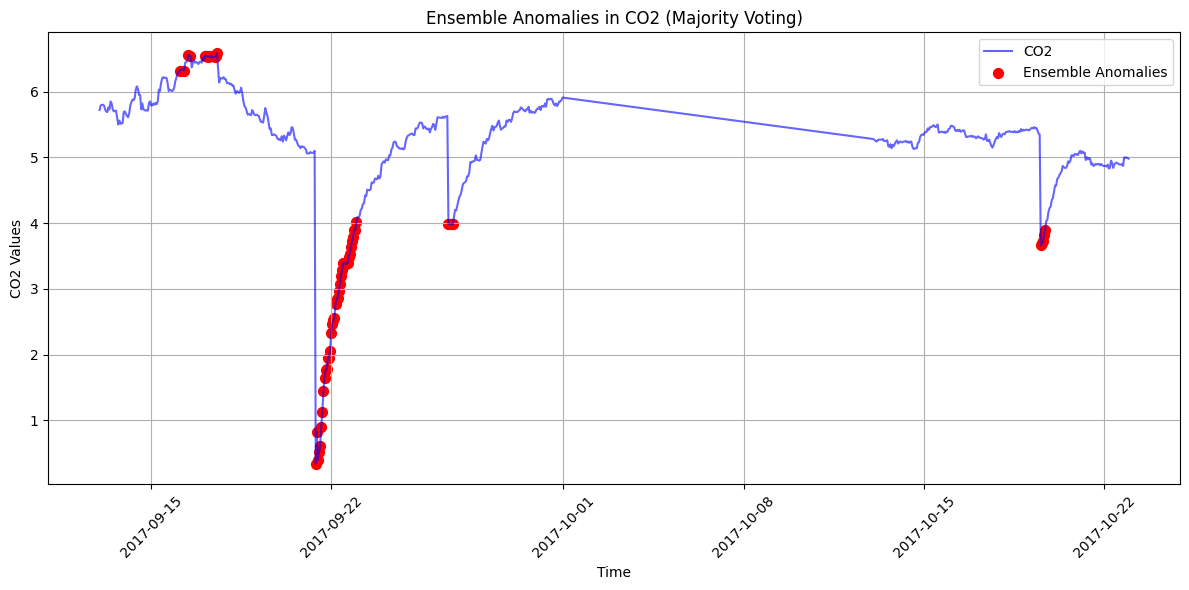

Ensemble detected 61 anomalies

Processing O2...


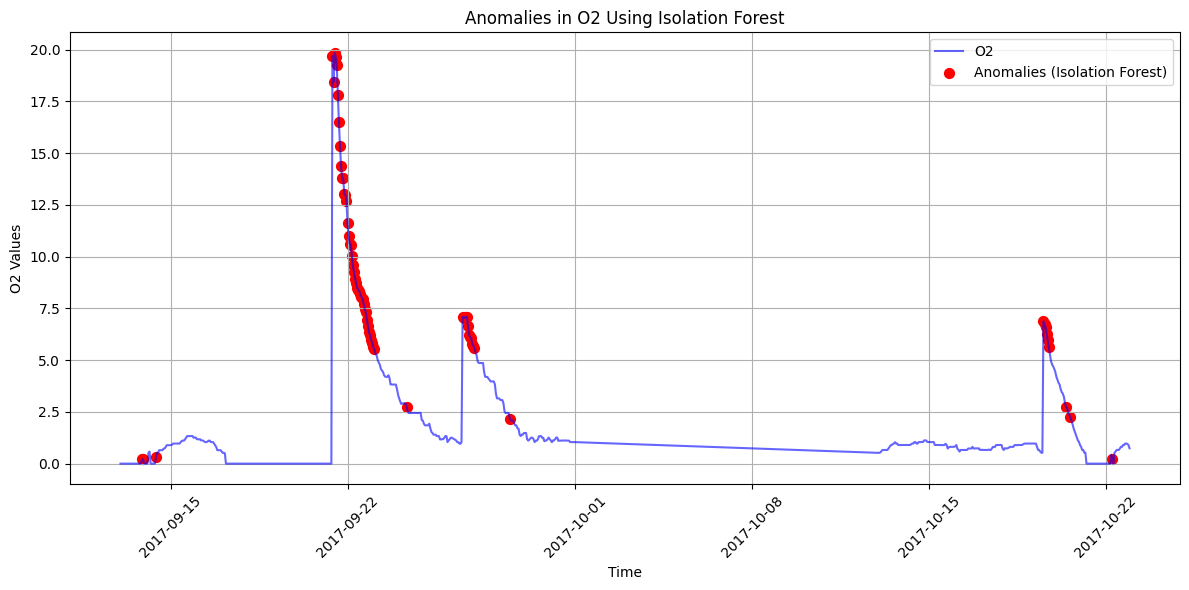

Isolation Forest: 66 anomalies detected


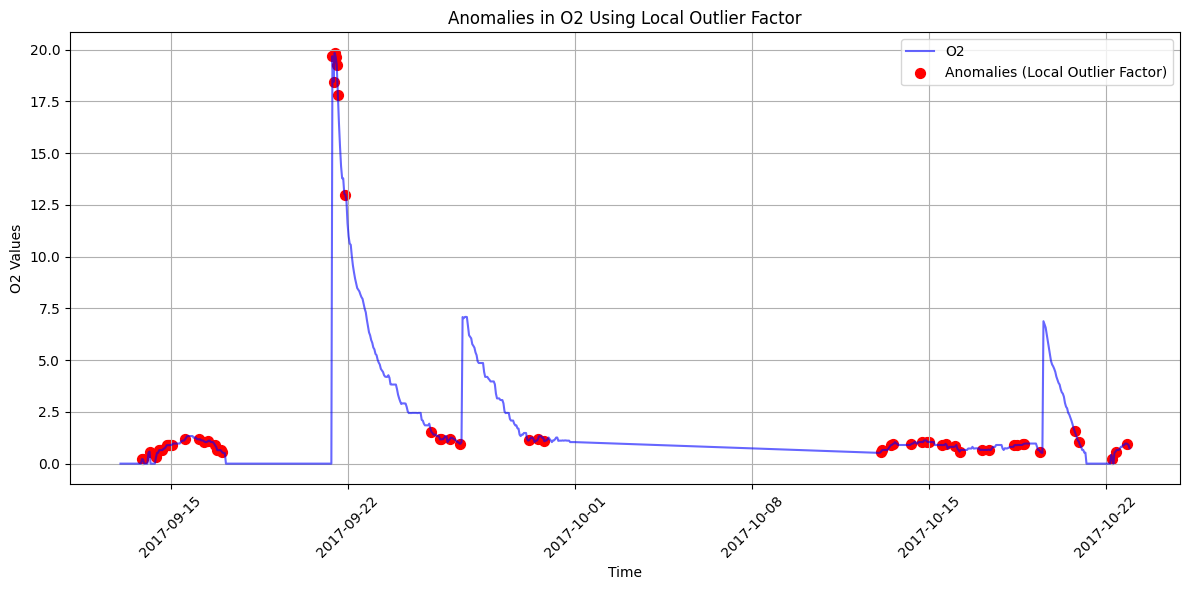

Local Outlier Factor: 62 anomalies detected


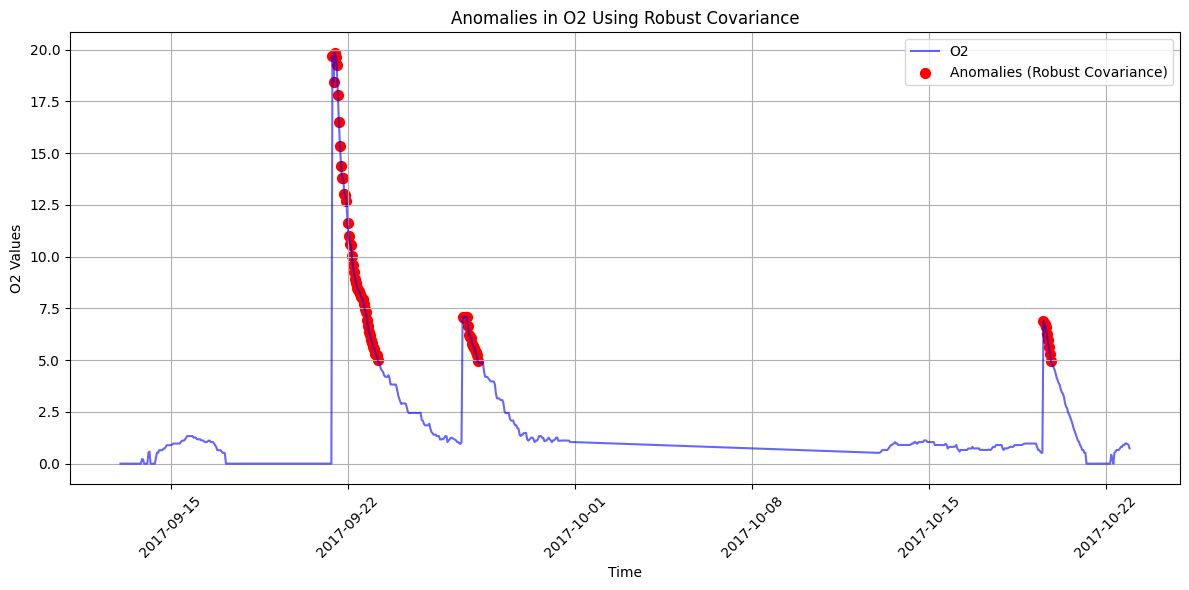

Robust Covariance: 66 anomalies detected


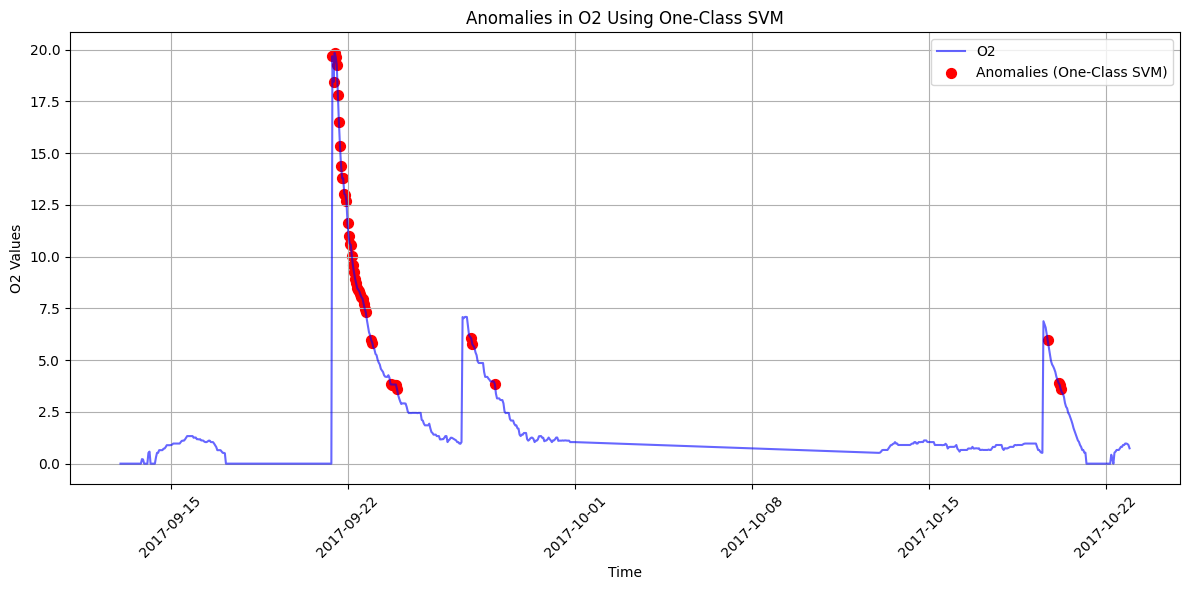

One-Class SVM: 48 anomalies detected


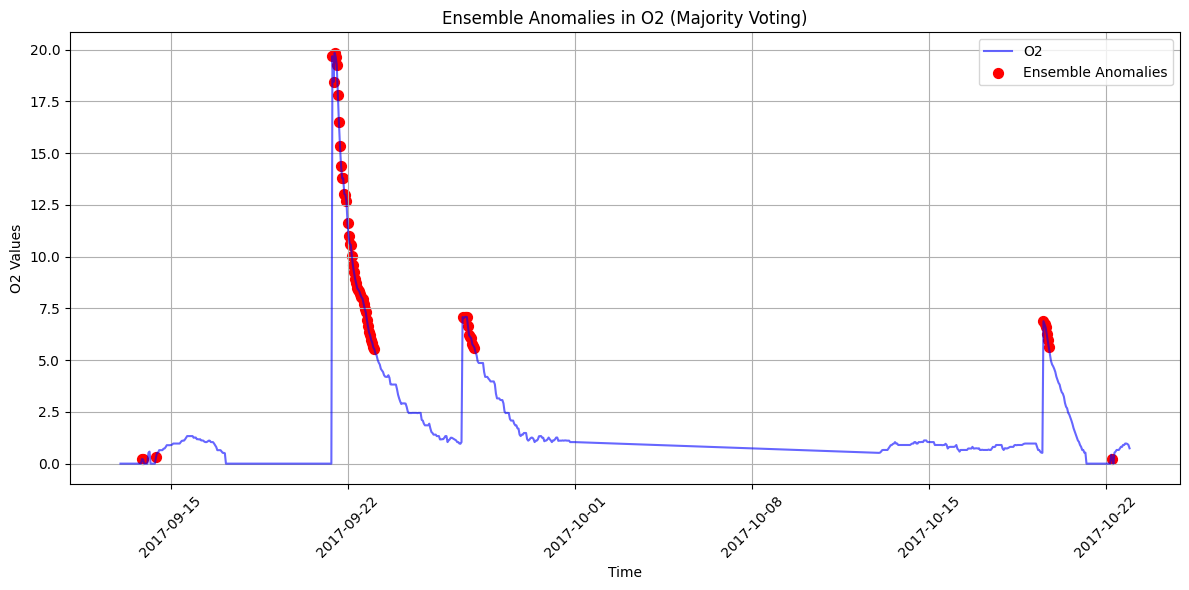

Ensemble detected 62 anomalies

Processing Temp...


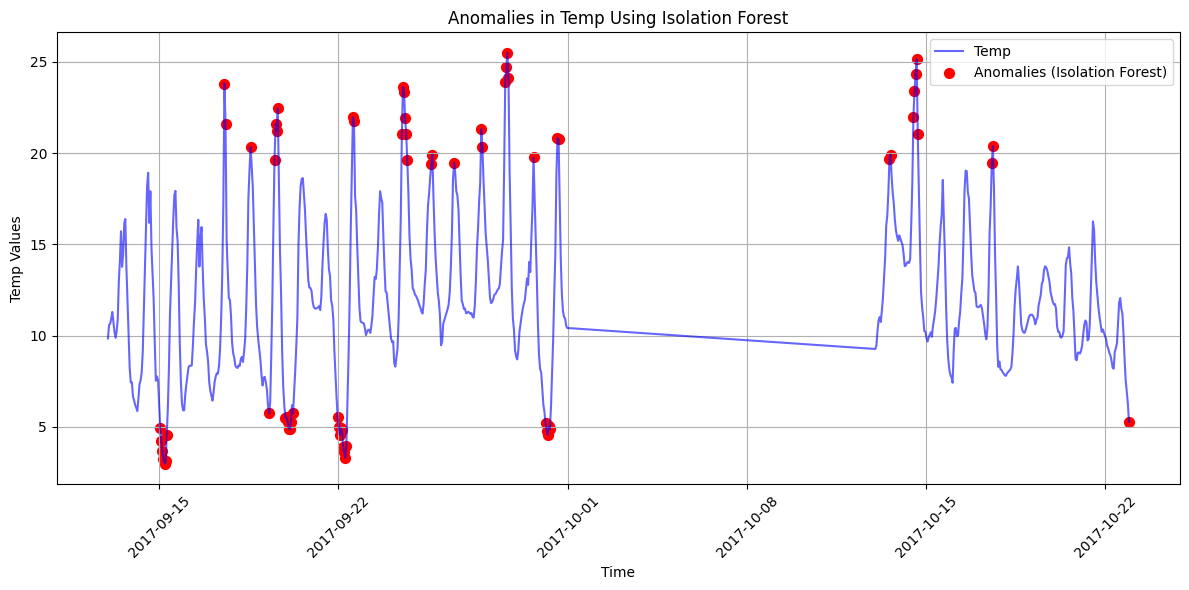

Isolation Forest: 66 anomalies detected


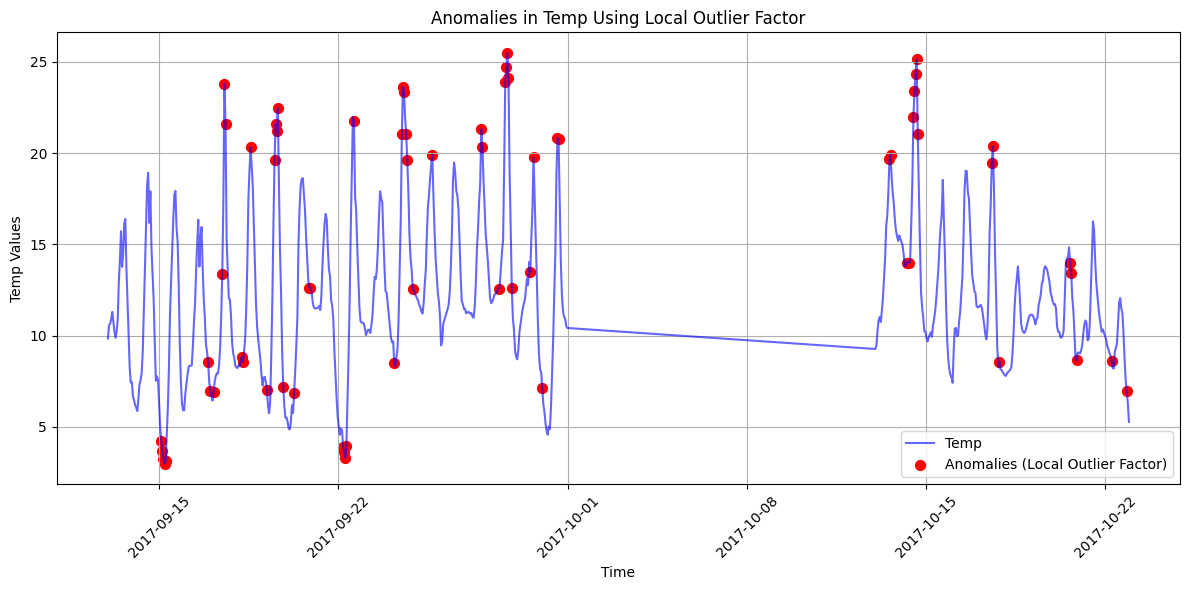

Local Outlier Factor: 66 anomalies detected


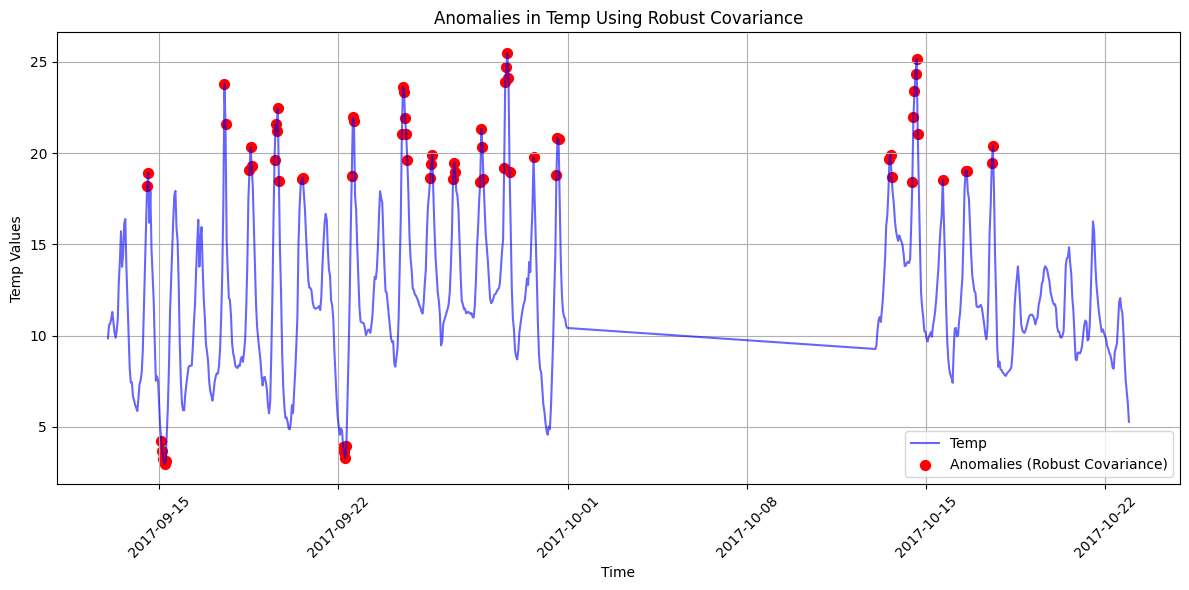

Robust Covariance: 66 anomalies detected


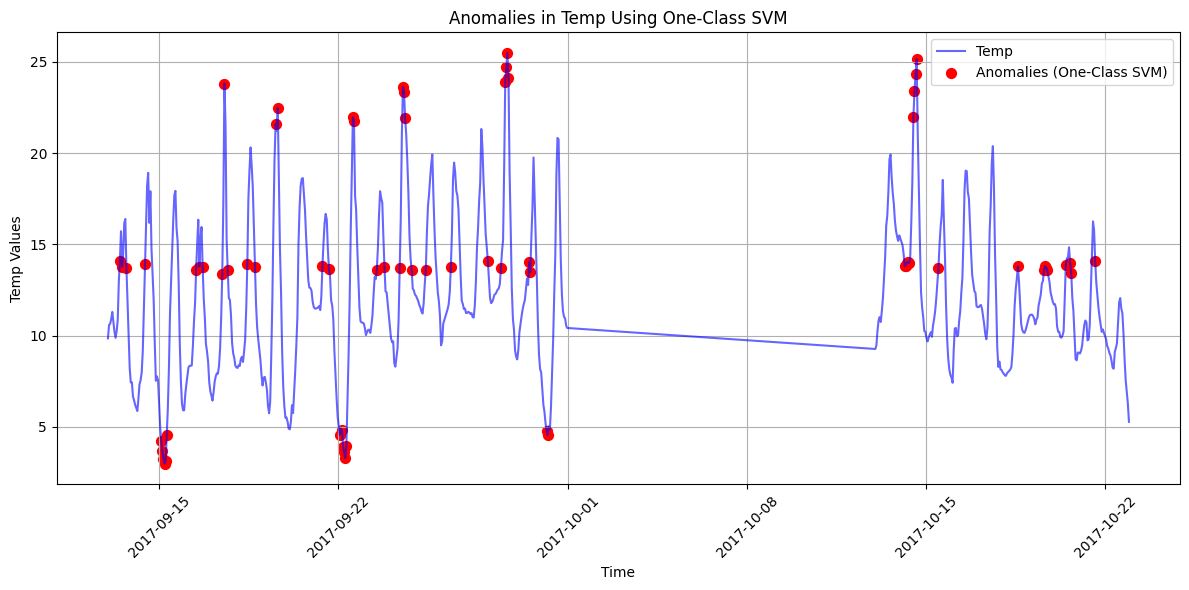

One-Class SVM: 68 anomalies detected


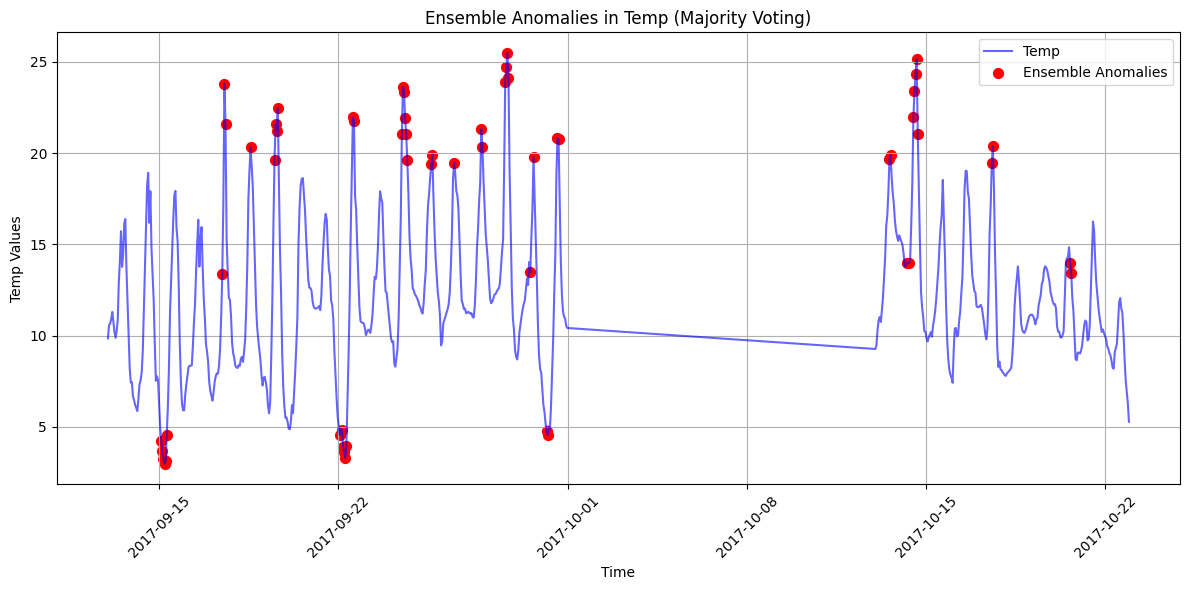

Ensemble detected 56 anomalies

Processing Humidity...


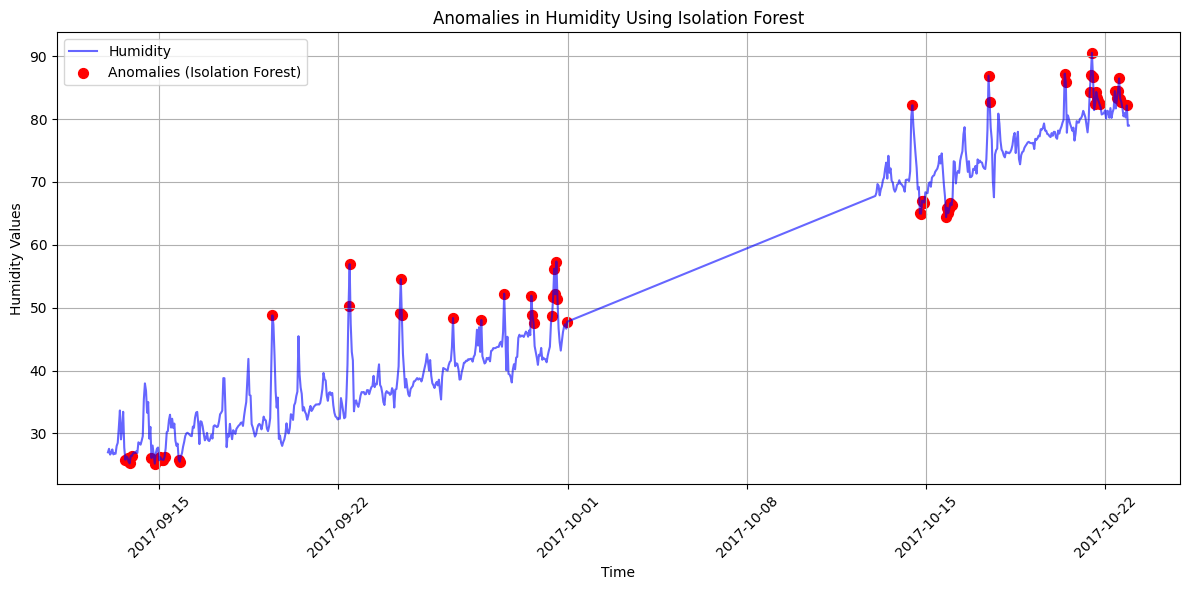

Isolation Forest: 66 anomalies detected


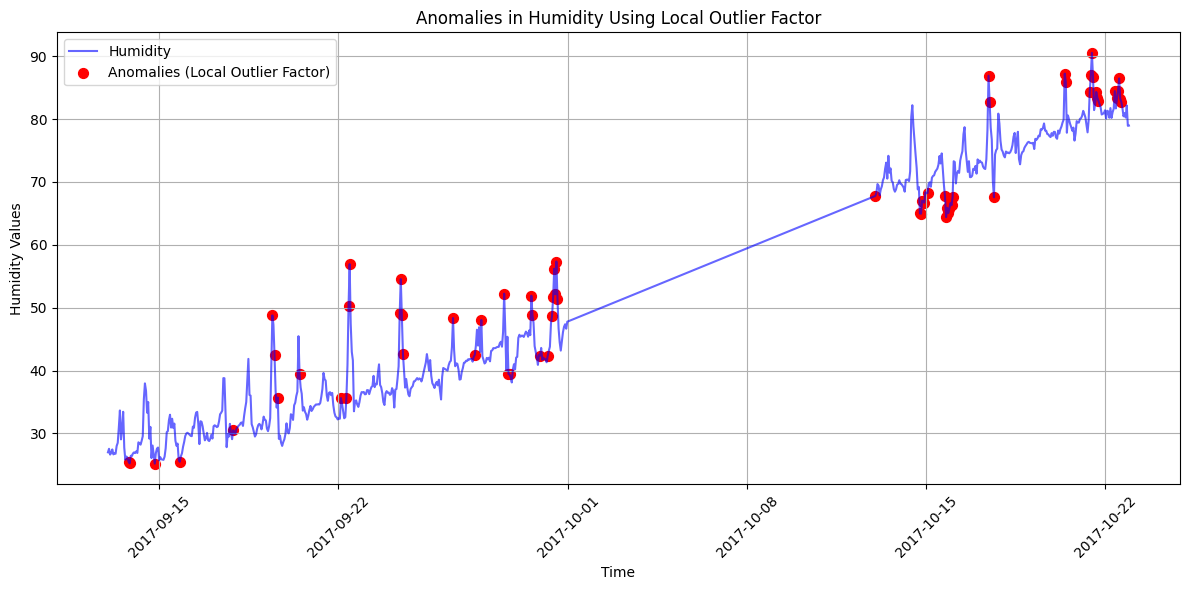

Local Outlier Factor: 66 anomalies detected


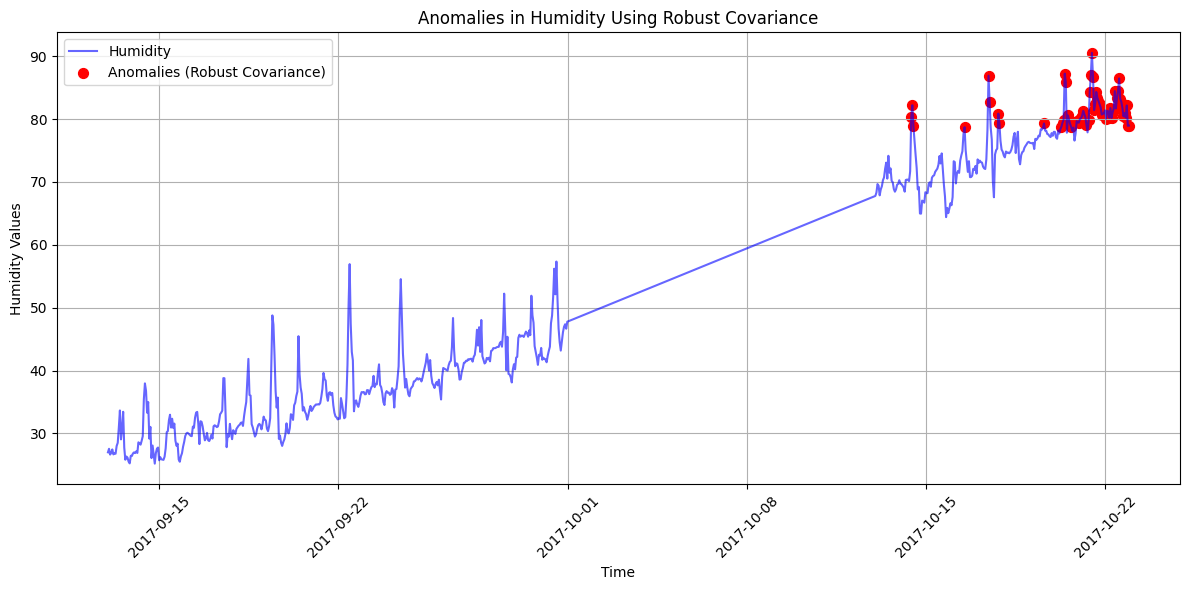

Robust Covariance: 66 anomalies detected


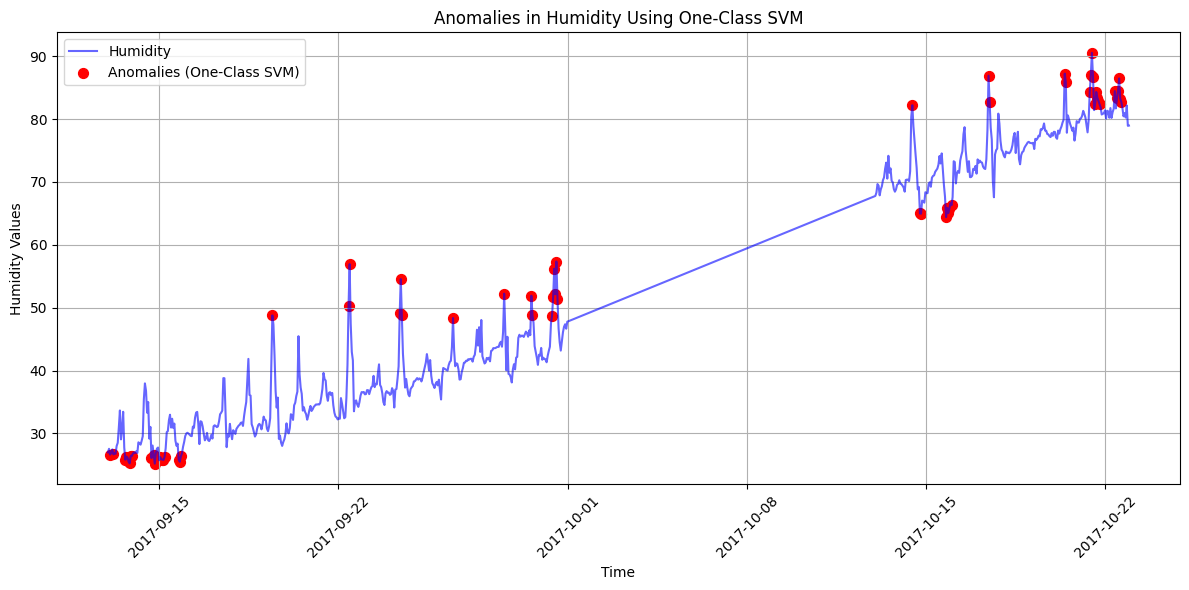

One-Class SVM: 64 anomalies detected


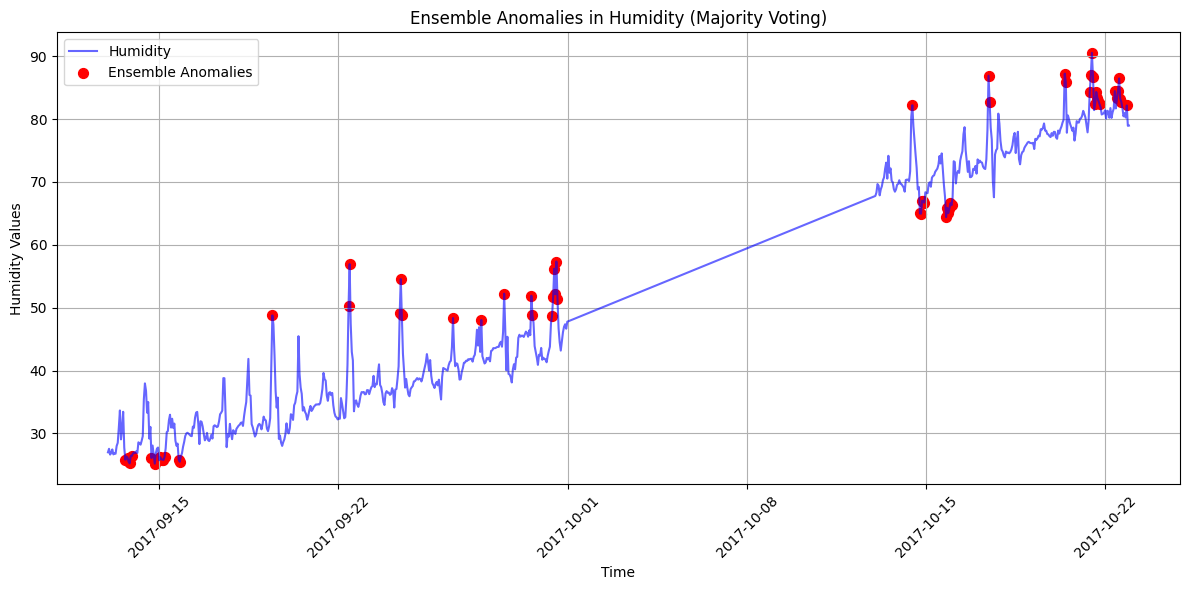

Ensemble detected 64 anomalies

Processing PumpPres...


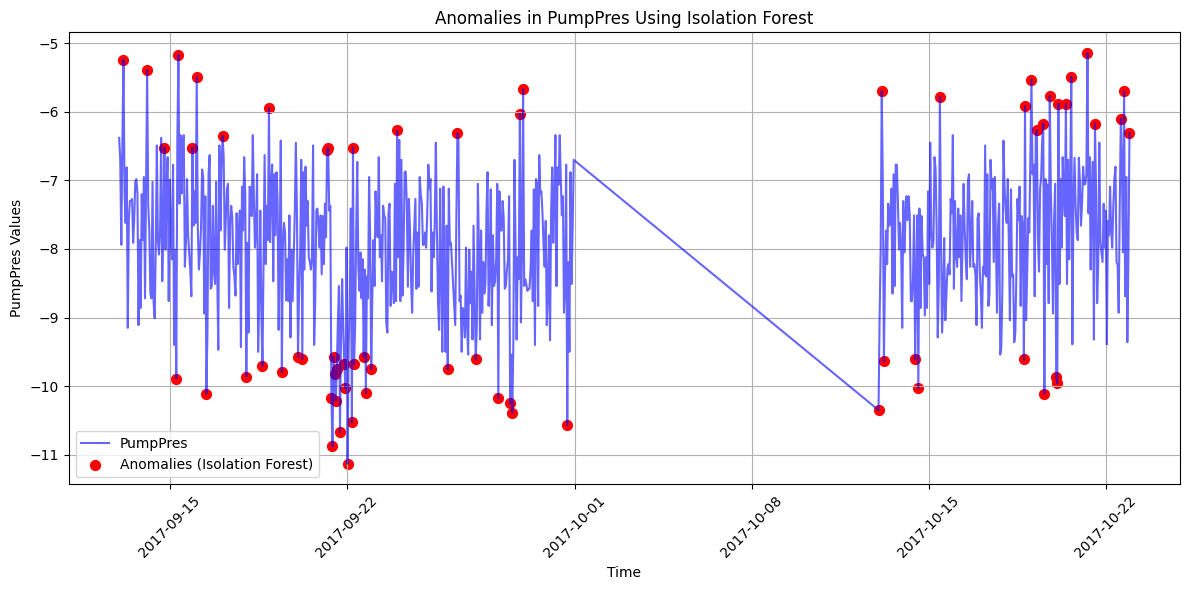

Isolation Forest: 66 anomalies detected


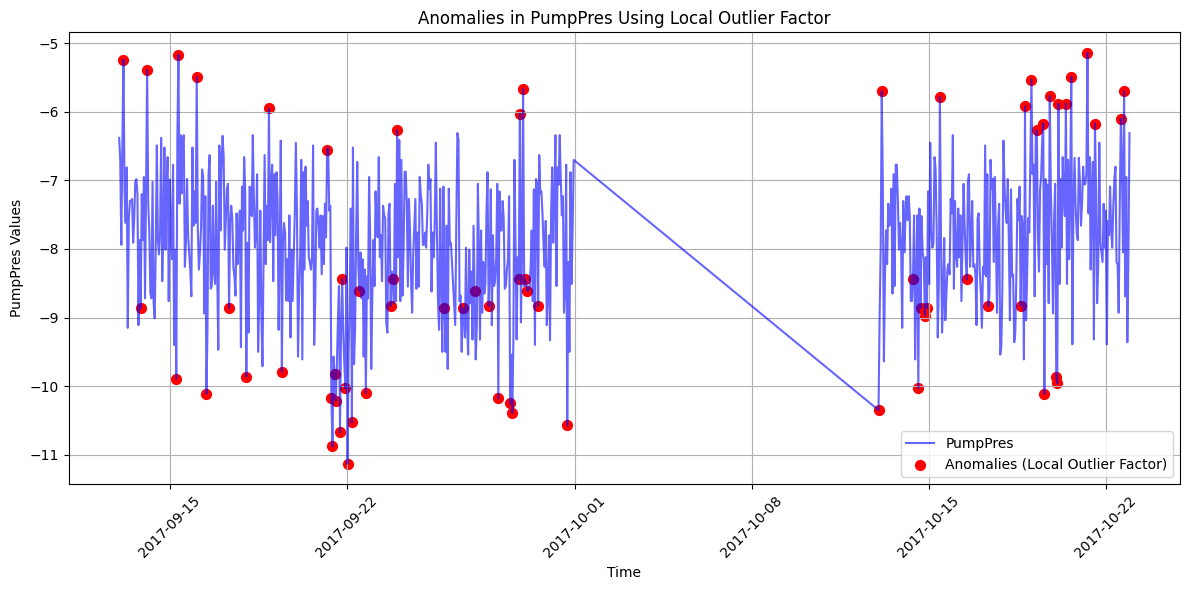

Local Outlier Factor: 66 anomalies detected


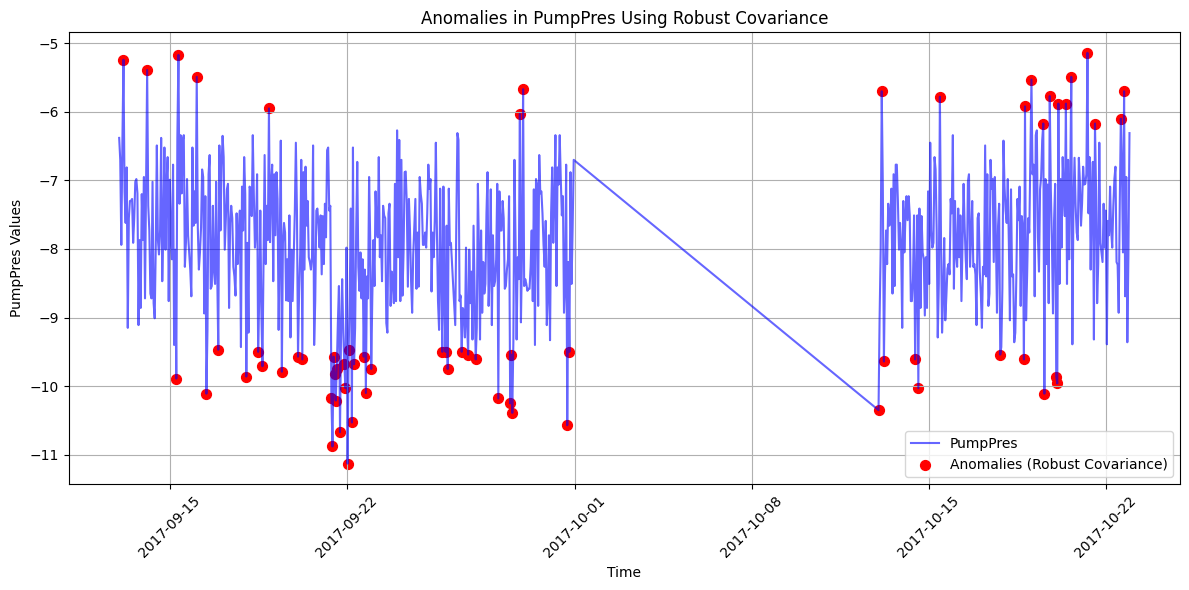

Robust Covariance: 66 anomalies detected


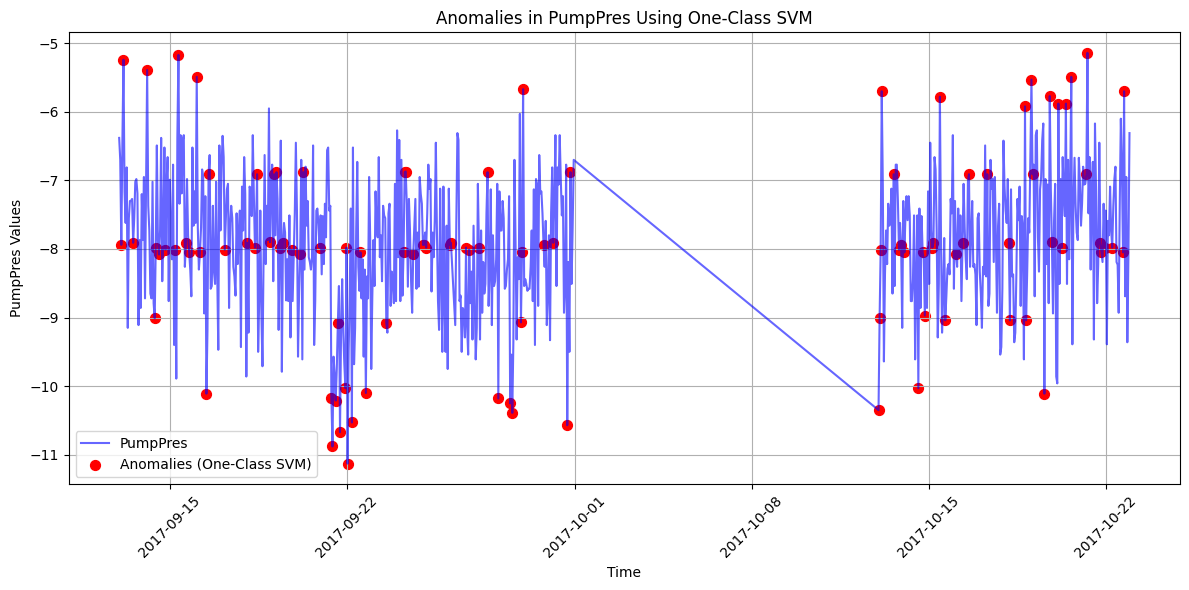

One-Class SVM: 104 anomalies detected


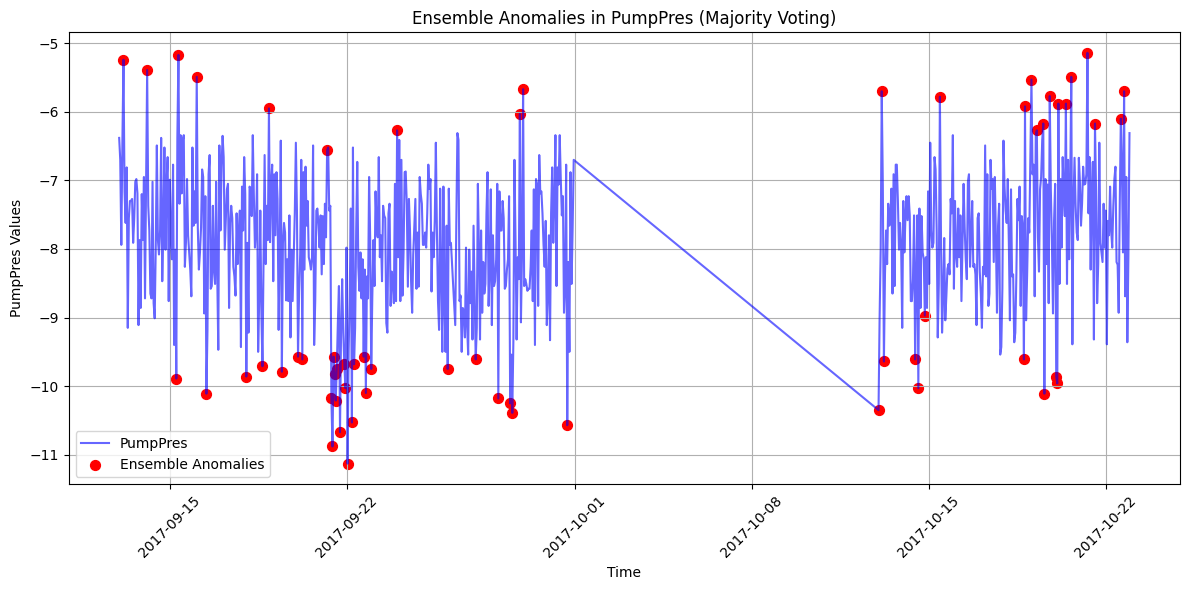

Ensemble detected 60 anomalies

Processing GaugePres...


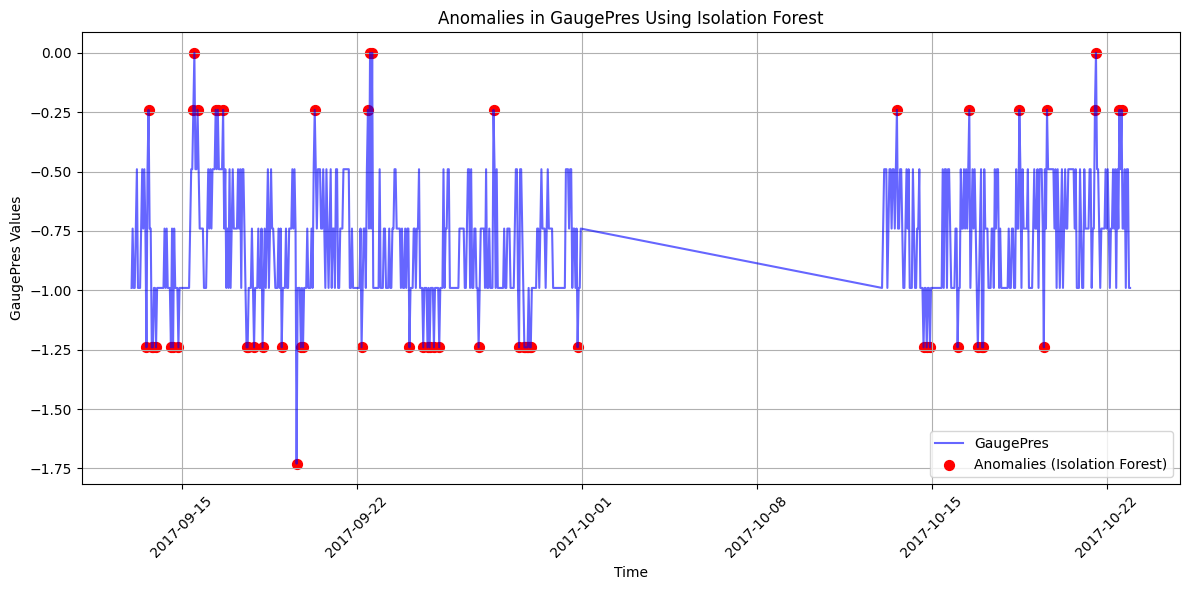

Isolation Forest: 59 anomalies detected


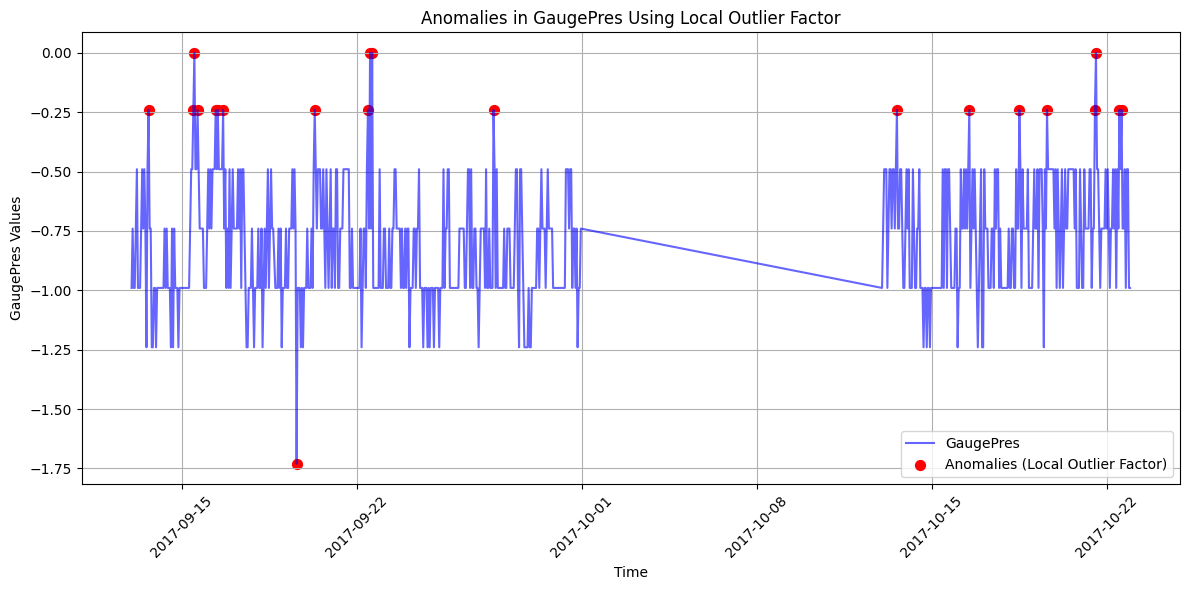

Local Outlier Factor: 21 anomalies detected


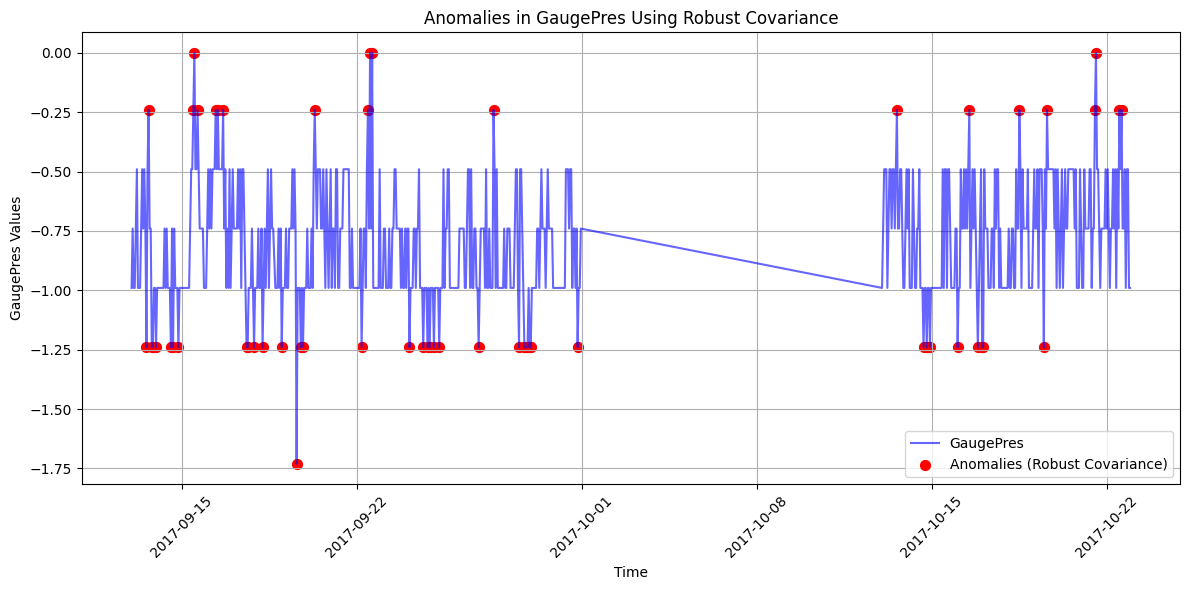

Robust Covariance: 59 anomalies detected


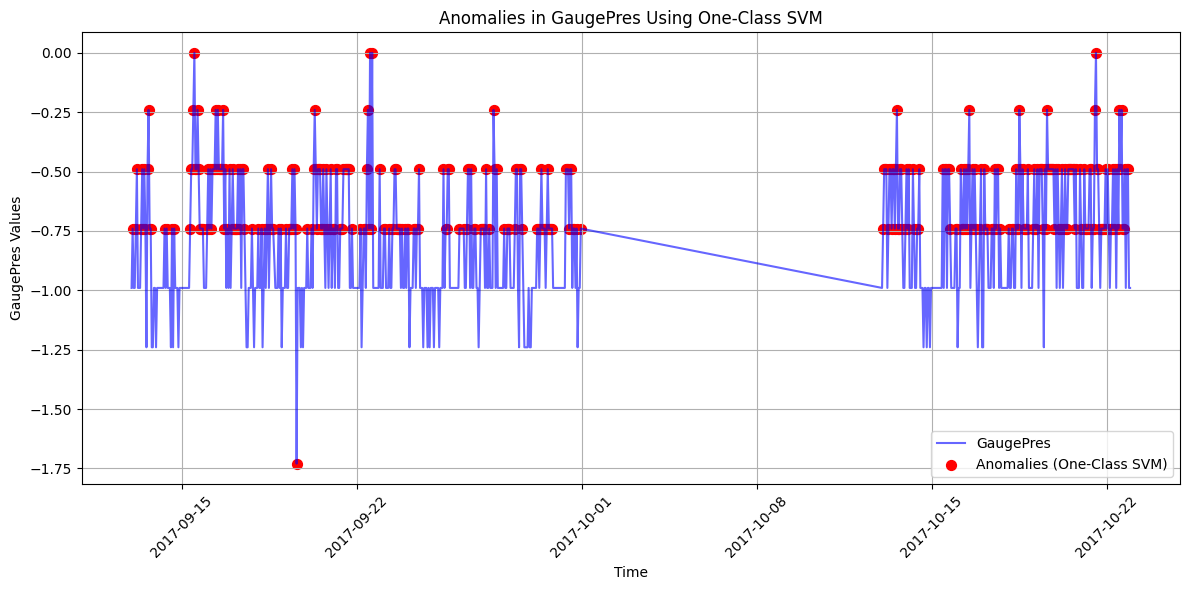

One-Class SVM: 349 anomalies detected


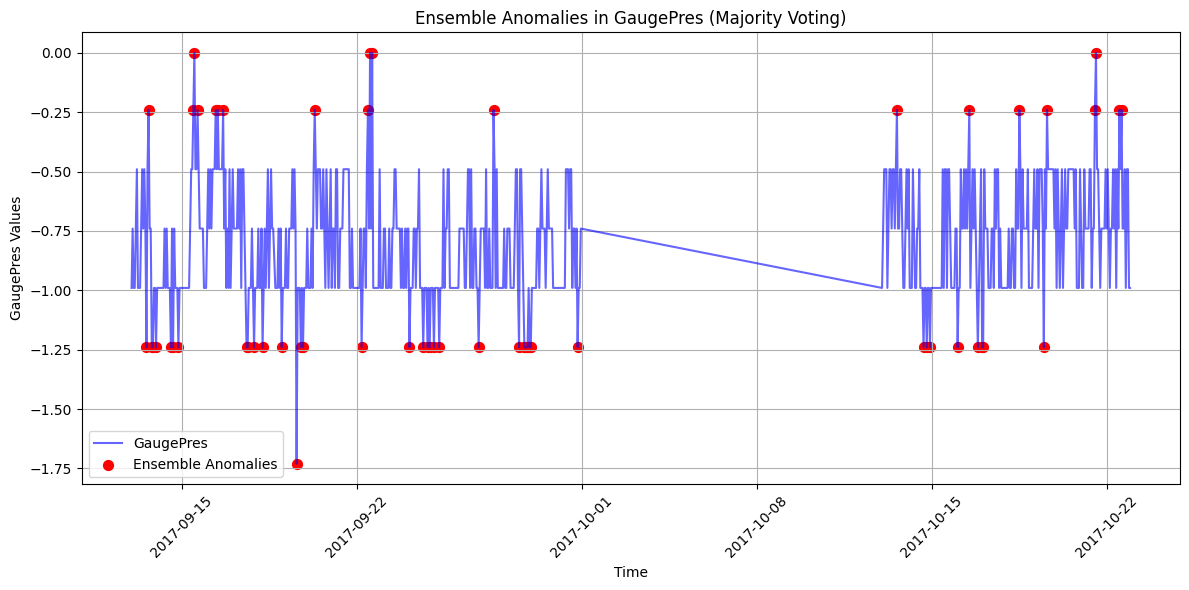

Ensemble detected 59 anomalies

Processing BaroPres...


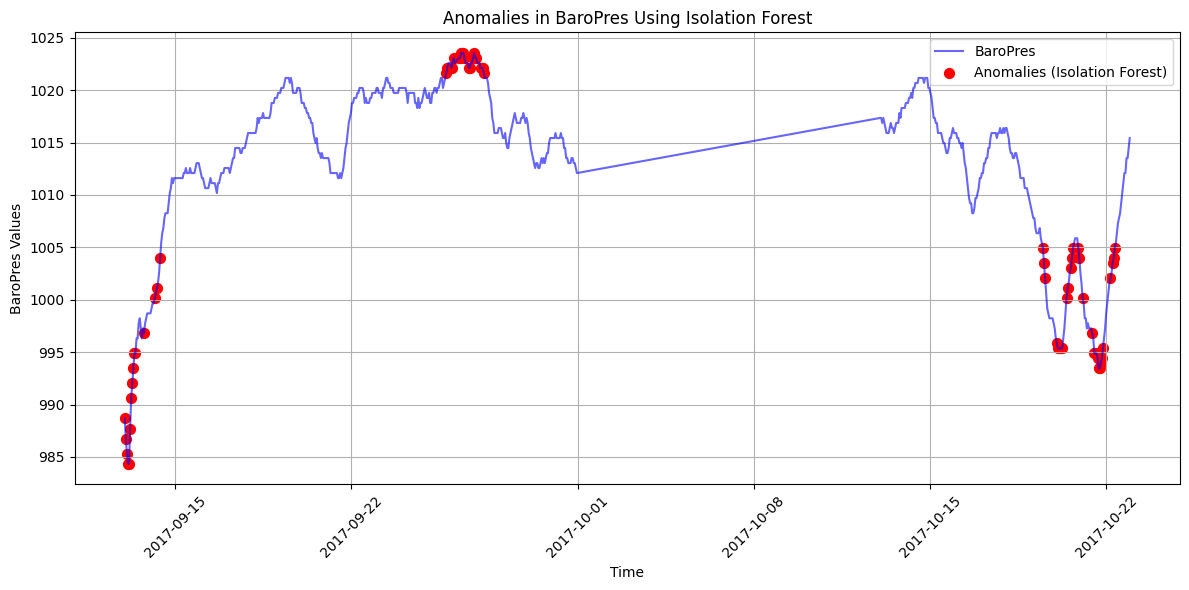

Isolation Forest: 66 anomalies detected


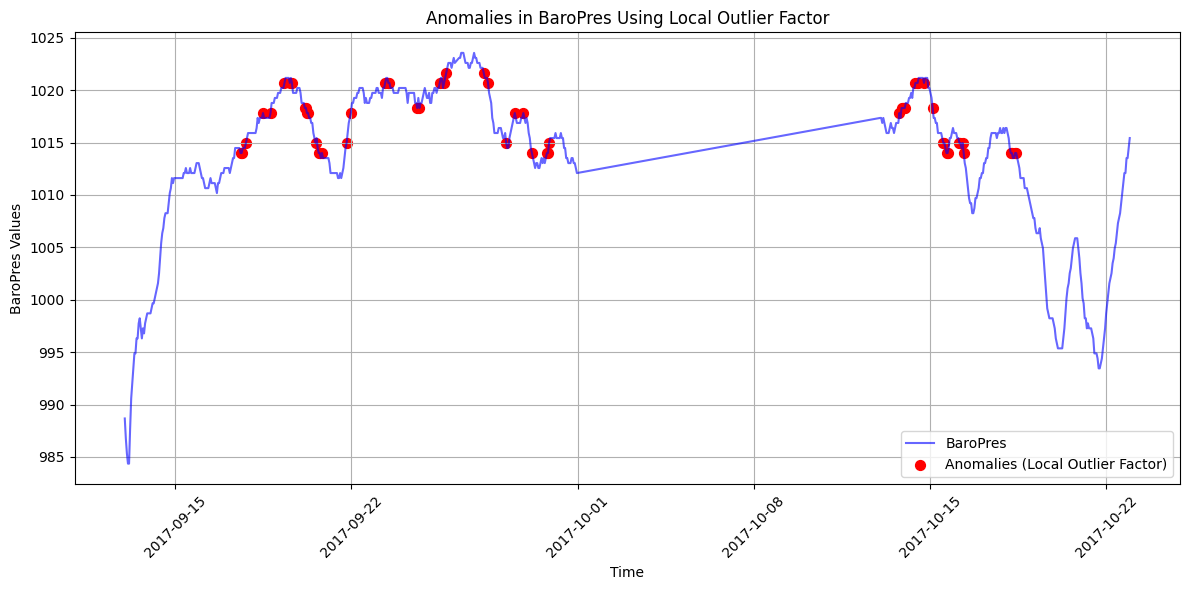

Local Outlier Factor: 57 anomalies detected


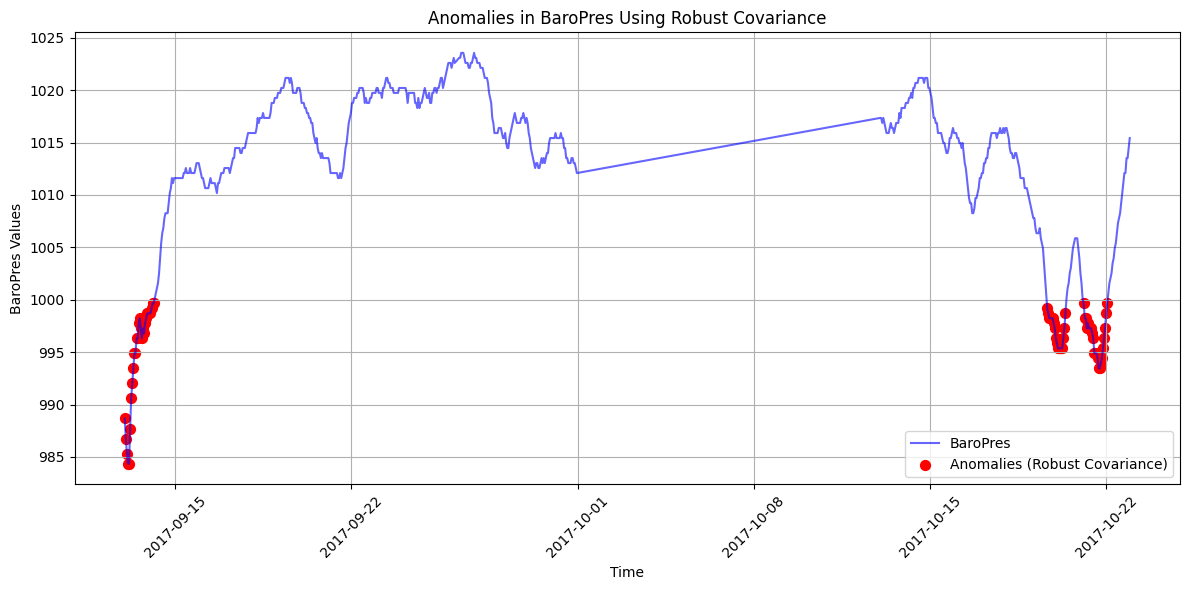

Robust Covariance: 69 anomalies detected


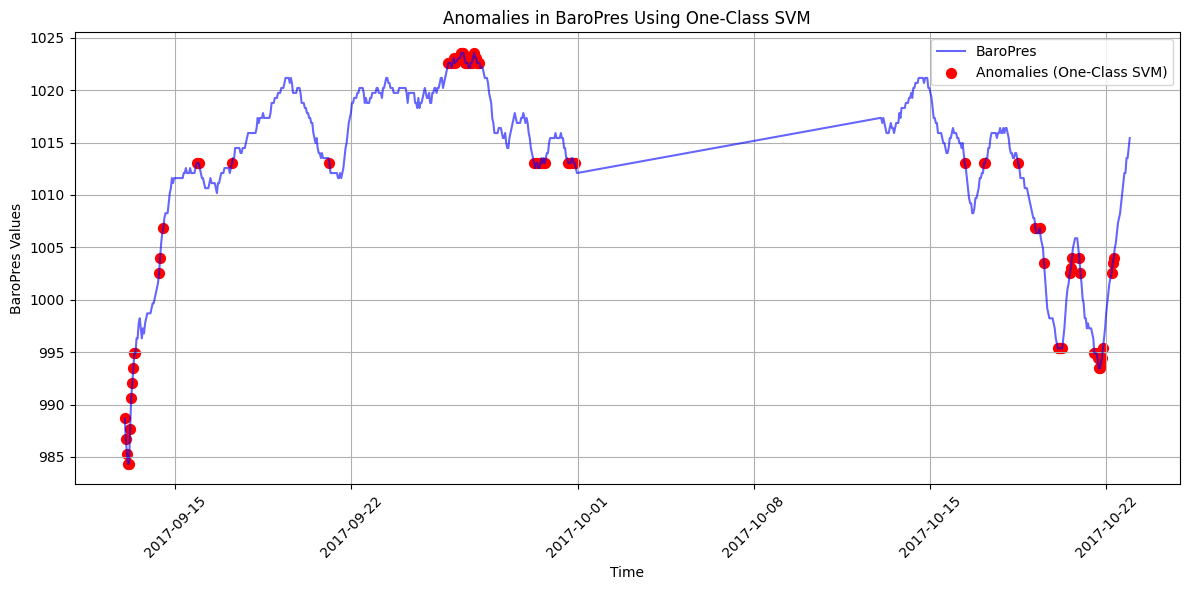

One-Class SVM: 83 anomalies detected


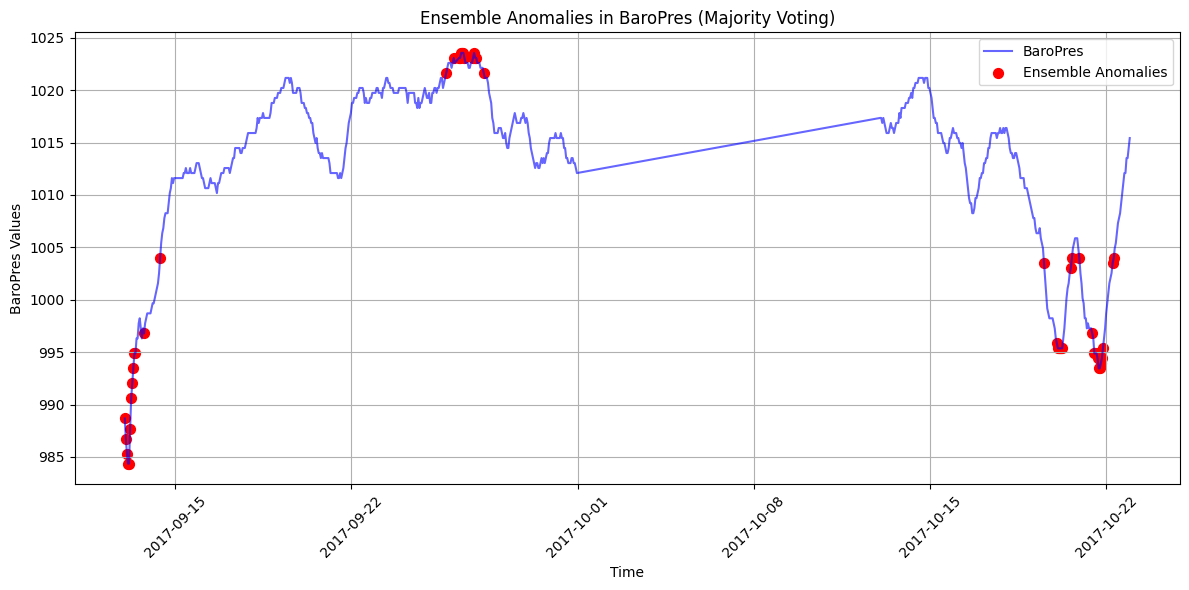

Ensemble detected 48 anomalies


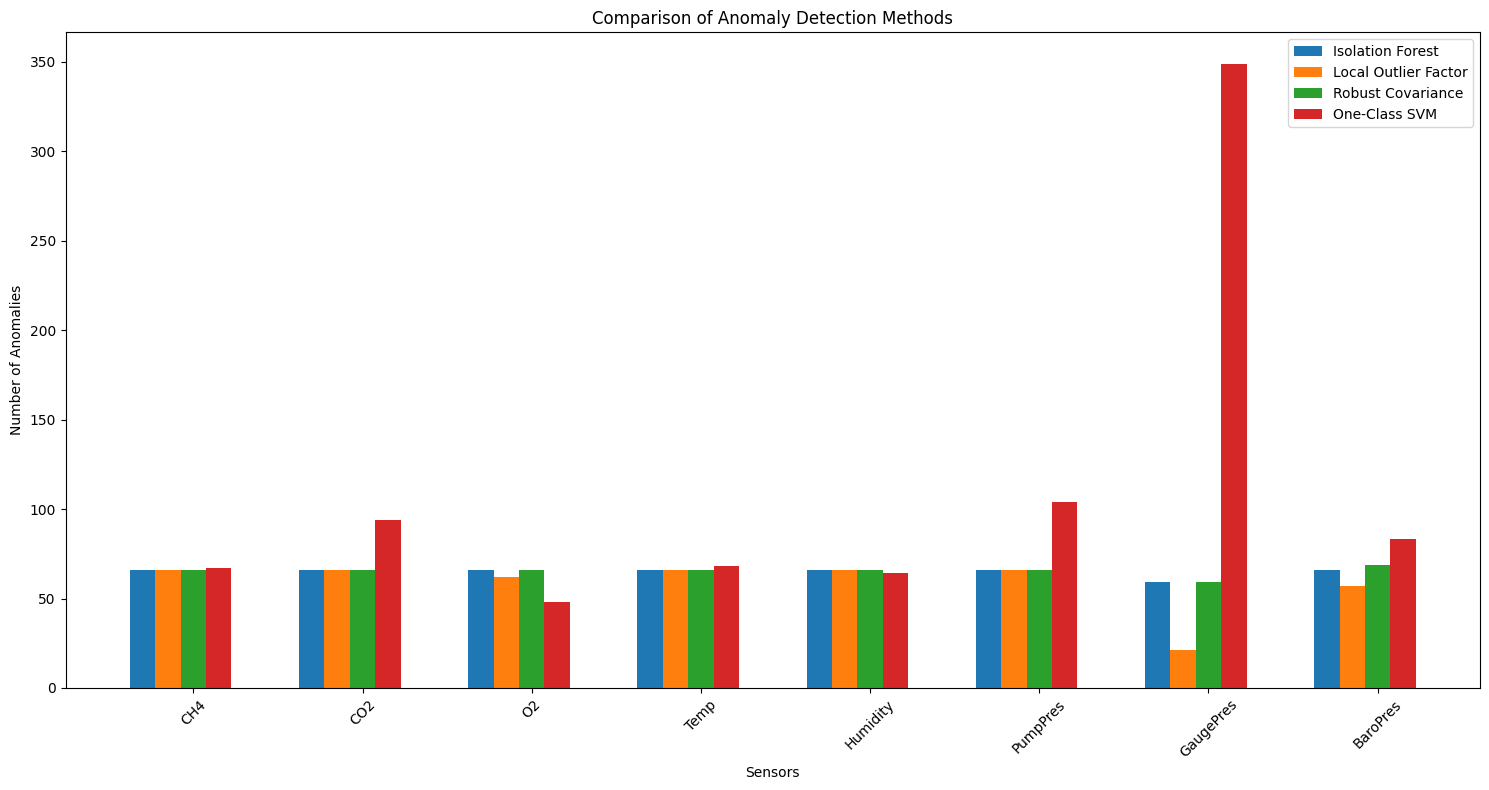


Overall Summary:

CH4:
Individual model detections:
  Isolation Forest: 66 anomalies
  Local Outlier Factor: 66 anomalies
  Robust Covariance: 66 anomalies
  One-Class SVM: 67 anomalies
Ensemble consensus: 54 anomalies

CO2:
Individual model detections:
  Isolation Forest: 66 anomalies
  Local Outlier Factor: 66 anomalies
  Robust Covariance: 66 anomalies
  One-Class SVM: 94 anomalies
Ensemble consensus: 61 anomalies

O2:
Individual model detections:
  Isolation Forest: 66 anomalies
  Local Outlier Factor: 62 anomalies
  Robust Covariance: 66 anomalies
  One-Class SVM: 48 anomalies
Ensemble consensus: 62 anomalies

Temp:
Individual model detections:
  Isolation Forest: 66 anomalies
  Local Outlier Factor: 66 anomalies
  Robust Covariance: 66 anomalies
  One-Class SVM: 68 anomalies
Ensemble consensus: 56 anomalies

Humidity:
Individual model detections:
  Isolation Forest: 66 anomalies
  Local Outlier Factor: 66 anomalies
  Robust Covariance: 66 anomalies
  One-Class SVM: 64 anomalies


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.covariance import EllipticEnvelope
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler

def ensemble_anomaly_detection(data, sensor_columns, contamination=0.1):
    # Initialize models
    models = {
        'Isolation Forest': IsolationForest(contamination=contamination, random_state=42),
        'Local Outlier Factor': LocalOutlierFactor(contamination=contamination, n_neighbors=20),
        'Robust Covariance': EllipticEnvelope(contamination=contamination, random_state=42),
        'One-Class SVM': OneClassSVM(nu=contamination, kernel='rbf')
    }

    scaler = StandardScaler()
    results = {}
    all_anomalies = []

    for sensor in sensor_columns:
        print(f"\nProcessing {sensor}...")


        X = data[sensor].values.reshape(-1, 1)
        X_scaled = scaler.fit_transform(X)


        predictions = {}
        anomaly_counts = {}

        # Run each model
        for model_name, model in models.items():
            try:

                if isinstance(model, LocalOutlierFactor):
                    pred = model.fit_predict(X_scaled)
                else:
                    pred = model.fit(X_scaled).predict(X_scaled)


                predictions[model_name] = pred
                anomaly_counts[model_name] = np.sum(pred == -1)


                anomalies = np.where(pred == -1, data[sensor], np.nan)


                anomaly_indices = np.where(pred == -1)[0]
                for idx in anomaly_indices:
                    all_anomalies.append({
                        'Time': data.index[idx],
                        'Sensor': sensor,
                        'Anomaly Value': data[sensor].iloc[idx],
                        'Model': model_name
                    })

                # Plot individual model results
                plt.figure(figsize=(12, 6))
                plt.plot(data.index, data[sensor], label=sensor, color='blue', alpha=0.6)
                plt.scatter(data.index, anomalies, color='red', label=f'Anomalies ({model_name})', s=50, marker='o')
                plt.title(f'Anomalies in {sensor} Using {model_name}')
                plt.xlabel('Time')
                plt.ylabel(f'{sensor} Values')
                plt.legend()
                plt.grid(True)
                plt.xticks(rotation=45)
                plt.tight_layout()
                plt.show()

                print(f"{model_name}: {anomaly_counts[model_name]} anomalies detected")

            except Exception as e:
                print(f"Error with {model_name} for {sensor}: {str(e)}")
                continue


        ensemble_predictions = np.zeros(len(X))
        for pred in predictions.values():
            ensemble_predictions += (pred == -1)

        #THERESHOLD
        threshold = len(models) / 2
        ensemble_anomalies = np.where(ensemble_predictions >= threshold, data[sensor], np.nan)

        # CSV
        ensemble_anomaly_indices = np.where(ensemble_predictions >= threshold)[0]
        for idx in ensemble_anomaly_indices:
            all_anomalies.append({
                'Time': data.index[idx],
                'Sensor': sensor,
                'Anomaly Value': data[sensor].iloc[idx],
                'Model': 'Ensemble'
            })


        plt.figure(figsize=(12, 6))
        plt.plot(data.index, data[sensor], label=sensor, color='blue', alpha=0.6)
        plt.scatter(data.index, ensemble_anomalies, color='red', label='Ensemble Anomalies', s=50, marker='o')
        plt.title(f'Ensemble Anomalies in {sensor} (Majority Voting)')
        plt.xlabel('Time')
        plt.ylabel(f'{sensor} Values')
        plt.legend()
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


        results[sensor] = {
            'individual_predictions': predictions,
            'ensemble_anomalies': ensemble_anomalies,
            'anomaly_counts': anomaly_counts,
            'ensemble_anomaly_count': np.sum(ensemble_predictions >= threshold)
        }

        print(f"Ensemble detected {results[sensor]['ensemble_anomaly_count']} anomalies")


    plt.figure(figsize=(15, 8))
    sensor_names = list(results.keys())
    model_names = list(models.keys())
    x = np.arange(len(sensor_names))
    width = 0.15

    for i, model_name in enumerate(model_names):
        counts = [results[sensor]['anomaly_counts'].get(model_name, 0) for sensor in sensor_names]
        plt.bar(x + i * width, counts, width, label=model_name)

    plt.xlabel('Sensors')
    plt.ylabel('Number of Anomalies')
    plt.title('Comparison of Anomaly Detection Methods')
    plt.xticks(x + width * 2, sensor_names, rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()


    anomalies_df = pd.DataFrame(all_anomalies)
    anomalies_df.to_csv('anomalies_detected.csv', index=False)

    return results


sensor_columns = ['CH4', 'CO2', 'O2', 'Temp', 'Humidity', 'PumpPres', 'GaugePres', 'BaroPres']
ensemble_results = ensemble_anomaly_detection(data, sensor_columns, contamination=0.1)

# Print overall summary
print("\nOverall Summary:")
for sensor in sensor_columns:
    print(f"\n{sensor}:")
    print("Individual model detections:")
    for model, count in ensemble_results[sensor]['anomaly_counts'].items():
        print(f"  {model}: {count} anomalies")
    print(f"Ensemble consensus: {ensemble_results[sensor]['ensemble_anomaly_count']} anomalies")


In [ ]:
def putFile2():
    bucket_name = 'rsh1232'
    s3_object_key = 'anomalies.csv'
    local_file_path = 'anomalies_detected.csv'
    s3.Bucket(bucket_name).upload_file(local_file_path, s3_object_key)

putFile2()

In [ ]:
import pandas as pd
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
import os


anomalies_df = pd.read_csv('anomalies_detected.csv')

# Trim whitespace from column names
anomalies_df.columns = anomalies_df.columns.str.strip()


print("Column Names:", anomalies_df.columns)
print(anomalies_df.head())


anomalies_df['Time'] = pd.to_datetime(anomalies_df['Time'])


latest_anomalies = anomalies_df.loc[anomalies_df.groupby('Sensor')['Time'].idxmax()]


recipient_email = 'a'
subject = 'Latest Anomalies Detected'
doubt = 'Please find the latest detected anomalies for each sensor.'

sender_email = "a"
sender_password = "a"

try:
    # Create the email
    smtp_server = smtplib.SMTP_SSL('smtp.gmail.com', 465)
    smtp_server.login(sender_email, sender_password)

    email_message = MIMEMultipart()
    email_message['From'] = sender_email
    email_message['To'] = recipient_email
    email_message['Subject'] = subject

    # email body with the latest anomalies for each sensor
    message = f"System Feedback: {doubt}\n\nLatest Anomalies Detected:\n\n"

    if not latest_anomalies.empty:
        message += latest_anomalies.to_string(index=False)  # Include the latest anomalies
    else:
        message += "No anomalies detected."

    email_message.attach(MIMEText(message, 'plain'))

    # Send the email
    smtp_server.send_message(email_message)
    print('Email sent successfully!')

except Exception as e:
    print(f"An error occurred: {str(e)}")

finally:
    smtp_server.quit()


Column Names: Index(['Time', 'Sensor', 'Anomaly Value', 'Model'], dtype='object')
                  Time Sensor  Anomaly Value             Model
0  2017-09-21 09:21:00    CH4           3.40  Isolation Forest
1  2017-09-21 10:23:00    CH4           7.81  Isolation Forest
2  2017-09-21 11:24:00    CH4           2.93  Isolation Forest
3  2017-09-21 12:25:00    CH4           3.98  Isolation Forest
4  2017-09-21 13:27:00    CH4           5.34  Isolation Forest
Email sent successfully!
